<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Overlap-Strelka2-and-Mutect2-calls-and-filter-variant-(VAF->-0.03)-for-CBTTC" data-toc-modified-id="Overlap-Strelka2-and-Mutect2-calls-and-filter-variant-(VAF->-0.03)-for-CBTTC-1">Overlap Strelka2 and Mutect2 calls and filter variant (VAF &gt; 0.03) for CBTTC</a></span></li><li><span><a href="#Dependencies" data-toc-modified-id="Dependencies-2">Dependencies</a></span></li><li><span><a href="#Paths" data-toc-modified-id="Paths-3">Paths</a></span></li><li><span><a href="#Main" data-toc-modified-id="Main-4">Main</a></span><ul class="toc-item"><li><span><a href="#Overlap-variants-with-chr:start_pos" data-toc-modified-id="Overlap-variants-with-chr:start_pos-4.1">Overlap variants with chr:start_pos</a></span></li><li><span><a href="#Add-sample_id-from-clinical_df" data-toc-modified-id="Add-sample_id-from-clinical_df-4.2">Add sample_id from clinical_df</a></span></li></ul></li></ul></div>

# Overlap Strelka2 and Mutect2 calls and filter variant (VAF > 0.03) for CBTTC

# Dependencies

In [27]:
library(maftools)
library(ggplot2)

Warning message:
“package ‘ggplot2’ was built under R version 3.5.2”

# Paths

In [2]:
manifestpath <- "/Users/anabbi/OneDrive - UHN/Documents/IPD2/Manifests/"
datapath <- "/Users/anabbi/OneDrive - UHN/Documents/IPD2/Data/"
plotpath <- "/Users/anabbi/OneDrive - UHN/Documents/IPD2/Plots/"

# Main

In [3]:
strelka2_CBTTC <- read.maf(maf = paste0(datapath, "MAF_mat/CBTTC_recoded_mafs_KB_strelka2.maf"),
                      useAll = TRUE, 
                      verbose = T,
                      vc_nonSyn = c("Frame_Shift_Del", "Frame_Shift_Ins", 
                                    "Nonsense_Mutation","Nonstop_Mutation", 
                                    "In_Frame_Del","In_Frame_Ins", 
                                    "Missense_Mutation"))

-Reading
-Validating
--Removed 120 duplicated variants
-Summarizing
--Possible FLAGS among top ten genes:
  MUC17
  AHNAK
  AHNAK2
  MUC16
-Processing clinical data
--Missing clinical data
-Finished in 23.0s elapsed (23.9s cpu) 


In [4]:
mutect2_CBTTC <- read.maf(maf =  paste0(datapath, "MAF_mat/CBTTC_Mutect2_combined_kb.maf"),
                      useAll = TRUE, 
                      verbose = T,
                      vc_nonSyn = c("Frame_Shift_Del", "Frame_Shift_Ins", 
                                    "Nonsense_Mutation","Nonstop_Mutation", 
                                    "In_Frame_Del","In_Frame_Ins", 
                                    "Missense_Mutation"))

-Reading
-Validating
-Silent variants: 29837 
-Summarizing
--Possible FLAGS among top ten genes:
  AHNAK2
  MUC17
  AHNAK
-Processing clinical data
--Missing clinical data
-Finished in 9.216s elapsed (9.317s cpu) 


In [5]:
strelka2 <- strelka2_CBTTC@data
mutect2 <- mutect2_CBTTC@data

In [6]:
head(strelka2)

Hugo_Symbol,Entrez_Gene_Id,Center,NCBI_Build,Chromosome,Start_Position,End_Position,Strand,Variant_Classification,Variant_Type,⋯,oncogenic,LEVEL_1,LEVEL_2A,LEVEL_2B,LEVEL_3A,LEVEL_3B,LEVEL_4,LEVEL_R1,Highest_level,citations
<chr>,<int>,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<fct>,<fct>,⋯,<chr>,<lgl>,<lgl>,<chr>,<lgl>,<chr>,<chr>,<lgl>,<chr>,<chr>
ATPAF1,64756,.,GRCh38,chr1,46668153,46668153,+,Missense_Mutation,SNP,⋯,,NA,NA,,NA,,,NA,,
TCHH,7062,.,GRCh38,chr1,152108268,152108268,+,Missense_Mutation,SNP,⋯,,NA,NA,,NA,,,NA,,
FLG2,388698,.,GRCh38,chr1,152353047,152353047,+,Missense_Mutation,SNP,⋯,,NA,NA,,NA,,,NA,,
OR2T34,127068,.,GRCh38,chr1,248574433,248574433,+,Missense_Mutation,SNP,⋯,,NA,NA,,NA,,,NA,,
NRXN1,9378,.,GRCh38,chr2,51027791,51027791,+,Missense_Mutation,SNP,⋯,,NA,NA,,NA,,,NA,,
SPEG,10290,.,GRCh38,chr2,219483374,219483374,+,Missense_Mutation,SNP,⋯,,NA,NA,,NA,,,NA,,


Find samples with both strelka2 and mutect2 calls

In [7]:
strelkaIDs <- as.character(strelka2$Tumor_Sample_Barcode[!duplicated(strelka2$Tumor_Sample_Barcode)])

mutectIDs <- as.character(mutect2$Tumor_Sample_Barcode[!duplicated(mutect2$Tumor_Sample_Barcode)])

In [8]:
length(strelkaIDs)
length(mutectIDs)

[1] 944

[1] 907

In [9]:
length(strelkaIDs[strelkaIDs %in% mutectIDs])


[1] 906

## Overlap variants with chr:start_pos

In [10]:
strelka2$chrpos <- paste(strelka2$Chromosome, strelka2$Start_Position,sep = ":")

In [11]:
mutect2$chrpos <- paste(mutect2$Chromosome, mutect2$Start_Position,sep = ":")

In [12]:
#samples in strelka2
strelkaIDs <- as.character(strelka2$Tumor_Sample_Barcode[!duplicated(strelka2$Tumor_Sample_Barcode)])
#samples in mutect2
mutectIDs <- as.character(mutect2$Tumor_Sample_Barcode[!duplicated(mutect2$Tumor_Sample_Barcode)])
#overlapping samples
overlapID <- strelkaIDs[strelkaIDs %in% mutectIDs]

In [13]:
strelka2_sample <- strelka2[strelka2$Tumor_Sample_Barcode == overlapID[1],]
mutect2_sample <- mutect2[mutect2$Tumor_Sample_Barcode == overlapID[1],]
overlap_sample <- merge(strelka2_sample[, c("chrpos", "Hugo_Symbol")], mutect2_sample, 
                        by = "chrpos")

In [15]:
overlap_sample

chrpos,Hugo_Symbol.x,Hugo_Symbol.y,Entrez_Gene_Id,Center,NCBI_Build,Chromosome,Start_Position,End_Position,Strand,⋯,oncogenic,LEVEL_1,LEVEL_2A,LEVEL_2B,LEVEL_3A,LEVEL_3B,LEVEL_4,LEVEL_R1,Highest_level,citations
<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<int>,<int>,<chr>,⋯,<chr>,<lgl>,<lgl>,<chr>,<lgl>,<chr>,<chr>,<lgl>,<chr>,<chr>
chr13:106567726,ARGLU1,ARGLU1,55082,Mutect2,GRCh38,chr13,106567726,106567726,+,⋯,,NA,NA,,NA,,,NA,,
chr2:219483374,SPEG,SPEG,10290,Mutect2,GRCh38,chr2,219483374,219483374,+,⋯,,NA,NA,,NA,,,NA,,
chr3:51391480,RBM15B,RBM15B,29890,Mutect2,GRCh38,chr3,51391480,51391480,+,⋯,,NA,NA,,NA,,,NA,,


In [16]:
for(id in overlapID[2:length(overlapID)]){
    strelka2_sample <- strelka2[strelka2$Tumor_Sample_Barcode == id,]
    mutect2_sample <- mutect2[mutect2$Tumor_Sample_Barcode == id,]
    message("number of strelka2 calls for: ", id)
    print(nrow(strelka2_sample))
    message("number of mutect2 calls for: ", id)
    print(nrow(mutect2_sample))
    overlap_sample1 <- merge(strelka2_sample[, c("chrpos", "Hugo_Symbol")], 
                            mutect2_sample, 
                            by = "chrpos")
    overlap_sample <- rbind(overlap_sample,
                           overlap_sample1)
    message("number of overlapping calls for: ", id)
    print(nrow(overlap_sample1))
    
}

number of strelka2 calls for: BS_SKRY0BJ4


[1] 43


number of mutect2 calls for: BS_SKRY0BJ4


[1] 35


number of overlapping calls for: BS_SKRY0BJ4


[1] 1


number of strelka2 calls for: BS_SYWRCE3Z


[1] 30


number of mutect2 calls for: BS_SYWRCE3Z


[1] 10


number of overlapping calls for: BS_SYWRCE3Z


[1] 2


number of strelka2 calls for: BS_45913DTA


[1] 12


number of mutect2 calls for: BS_45913DTA


[1] 4


number of overlapping calls for: BS_45913DTA


[1] 3


number of strelka2 calls for: BS_AHT9PKVE


[1] 11


number of mutect2 calls for: BS_AHT9PKVE


[1] 11


number of overlapping calls for: BS_AHT9PKVE


[1] 2


number of strelka2 calls for: BS_2W200YK5


[1] 12


number of mutect2 calls for: BS_2W200YK5


[1] 7


number of overlapping calls for: BS_2W200YK5


[1] 6


number of strelka2 calls for: BS_F4D169Q7


[1] 50


number of mutect2 calls for: BS_F4D169Q7


[1] 20


number of overlapping calls for: BS_F4D169Q7


[1] 3


number of strelka2 calls for: BS_QD22MJJ5


[1] 28


number of mutect2 calls for: BS_QD22MJJ5


[1] 11


number of overlapping calls for: BS_QD22MJJ5


[1] 1


number of strelka2 calls for: BS_BX8AR74E


[1] 31


number of mutect2 calls for: BS_BX8AR74E


[1] 15


number of overlapping calls for: BS_BX8AR74E


[1] 14


number of strelka2 calls for: BS_9BGCH82S


[1] 8


number of mutect2 calls for: BS_9BGCH82S


[1] 18


number of overlapping calls for: BS_9BGCH82S


[1] 2


number of strelka2 calls for: BS_2VSN5YC5


[1] 42


number of mutect2 calls for: BS_2VSN5YC5


[1] 17


number of overlapping calls for: BS_2VSN5YC5


[1] 3


number of strelka2 calls for: BS_D3KVGMRJ


[1] 81


number of mutect2 calls for: BS_D3KVGMRJ


[1] 35


number of overlapping calls for: BS_D3KVGMRJ


[1] 9


number of strelka2 calls for: BS_E9ATGWME


[1] 9


number of mutect2 calls for: BS_E9ATGWME


[1] 7


number of overlapping calls for: BS_E9ATGWME


[1] 2


number of strelka2 calls for: BS_BZ4GKDP4


[1] 3


number of mutect2 calls for: BS_BZ4GKDP4


[1] 1


number of overlapping calls for: BS_BZ4GKDP4


[1] 1


number of strelka2 calls for: BS_8D52JK1Q


[1] 17


number of mutect2 calls for: BS_8D52JK1Q


[1] 14


number of overlapping calls for: BS_8D52JK1Q


[1] 12


number of strelka2 calls for: BS_8W0FNBWF


[1] 5


number of mutect2 calls for: BS_8W0FNBWF


[1] 1


number of overlapping calls for: BS_8W0FNBWF


[1] 1


number of strelka2 calls for: BS_FYJMNRGK


[1] 13


number of mutect2 calls for: BS_FYJMNRGK


[1] 10


number of overlapping calls for: BS_FYJMNRGK


[1] 6


number of strelka2 calls for: BS_G2016BE5


[1] 29


number of mutect2 calls for: BS_G2016BE5


[1] 14


number of overlapping calls for: BS_G2016BE5


[1] 1


number of strelka2 calls for: BS_CFEWVDG1


[1] 8


number of mutect2 calls for: BS_CFEWVDG1


[1] 7


number of overlapping calls for: BS_CFEWVDG1


[1] 0


number of strelka2 calls for: BS_5ZRZC3ZM


[1] 39


number of mutect2 calls for: BS_5ZRZC3ZM


[1] 24


number of overlapping calls for: BS_5ZRZC3ZM


[1] 5


number of strelka2 calls for: BS_HM5N78GV


[1] 13


number of mutect2 calls for: BS_HM5N78GV


[1] 5


number of overlapping calls for: BS_HM5N78GV


[1] 0


number of strelka2 calls for: BS_PNXDHDF3


[1] 44


number of mutect2 calls for: BS_PNXDHDF3


[1] 25


number of overlapping calls for: BS_PNXDHDF3


[1] 20


number of strelka2 calls for: BS_MWZCP1XW


[1] 26


number of mutect2 calls for: BS_MWZCP1XW


[1] 16


number of overlapping calls for: BS_MWZCP1XW


[1] 11


number of strelka2 calls for: BS_XSWF2MR1


[1] 5


number of mutect2 calls for: BS_XSWF2MR1


[1] 4


number of overlapping calls for: BS_XSWF2MR1


[1] 2


number of strelka2 calls for: BS_02W5H7K5


[1] 20


number of mutect2 calls for: BS_02W5H7K5


[1] 13


number of overlapping calls for: BS_02W5H7K5


[1] 1


number of strelka2 calls for: BS_GKPVZXYP


[1] 30


number of mutect2 calls for: BS_GKPVZXYP


[1] 26


number of overlapping calls for: BS_GKPVZXYP


[1] 11


number of strelka2 calls for: BS_T9T3R2J0


[1] 8


number of mutect2 calls for: BS_T9T3R2J0


[1] 9


number of overlapping calls for: BS_T9T3R2J0


[1] 6


number of strelka2 calls for: BS_HZV4WDTB


[1] 28


number of mutect2 calls for: BS_HZV4WDTB


[1] 7


number of overlapping calls for: BS_HZV4WDTB


[1] 3


number of strelka2 calls for: BS_E9M7TDB6


[1] 9


number of mutect2 calls for: BS_E9M7TDB6


[1] 7


number of overlapping calls for: BS_E9M7TDB6


[1] 2


number of strelka2 calls for: BS_T5T21G7N


[1] 22


number of mutect2 calls for: BS_T5T21G7N


[1] 22


number of overlapping calls for: BS_T5T21G7N


[1] 14


number of strelka2 calls for: BS_BBTT7DH4


[1] 32


number of mutect2 calls for: BS_BBTT7DH4


[1] 37


number of overlapping calls for: BS_BBTT7DH4


[1] 10


number of strelka2 calls for: BS_TF5TTEXH


[1] 32


number of mutect2 calls for: BS_TF5TTEXH


[1] 30


number of overlapping calls for: BS_TF5TTEXH


[1] 27


number of strelka2 calls for: BS_2AWCKNB3


[1] 14


number of mutect2 calls for: BS_2AWCKNB3


[1] 8


number of overlapping calls for: BS_2AWCKNB3


[1] 4


number of strelka2 calls for: BS_VDSR4X6N


[1] 7


number of mutect2 calls for: BS_VDSR4X6N


[1] 5


number of overlapping calls for: BS_VDSR4X6N


[1] 3


number of strelka2 calls for: BS_FVYBGMG1


[1] 36


number of mutect2 calls for: BS_FVYBGMG1


[1] 41


number of overlapping calls for: BS_FVYBGMG1


[1] 25


number of strelka2 calls for: BS_0FQKT8EY


[1] 56


number of mutect2 calls for: BS_0FQKT8EY


[1] 65


number of overlapping calls for: BS_0FQKT8EY


[1] 49


number of strelka2 calls for: BS_XMP9XNR9


[1] 35


number of mutect2 calls for: BS_XMP9XNR9


[1] 38


number of overlapping calls for: BS_XMP9XNR9


[1] 30


number of strelka2 calls for: BS_BVD7PWP5


[1] 5


number of mutect2 calls for: BS_BVD7PWP5


[1] 1


number of overlapping calls for: BS_BVD7PWP5


[1] 0


number of strelka2 calls for: BS_GCQEB05M


[1] 3


number of mutect2 calls for: BS_GCQEB05M


[1] 2


number of overlapping calls for: BS_GCQEB05M


[1] 0


number of strelka2 calls for: BS_PMFR8NPN


[1] 122


number of mutect2 calls for: BS_PMFR8NPN


[1] 69


number of overlapping calls for: BS_PMFR8NPN


[1] 53


number of strelka2 calls for: BS_JM979K1M


[1] 65


number of mutect2 calls for: BS_JM979K1M


[1] 31


number of overlapping calls for: BS_JM979K1M


[1] 12


number of strelka2 calls for: BS_X2G3JMM1


[1] 1022


number of mutect2 calls for: BS_X2G3JMM1


[1] 47


number of overlapping calls for: BS_X2G3JMM1


[1] 44


number of strelka2 calls for: BS_P0QJ1QAH


[1] 221


number of mutect2 calls for: BS_P0QJ1QAH


[1] 236


number of overlapping calls for: BS_P0QJ1QAH


[1] 208


number of strelka2 calls for: BS_EFBBP9H3


[1] 75


number of mutect2 calls for: BS_EFBBP9H3


[1] 42


number of overlapping calls for: BS_EFBBP9H3


[1] 32


number of strelka2 calls for: BS_3JE2T7AR


[1] 30


number of mutect2 calls for: BS_3JE2T7AR


[1] 16


number of overlapping calls for: BS_3JE2T7AR


[1] 6


number of strelka2 calls for: BS_XWQTX5HH


[1] 29


number of mutect2 calls for: BS_XWQTX5HH


[1] 23


number of overlapping calls for: BS_XWQTX5HH


[1] 1


number of strelka2 calls for: BS_85Q5P8GF


[1] 163


number of mutect2 calls for: BS_85Q5P8GF


[1] 170


number of overlapping calls for: BS_85Q5P8GF


[1] 151


number of strelka2 calls for: BS_3BMGF6GN


[1] 128


number of mutect2 calls for: BS_3BMGF6GN


[1] 63


number of overlapping calls for: BS_3BMGF6GN


[1] 35


number of strelka2 calls for: BS_C6NB914B


[1] 93


number of mutect2 calls for: BS_C6NB914B


[1] 24


number of overlapping calls for: BS_C6NB914B


[1] 3


number of strelka2 calls for: BS_94AP61Q5


[1] 12


number of mutect2 calls for: BS_94AP61Q5


[1] 14


number of overlapping calls for: BS_94AP61Q5


[1] 3


number of strelka2 calls for: BS_FKQ7F6D1


[1] 41


number of mutect2 calls for: BS_FKQ7F6D1


[1] 30


number of overlapping calls for: BS_FKQ7F6D1


[1] 24


number of strelka2 calls for: BS_XPSD2NRJ


[1] 12


number of mutect2 calls for: BS_XPSD2NRJ


[1] 2


number of overlapping calls for: BS_XPSD2NRJ


[1] 0


number of strelka2 calls for: BS_D59VEERR


[1] 14


number of mutect2 calls for: BS_D59VEERR


[1] 13


number of overlapping calls for: BS_D59VEERR


[1] 5


number of strelka2 calls for: BS_F5KRHGKC


[1] 31


number of mutect2 calls for: BS_F5KRHGKC


[1] 31


number of overlapping calls for: BS_F5KRHGKC


[1] 10


number of strelka2 calls for: BS_QXZTRMWM


[1] 263


number of mutect2 calls for: BS_QXZTRMWM


[1] 89


number of overlapping calls for: BS_QXZTRMWM


[1] 30


number of strelka2 calls for: BS_6Q9PMNWY


[1] 17


number of mutect2 calls for: BS_6Q9PMNWY


[1] 12


number of overlapping calls for: BS_6Q9PMNWY


[1] 3


number of strelka2 calls for: BS_MCM78YPC


[1] 106


number of mutect2 calls for: BS_MCM78YPC


[1] 40


number of overlapping calls for: BS_MCM78YPC


[1] 4


number of strelka2 calls for: BS_83MSWR59


[1] 11


number of mutect2 calls for: BS_83MSWR59


[1] 7


number of overlapping calls for: BS_83MSWR59


[1] 5


number of strelka2 calls for: BS_SNC5WMVN


[1] 13


number of mutect2 calls for: BS_SNC5WMVN


[1] 10


number of overlapping calls for: BS_SNC5WMVN


[1] 6


number of strelka2 calls for: BS_9QMVZ4C0


[1] 33


number of mutect2 calls for: BS_9QMVZ4C0


[1] 12


number of overlapping calls for: BS_9QMVZ4C0


[1] 1


number of strelka2 calls for: BS_05S9WJW6


[1] 129


number of mutect2 calls for: BS_05S9WJW6


[1] 81


number of overlapping calls for: BS_05S9WJW6


[1] 20


number of strelka2 calls for: BS_KM878Y43


[1] 3


number of mutect2 calls for: BS_KM878Y43


[1] 2


number of overlapping calls for: BS_KM878Y43


[1] 1


number of strelka2 calls for: BS_9JVGXA2W


[1] 63


number of mutect2 calls for: BS_9JVGXA2W


[1] 43


number of overlapping calls for: BS_9JVGXA2W


[1] 8


number of strelka2 calls for: BS_0BA5TZND


[1] 10


number of mutect2 calls for: BS_0BA5TZND


[1] 8


number of overlapping calls for: BS_0BA5TZND


[1] 1


number of strelka2 calls for: BS_EPM623G4


[1] 47


number of mutect2 calls for: BS_EPM623G4


[1] 46


number of overlapping calls for: BS_EPM623G4


[1] 38


number of strelka2 calls for: BS_JC2187NA


[1] 8


number of mutect2 calls for: BS_JC2187NA


[1] 6


number of overlapping calls for: BS_JC2187NA


[1] 4


number of strelka2 calls for: BS_P3P96WCD


[1] 19


number of mutect2 calls for: BS_P3P96WCD


[1] 12


number of overlapping calls for: BS_P3P96WCD


[1] 11


number of strelka2 calls for: BS_5R0HHQ1Y


[1] 12


number of mutect2 calls for: BS_5R0HHQ1Y


[1] 17


number of overlapping calls for: BS_5R0HHQ1Y


[1] 6


number of strelka2 calls for: BS_EJ1H9PZY


[1] 98


number of mutect2 calls for: BS_EJ1H9PZY


[1] 47


number of overlapping calls for: BS_EJ1H9PZY


[1] 23


number of strelka2 calls for: BS_NCGGFG6H


[1] 41


number of mutect2 calls for: BS_NCGGFG6H


[1] 19


number of overlapping calls for: BS_NCGGFG6H


[1] 7


number of strelka2 calls for: BS_YKQP4SBX


[1] 37


number of mutect2 calls for: BS_YKQP4SBX


[1] 32


number of overlapping calls for: BS_YKQP4SBX


[1] 7


number of strelka2 calls for: BS_NEX92KQH


[1] 6


number of mutect2 calls for: BS_NEX92KQH


[1] 4


number of overlapping calls for: BS_NEX92KQH


[1] 1


number of strelka2 calls for: BS_ZECKZTFC


[1] 8


number of mutect2 calls for: BS_ZECKZTFC


[1] 7


number of overlapping calls for: BS_ZECKZTFC


[1] 3


number of strelka2 calls for: BS_89RCN9PF


[1] 274


number of mutect2 calls for: BS_89RCN9PF


[1] 45


number of overlapping calls for: BS_89RCN9PF


[1] 10


number of strelka2 calls for: BS_VKH9KYDB


[1] 43


number of mutect2 calls for: BS_VKH9KYDB


[1] 29


number of overlapping calls for: BS_VKH9KYDB


[1] 14


number of strelka2 calls for: BS_1M63B97V


[1] 62


number of mutect2 calls for: BS_1M63B97V


[1] 60


number of overlapping calls for: BS_1M63B97V


[1] 58


number of strelka2 calls for: BS_AGGH3QGS


[1] 21


number of mutect2 calls for: BS_AGGH3QGS


[1] 7


number of overlapping calls for: BS_AGGH3QGS


[1] 4


number of strelka2 calls for: BS_K07KNTFY


[1] 43


number of mutect2 calls for: BS_K07KNTFY


[1] 19


number of overlapping calls for: BS_K07KNTFY


[1] 9


number of strelka2 calls for: BS_93B38HPS


[1] 14


number of mutect2 calls for: BS_93B38HPS


[1] 11


number of overlapping calls for: BS_93B38HPS


[1] 4


number of strelka2 calls for: BS_GWPJKM7G


[1] 13


number of mutect2 calls for: BS_GWPJKM7G


[1] 11


number of overlapping calls for: BS_GWPJKM7G


[1] 9


number of strelka2 calls for: BS_JJNSP29S


[1] 11


number of mutect2 calls for: BS_JJNSP29S


[1] 5


number of overlapping calls for: BS_JJNSP29S


[1] 3


number of strelka2 calls for: BS_25VZM81R


[1] 67


number of mutect2 calls for: BS_25VZM81R


[1] 54


number of overlapping calls for: BS_25VZM81R


[1] 48


number of strelka2 calls for: BS_E7HEQZ1K


[1] 17


number of mutect2 calls for: BS_E7HEQZ1K


[1] 11


number of overlapping calls for: BS_E7HEQZ1K


[1] 2


number of strelka2 calls for: BS_SDT1J3A7


[1] 9


number of mutect2 calls for: BS_SDT1J3A7


[1] 4


number of overlapping calls for: BS_SDT1J3A7


[1] 3


number of strelka2 calls for: BS_S791VC80


[1] 86


number of mutect2 calls for: BS_S791VC80


[1] 99


number of overlapping calls for: BS_S791VC80


[1] 69


number of strelka2 calls for: BS_QX754ADQ


[1] 101


number of mutect2 calls for: BS_QX754ADQ


[1] 34


number of overlapping calls for: BS_QX754ADQ


[1] 6


number of strelka2 calls for: BS_185Q218S


[1] 28


number of mutect2 calls for: BS_185Q218S


[1] 21


number of overlapping calls for: BS_185Q218S


[1] 9


number of strelka2 calls for: BS_AJFG2QDD


[1] 11


number of mutect2 calls for: BS_AJFG2QDD


[1] 16


number of overlapping calls for: BS_AJFG2QDD


[1] 3


number of strelka2 calls for: BS_J52D4XQY


[1] 18


number of mutect2 calls for: BS_J52D4XQY


[1] 15


number of overlapping calls for: BS_J52D4XQY


[1] 5


number of strelka2 calls for: BS_2P7MJGM7


[1] 36


number of mutect2 calls for: BS_2P7MJGM7


[1] 19


number of overlapping calls for: BS_2P7MJGM7


[1] 6


number of strelka2 calls for: BS_SMCPASF0


[1] 4


number of mutect2 calls for: BS_SMCPASF0


[1] 3


number of overlapping calls for: BS_SMCPASF0


[1] 1


number of strelka2 calls for: BS_TE8QFF7T


[1] 32


number of mutect2 calls for: BS_TE8QFF7T


[1] 17


number of overlapping calls for: BS_TE8QFF7T


[1] 9


number of strelka2 calls for: BS_4Z6F1HJZ


[1] 9


number of mutect2 calls for: BS_4Z6F1HJZ


[1] 8


number of overlapping calls for: BS_4Z6F1HJZ


[1] 4


number of strelka2 calls for: BS_8226HD4X


[1] 5


number of mutect2 calls for: BS_8226HD4X


[1] 8


number of overlapping calls for: BS_8226HD4X


[1] 3


number of strelka2 calls for: BS_FF73TT6D


[1] 77


number of mutect2 calls for: BS_FF73TT6D


[1] 44


number of overlapping calls for: BS_FF73TT6D


[1] 14


number of strelka2 calls for: BS_FJEBFQHG


[1] 4


number of mutect2 calls for: BS_FJEBFQHG


[1] 4


number of overlapping calls for: BS_FJEBFQHG


[1] 1


number of strelka2 calls for: BS_6X3Z0AVR


[1] 15


number of mutect2 calls for: BS_6X3Z0AVR


[1] 24


number of overlapping calls for: BS_6X3Z0AVR


[1] 3


number of strelka2 calls for: BS_R1RMKH1B


[1] 6


number of mutect2 calls for: BS_R1RMKH1B


[1] 5


number of overlapping calls for: BS_R1RMKH1B


[1] 0


number of strelka2 calls for: BS_0SFXXBQ5


[1] 12


number of mutect2 calls for: BS_0SFXXBQ5


[1] 18


number of overlapping calls for: BS_0SFXXBQ5


[1] 2


number of strelka2 calls for: BS_8BS10XE2


[1] 10


number of mutect2 calls for: BS_8BS10XE2


[1] 4


number of overlapping calls for: BS_8BS10XE2


[1] 2


number of strelka2 calls for: BS_0XR7GYAV


[1] 35


number of mutect2 calls for: BS_0XR7GYAV


[1] 17


number of overlapping calls for: BS_0XR7GYAV


[1] 0


number of strelka2 calls for: BS_XKE77TR4


[1] 11


number of mutect2 calls for: BS_XKE77TR4


[1] 3


number of overlapping calls for: BS_XKE77TR4


[1] 0


number of strelka2 calls for: BS_AJAH8KG5


[1] 22


number of mutect2 calls for: BS_AJAH8KG5


[1] 167


number of overlapping calls for: BS_AJAH8KG5


[1] 18


number of strelka2 calls for: BS_2JDVY4F7


[1] 40


number of mutect2 calls for: BS_2JDVY4F7


[1] 17


number of overlapping calls for: BS_2JDVY4F7


[1] 2


number of strelka2 calls for: BS_M1TDS9CT


[1] 23


number of mutect2 calls for: BS_M1TDS9CT


[1] 22


number of overlapping calls for: BS_M1TDS9CT


[1] 6


number of strelka2 calls for: BS_VF099E8S


[1] 18


number of mutect2 calls for: BS_VF099E8S


[1] 16


number of overlapping calls for: BS_VF099E8S


[1] 13


number of strelka2 calls for: BS_B73JK7T1


[1] 5


number of mutect2 calls for: BS_B73JK7T1


[1] 3


number of overlapping calls for: BS_B73JK7T1


[1] 2


number of strelka2 calls for: BS_QWS88QXE


[1] 14


number of mutect2 calls for: BS_QWS88QXE


[1] 10


number of overlapping calls for: BS_QWS88QXE


[1] 3


number of strelka2 calls for: BS_HSYF7G2D


[1] 21


number of mutect2 calls for: BS_HSYF7G2D


[1] 13


number of overlapping calls for: BS_HSYF7G2D


[1] 12


number of strelka2 calls for: BS_Z14Z2JMW


[1] 5


number of mutect2 calls for: BS_Z14Z2JMW


[1] 2


number of overlapping calls for: BS_Z14Z2JMW


[1] 1


number of strelka2 calls for: BS_E8MC6R2K


[1] 34


number of mutect2 calls for: BS_E8MC6R2K


[1] 13


number of overlapping calls for: BS_E8MC6R2K


[1] 10


number of strelka2 calls for: BS_QA0W86WP


[1] 94


number of mutect2 calls for: BS_QA0W86WP


[1] 43


number of overlapping calls for: BS_QA0W86WP


[1] 9


number of strelka2 calls for: BS_M8EBKZDG


[1] 65


number of mutect2 calls for: BS_M8EBKZDG


[1] 29


number of overlapping calls for: BS_M8EBKZDG


[1] 5


number of strelka2 calls for: BS_95RRF4NE


[1] 69


number of mutect2 calls for: BS_95RRF4NE


[1] 34


number of overlapping calls for: BS_95RRF4NE


[1] 9


number of strelka2 calls for: BS_HTGDSPQA


[1] 43


number of mutect2 calls for: BS_HTGDSPQA


[1] 22


number of overlapping calls for: BS_HTGDSPQA


[1] 7


number of strelka2 calls for: BS_0XD58YD9


[1] 3


number of mutect2 calls for: BS_0XD58YD9


[1] 3


number of overlapping calls for: BS_0XD58YD9


[1] 2


number of strelka2 calls for: BS_YGQS4660


[1] 11


number of mutect2 calls for: BS_YGQS4660


[1] 6


number of overlapping calls for: BS_YGQS4660


[1] 2


number of strelka2 calls for: BS_B9QP40ER


[1] 10


number of mutect2 calls for: BS_B9QP40ER


[1] 12


number of overlapping calls for: BS_B9QP40ER


[1] 7


number of strelka2 calls for: BS_XKM2EAT4


[1] 8


number of mutect2 calls for: BS_XKM2EAT4


[1] 6


number of overlapping calls for: BS_XKM2EAT4


[1] 1


number of strelka2 calls for: BS_VQEPFE1P


[1] 112


number of mutect2 calls for: BS_VQEPFE1P


[1] 33


number of overlapping calls for: BS_VQEPFE1P


[1] 5


number of strelka2 calls for: BS_3A0CJMRH


[1] 9


number of mutect2 calls for: BS_3A0CJMRH


[1] 11


number of overlapping calls for: BS_3A0CJMRH


[1] 4


number of strelka2 calls for: BS_QMG7XNEW


[1] 8


number of mutect2 calls for: BS_QMG7XNEW


[1] 9


number of overlapping calls for: BS_QMG7XNEW


[1] 4


number of strelka2 calls for: BS_9HEMB7RK


[1] 107


number of mutect2 calls for: BS_9HEMB7RK


[1] 56


number of overlapping calls for: BS_9HEMB7RK


[1] 16


number of strelka2 calls for: BS_Z34PQDYT


[1] 14


number of mutect2 calls for: BS_Z34PQDYT


[1] 5


number of overlapping calls for: BS_Z34PQDYT


[1] 5


number of strelka2 calls for: BS_WJ7GMQTF


[1] 12


number of mutect2 calls for: BS_WJ7GMQTF


[1] 11


number of overlapping calls for: BS_WJ7GMQTF


[1] 2


number of strelka2 calls for: BS_TC8R5HY4


[1] 24


number of mutect2 calls for: BS_TC8R5HY4


[1] 23


number of overlapping calls for: BS_TC8R5HY4


[1] 9


number of strelka2 calls for: BS_F48RA7QF


[1] 6


number of mutect2 calls for: BS_F48RA7QF


[1] 11


number of overlapping calls for: BS_F48RA7QF


[1] 3


number of strelka2 calls for: BS_T8C13KNH


[1] 6


number of mutect2 calls for: BS_T8C13KNH


[1] 1


number of overlapping calls for: BS_T8C13KNH


[1] 0


number of strelka2 calls for: BS_18NCV5QZ


[1] 39


number of mutect2 calls for: BS_18NCV5QZ


[1] 38


number of overlapping calls for: BS_18NCV5QZ


[1] 30


number of strelka2 calls for: BS_X6361T19


[1] 21


number of mutect2 calls for: BS_X6361T19


[1] 14


number of overlapping calls for: BS_X6361T19


[1] 5


number of strelka2 calls for: BS_KCN7NG92


[1] 28


number of mutect2 calls for: BS_KCN7NG92


[1] 25


number of overlapping calls for: BS_KCN7NG92


[1] 7


number of strelka2 calls for: BS_AXM96K20


[1] 3


number of mutect2 calls for: BS_AXM96K20


[1] 1


number of overlapping calls for: BS_AXM96K20


[1] 0


number of strelka2 calls for: BS_JGKRN7NA


[1] 53


number of mutect2 calls for: BS_JGKRN7NA


[1] 47


number of overlapping calls for: BS_JGKRN7NA


[1] 44


number of strelka2 calls for: BS_PYVPKH11


[1] 21


number of mutect2 calls for: BS_PYVPKH11


[1] 18


number of overlapping calls for: BS_PYVPKH11


[1] 2


number of strelka2 calls for: BS_5B6XZ7YP


[1] 12


number of mutect2 calls for: BS_5B6XZ7YP


[1] 16


number of overlapping calls for: BS_5B6XZ7YP


[1] 10


number of strelka2 calls for: BS_F8K4VQMF


[1] 26


number of mutect2 calls for: BS_F8K4VQMF


[1] 25


number of overlapping calls for: BS_F8K4VQMF


[1] 21


number of strelka2 calls for: BS_JC8YV5V9


[1] 17


number of mutect2 calls for: BS_JC8YV5V9


[1] 18


number of overlapping calls for: BS_JC8YV5V9


[1] 10


number of strelka2 calls for: BS_6NPSZJ4C


[1] 26


number of mutect2 calls for: BS_6NPSZJ4C


[1] 21


number of overlapping calls for: BS_6NPSZJ4C


[1] 2


number of strelka2 calls for: BS_RQ5Z7KNW


[1] 8


number of mutect2 calls for: BS_RQ5Z7KNW


[1] 9


number of overlapping calls for: BS_RQ5Z7KNW


[1] 5


number of strelka2 calls for: BS_Z1BBZ01F


[1] 14


number of mutect2 calls for: BS_Z1BBZ01F


[1] 13


number of overlapping calls for: BS_Z1BBZ01F


[1] 3


number of strelka2 calls for: BS_MSGYZ69T


[1] 9


number of mutect2 calls for: BS_MSGYZ69T


[1] 3


number of overlapping calls for: BS_MSGYZ69T


[1] 1


number of strelka2 calls for: BS_W9FW1PAE


[1] 25


number of mutect2 calls for: BS_W9FW1PAE


[1] 21


number of overlapping calls for: BS_W9FW1PAE


[1] 11


number of strelka2 calls for: BS_GTAJFTTR


[1] 12


number of mutect2 calls for: BS_GTAJFTTR


[1] 9


number of overlapping calls for: BS_GTAJFTTR


[1] 7


number of strelka2 calls for: BS_R1CV479M


[1] 39


number of mutect2 calls for: BS_R1CV479M


[1] 20


number of overlapping calls for: BS_R1CV479M


[1] 13


number of strelka2 calls for: BS_5S8VXASX


[1] 6


number of mutect2 calls for: BS_5S8VXASX


[1] 9


number of overlapping calls for: BS_5S8VXASX


[1] 2


number of strelka2 calls for: BS_ZHJFX6C9


[1] 8


number of mutect2 calls for: BS_ZHJFX6C9


[1] 11


number of overlapping calls for: BS_ZHJFX6C9


[1] 1


number of strelka2 calls for: BS_BWZTMWTM


[1] 18


number of mutect2 calls for: BS_BWZTMWTM


[1] 19


number of overlapping calls for: BS_BWZTMWTM


[1] 8


number of strelka2 calls for: BS_BAVWP5JG


[1] 69


number of mutect2 calls for: BS_BAVWP5JG


[1] 58


number of overlapping calls for: BS_BAVWP5JG


[1] 15


number of strelka2 calls for: BS_RXP2ZRQT


[1] 48


number of mutect2 calls for: BS_RXP2ZRQT


[1] 43


number of overlapping calls for: BS_RXP2ZRQT


[1] 40


number of strelka2 calls for: BS_CRKBDAYZ


[1] 19


number of mutect2 calls for: BS_CRKBDAYZ


[1] 11


number of overlapping calls for: BS_CRKBDAYZ


[1] 2


number of strelka2 calls for: BS_PC2YQ4F6


[1] 71


number of mutect2 calls for: BS_PC2YQ4F6


[1] 27


number of overlapping calls for: BS_PC2YQ4F6


[1] 8


number of strelka2 calls for: BS_M659G06J


[1] 8


number of mutect2 calls for: BS_M659G06J


[1] 13


number of overlapping calls for: BS_M659G06J


[1] 4


number of strelka2 calls for: BS_WD7AQV83


[1] 2


number of mutect2 calls for: BS_WD7AQV83


[1] 3


number of overlapping calls for: BS_WD7AQV83


[1] 0


number of strelka2 calls for: BS_KB9GJDCS


[1] 16


number of mutect2 calls for: BS_KB9GJDCS


[1] 15


number of overlapping calls for: BS_KB9GJDCS


[1] 6


number of strelka2 calls for: BS_007JTNB8


[1] 7


number of mutect2 calls for: BS_007JTNB8


[1] 13


number of overlapping calls for: BS_007JTNB8


[1] 1


number of strelka2 calls for: BS_VA07453Z


[1] 18


number of mutect2 calls for: BS_VA07453Z


[1] 13


number of overlapping calls for: BS_VA07453Z


[1] 6


number of strelka2 calls for: BS_59FR1NC2


[1] 17


number of mutect2 calls for: BS_59FR1NC2


[1] 5


number of overlapping calls for: BS_59FR1NC2


[1] 4


number of strelka2 calls for: BS_30W38X77


[1] 5


number of mutect2 calls for: BS_30W38X77


[1] 3


number of overlapping calls for: BS_30W38X77


[1] 1


number of strelka2 calls for: BS_W2QCHQ7E


[1] 28


number of mutect2 calls for: BS_W2QCHQ7E


[1] 22


number of overlapping calls for: BS_W2QCHQ7E


[1] 20


number of strelka2 calls for: BS_MBYEK6HV


[1] 58


number of mutect2 calls for: BS_MBYEK6HV


[1] 27


number of overlapping calls for: BS_MBYEK6HV


[1] 3


number of strelka2 calls for: BS_2E81A3FT


[1] 18


number of mutect2 calls for: BS_2E81A3FT


[1] 20


number of overlapping calls for: BS_2E81A3FT


[1] 1


number of strelka2 calls for: BS_Z4S81HG1


[1] 67


number of mutect2 calls for: BS_Z4S81HG1


[1] 38


number of overlapping calls for: BS_Z4S81HG1


[1] 6


number of strelka2 calls for: BS_KSRYKCDE


[1] 28


number of mutect2 calls for: BS_KSRYKCDE


[1] 16


number of overlapping calls for: BS_KSRYKCDE


[1] 4


number of strelka2 calls for: BS_E5B2YZJH


[1] 24


number of mutect2 calls for: BS_E5B2YZJH


[1] 9


number of overlapping calls for: BS_E5B2YZJH


[1] 4


number of strelka2 calls for: BS_KP0YNTAK


[1] 91


number of mutect2 calls for: BS_KP0YNTAK


[1] 90


number of overlapping calls for: BS_KP0YNTAK


[1] 84


number of strelka2 calls for: BS_AJ0T7DJ7


[1] 66


number of mutect2 calls for: BS_AJ0T7DJ7


[1] 26


number of overlapping calls for: BS_AJ0T7DJ7


[1] 5


number of strelka2 calls for: BS_EDCQ4M0R


[1] 83


number of mutect2 calls for: BS_EDCQ4M0R


[1] 21


number of overlapping calls for: BS_EDCQ4M0R


[1] 6


number of strelka2 calls for: BS_JR56RQDC


[1] 21


number of mutect2 calls for: BS_JR56RQDC


[1] 13


number of overlapping calls for: BS_JR56RQDC


[1] 3


number of strelka2 calls for: BS_23ZE42Q3


[1] 30


number of mutect2 calls for: BS_23ZE42Q3


[1] 31


number of overlapping calls for: BS_23ZE42Q3


[1] 22


number of strelka2 calls for: BS_XKP747AS


[1] 22


number of mutect2 calls for: BS_XKP747AS


[1] 15


number of overlapping calls for: BS_XKP747AS


[1] 7


number of strelka2 calls for: BS_BSM3ZHW4


[1] 3


number of mutect2 calls for: BS_BSM3ZHW4


[1] 4


number of overlapping calls for: BS_BSM3ZHW4


[1] 1


number of strelka2 calls for: BS_01DQH017


[1] 60


number of mutect2 calls for: BS_01DQH017


[1] 19


number of overlapping calls for: BS_01DQH017


[1] 9


number of strelka2 calls for: BS_NMQTPVFW


[1] 34


number of mutect2 calls for: BS_NMQTPVFW


[1] 23


number of overlapping calls for: BS_NMQTPVFW


[1] 19


number of strelka2 calls for: BS_859AV1DB


[1] 7


number of mutect2 calls for: BS_859AV1DB


[1] 9


number of overlapping calls for: BS_859AV1DB


[1] 3


number of strelka2 calls for: BS_9ZFXXJPK


[1] 274


number of mutect2 calls for: BS_9ZFXXJPK


[1] 99


number of overlapping calls for: BS_9ZFXXJPK


[1] 37


number of strelka2 calls for: BS_8EB1S8MK


[1] 20


number of mutect2 calls for: BS_8EB1S8MK


[1] 17


number of overlapping calls for: BS_8EB1S8MK


[1] 3


number of strelka2 calls for: BS_5XZP7F4Q


[1] 17


number of mutect2 calls for: BS_5XZP7F4Q


[1] 11


number of overlapping calls for: BS_5XZP7F4Q


[1] 5


number of strelka2 calls for: BS_JDMM2XG4


[1] 36


number of mutect2 calls for: BS_JDMM2XG4


[1] 11


number of overlapping calls for: BS_JDMM2XG4


[1] 4


number of strelka2 calls for: BS_QE5B0T7R


[1] 8


number of mutect2 calls for: BS_QE5B0T7R


[1] 30


number of overlapping calls for: BS_QE5B0T7R


[1] 1


number of strelka2 calls for: BS_BFDEZK1C


[1] 27


number of mutect2 calls for: BS_BFDEZK1C


[1] 27


number of overlapping calls for: BS_BFDEZK1C


[1] 21


number of strelka2 calls for: BS_HGP0PV0D


[1] 10


number of mutect2 calls for: BS_HGP0PV0D


[1] 8


number of overlapping calls for: BS_HGP0PV0D


[1] 6


number of strelka2 calls for: BS_MW16Y7ME


[1] 30


number of mutect2 calls for: BS_MW16Y7ME


[1] 36


number of overlapping calls for: BS_MW16Y7ME


[1] 11


number of strelka2 calls for: BS_W50WEJE7


[1] 6


number of mutect2 calls for: BS_W50WEJE7


[1] 10


number of overlapping calls for: BS_W50WEJE7


[1] 2


number of strelka2 calls for: BS_NJFK43N3


[1] 3


number of mutect2 calls for: BS_NJFK43N3


[1] 7


number of overlapping calls for: BS_NJFK43N3


[1] 1


number of strelka2 calls for: BS_J33YVP27


[1] 47


number of mutect2 calls for: BS_J33YVP27


[1] 28


number of overlapping calls for: BS_J33YVP27


[1] 19


number of strelka2 calls for: BS_AQECMDPP


[1] 65


number of mutect2 calls for: BS_AQECMDPP


[1] 17


number of overlapping calls for: BS_AQECMDPP


[1] 6


number of strelka2 calls for: BS_C6GBYR17


[1] 17


number of mutect2 calls for: BS_C6GBYR17


[1] 13


number of overlapping calls for: BS_C6GBYR17


[1] 4


number of strelka2 calls for: BS_P0KQFXNC


[1] 13


number of mutect2 calls for: BS_P0KQFXNC


[1] 14


number of overlapping calls for: BS_P0KQFXNC


[1] 2


number of strelka2 calls for: BS_AGD2ATY1


[1] 7


number of mutect2 calls for: BS_AGD2ATY1


[1] 7


number of overlapping calls for: BS_AGD2ATY1


[1] 2


number of strelka2 calls for: BS_NB509KST


[1] 8


number of mutect2 calls for: BS_NB509KST


[1] 6


number of overlapping calls for: BS_NB509KST


[1] 5


number of strelka2 calls for: BS_9G7ETYHR


[1] 14


number of mutect2 calls for: BS_9G7ETYHR


[1] 10


number of overlapping calls for: BS_9G7ETYHR


[1] 10


number of strelka2 calls for: BS_VXNT1TDB


[1] 48


number of mutect2 calls for: BS_VXNT1TDB


[1] 39


number of overlapping calls for: BS_VXNT1TDB


[1] 10


number of strelka2 calls for: BS_WMEYJGDC


[1] 32


number of mutect2 calls for: BS_WMEYJGDC


[1] 9


number of overlapping calls for: BS_WMEYJGDC


[1] 2


number of strelka2 calls for: BS_N5VYY66W


[1] 3


number of mutect2 calls for: BS_N5VYY66W


[1] 4


number of overlapping calls for: BS_N5VYY66W


[1] 0


number of strelka2 calls for: BS_FNM4BB83


[1] 13


number of mutect2 calls for: BS_FNM4BB83


[1] 13


number of overlapping calls for: BS_FNM4BB83


[1] 4


number of strelka2 calls for: BS_ZAT0XJE5


[1] 34


number of mutect2 calls for: BS_ZAT0XJE5


[1] 23


number of overlapping calls for: BS_ZAT0XJE5


[1] 2


number of strelka2 calls for: BS_D3XVXF05


[1] 15


number of mutect2 calls for: BS_D3XVXF05


[1] 8


number of overlapping calls for: BS_D3XVXF05


[1] 2


number of strelka2 calls for: BS_3NX3RBCX


[1] 43


number of mutect2 calls for: BS_3NX3RBCX


[1] 35


number of overlapping calls for: BS_3NX3RBCX


[1] 29


number of strelka2 calls for: BS_5V2FBYQG


[1] 18


number of mutect2 calls for: BS_5V2FBYQG


[1] 12


number of overlapping calls for: BS_5V2FBYQG


[1] 2


number of strelka2 calls for: BS_3Y44RJXS


[1] 6


number of mutect2 calls for: BS_3Y44RJXS


[1] 4


number of overlapping calls for: BS_3Y44RJXS


[1] 2


number of strelka2 calls for: BS_WP9J88EB


[1] 28


number of mutect2 calls for: BS_WP9J88EB


[1] 30


number of overlapping calls for: BS_WP9J88EB


[1] 16


number of strelka2 calls for: BS_42A66SH4


[1] 4


number of mutect2 calls for: BS_42A66SH4


[1] 11


number of overlapping calls for: BS_42A66SH4


[1] 2


number of strelka2 calls for: BS_MDVMT75X


[1] 7


number of mutect2 calls for: BS_MDVMT75X


[1] 9


number of overlapping calls for: BS_MDVMT75X


[1] 4


number of strelka2 calls for: BS_M4E4H6NG


[1] 38


number of mutect2 calls for: BS_M4E4H6NG


[1] 38


number of overlapping calls for: BS_M4E4H6NG


[1] 31


number of strelka2 calls for: BS_1S2BHJ8K


[1] 195


number of mutect2 calls for: BS_1S2BHJ8K


[1] 166


number of overlapping calls for: BS_1S2BHJ8K


[1] 142


number of strelka2 calls for: BS_40SJZGT2


[1] 9


number of mutect2 calls for: BS_40SJZGT2


[1] 7


number of overlapping calls for: BS_40SJZGT2


[1] 5


number of strelka2 calls for: BS_BZWM455T


[1] 28


number of mutect2 calls for: BS_BZWM455T


[1] 17


number of overlapping calls for: BS_BZWM455T


[1] 2


number of strelka2 calls for: BS_2CQ6K2JW


[1] 11


number of mutect2 calls for: BS_2CQ6K2JW


[1] 4


number of overlapping calls for: BS_2CQ6K2JW


[1] 2


number of strelka2 calls for: BS_J4E9SW51


[1] 12


number of mutect2 calls for: BS_J4E9SW51


[1] 14


number of overlapping calls for: BS_J4E9SW51


[1] 9


number of strelka2 calls for: BS_YXCVR90M


[1] 10


number of mutect2 calls for: BS_YXCVR90M


[1] 7


number of overlapping calls for: BS_YXCVR90M


[1] 4


number of strelka2 calls for: BS_R922P3XJ


[1] 7


number of mutect2 calls for: BS_R922P3XJ


[1] 7


number of overlapping calls for: BS_R922P3XJ


[1] 2


number of strelka2 calls for: BS_T8TCEBB1


[1] 47


number of mutect2 calls for: BS_T8TCEBB1


[1] 35


number of overlapping calls for: BS_T8TCEBB1


[1] 17


number of strelka2 calls for: BS_AFBPM6CN


[1] 122


number of mutect2 calls for: BS_AFBPM6CN


[1] 119


number of overlapping calls for: BS_AFBPM6CN


[1] 114


number of strelka2 calls for: BS_Y2C78JC4


[1] 33


number of mutect2 calls for: BS_Y2C78JC4


[1] 10


number of overlapping calls for: BS_Y2C78JC4


[1] 4


number of strelka2 calls for: BS_KT9H4B1N


[1] 4


number of mutect2 calls for: BS_KT9H4B1N


[1] 4


number of overlapping calls for: BS_KT9H4B1N


[1] 1


number of strelka2 calls for: BS_5Y2Q63Y4


[1] 27


number of mutect2 calls for: BS_5Y2Q63Y4


[1] 12


number of overlapping calls for: BS_5Y2Q63Y4


[1] 2


number of strelka2 calls for: BS_R94EDP5H


[1] 6


number of mutect2 calls for: BS_R94EDP5H


[1] 8


number of overlapping calls for: BS_R94EDP5H


[1] 0


number of strelka2 calls for: BS_8BM1WTGR


[1] 10


number of mutect2 calls for: BS_8BM1WTGR


[1] 6


number of overlapping calls for: BS_8BM1WTGR


[1] 0


number of strelka2 calls for: BS_5J5VH3X0


[1] 53


number of mutect2 calls for: BS_5J5VH3X0


[1] 20


number of overlapping calls for: BS_5J5VH3X0


[1] 3


number of strelka2 calls for: BS_16TBX6G5


[1] 8


number of mutect2 calls for: BS_16TBX6G5


[1] 9


number of overlapping calls for: BS_16TBX6G5


[1] 5


number of strelka2 calls for: BS_JSMAT49K


[1] 13


number of mutect2 calls for: BS_JSMAT49K


[1] 4


number of overlapping calls for: BS_JSMAT49K


[1] 2


number of strelka2 calls for: BS_1EYKDS0Z


[1] 37


number of mutect2 calls for: BS_1EYKDS0Z


[1] 18


number of overlapping calls for: BS_1EYKDS0Z


[1] 4


number of strelka2 calls for: BS_154FP4ZQ


[1] 7


number of mutect2 calls for: BS_154FP4ZQ


[1] 8


number of overlapping calls for: BS_154FP4ZQ


[1] 6


number of strelka2 calls for: BS_CWQ35N2K


[1] 29


number of mutect2 calls for: BS_CWQ35N2K


[1] 20


number of overlapping calls for: BS_CWQ35N2K


[1] 0


number of strelka2 calls for: BS_FSM39DXA


[1] 110


number of mutect2 calls for: BS_FSM39DXA


[1] 49


number of overlapping calls for: BS_FSM39DXA


[1] 14


number of strelka2 calls for: BS_K3Y06EKR


[1] 22


number of mutect2 calls for: BS_K3Y06EKR


[1] 12


number of overlapping calls for: BS_K3Y06EKR


[1] 6


number of strelka2 calls for: BS_NHMPQ8Q1


[1] 4


number of mutect2 calls for: BS_NHMPQ8Q1


[1] 2


number of overlapping calls for: BS_NHMPQ8Q1


[1] 1


number of strelka2 calls for: BS_0W8AWY10


[1] 50


number of mutect2 calls for: BS_0W8AWY10


[1] 46


number of overlapping calls for: BS_0W8AWY10


[1] 7


number of strelka2 calls for: BS_YEWX69X4


[1] 43


number of mutect2 calls for: BS_YEWX69X4


[1] 16


number of overlapping calls for: BS_YEWX69X4


[1] 2


number of strelka2 calls for: BS_9CMJ3QF6


[1] 52


number of mutect2 calls for: BS_9CMJ3QF6


[1] 39


number of overlapping calls for: BS_9CMJ3QF6


[1] 31


number of strelka2 calls for: BS_NS8G0465


[1] 69


number of mutect2 calls for: BS_NS8G0465


[1] 28


number of overlapping calls for: BS_NS8G0465


[1] 7


number of strelka2 calls for: BS_79SYEHY3


[1] 91


number of mutect2 calls for: BS_79SYEHY3


[1] 88


number of overlapping calls for: BS_79SYEHY3


[1] 81


number of strelka2 calls for: BS_XMNBSBGN


[1] 5


number of mutect2 calls for: BS_XMNBSBGN


[1] 8


number of overlapping calls for: BS_XMNBSBGN


[1] 3


number of strelka2 calls for: BS_V2MDX7HG


[1] 79


number of mutect2 calls for: BS_V2MDX7HG


[1] 39


number of overlapping calls for: BS_V2MDX7HG


[1] 10


number of strelka2 calls for: BS_EXTEGB51


[1] 24


number of mutect2 calls for: BS_EXTEGB51


[1] 23


number of overlapping calls for: BS_EXTEGB51


[1] 9


number of strelka2 calls for: BS_R7YMKNJN


[1] 16


number of mutect2 calls for: BS_R7YMKNJN


[1] 13


number of overlapping calls for: BS_R7YMKNJN


[1] 6


number of strelka2 calls for: BS_DVQYQSVW


[1] 24


number of mutect2 calls for: BS_DVQYQSVW


[1] 23


number of overlapping calls for: BS_DVQYQSVW


[1] 5


number of strelka2 calls for: BS_HYGK88B0


[1] 59


number of mutect2 calls for: BS_HYGK88B0


[1] 49


number of overlapping calls for: BS_HYGK88B0


[1] 6


number of strelka2 calls for: BS_MT5ZSRG4


[1] 10


number of mutect2 calls for: BS_MT5ZSRG4


[1] 10


number of overlapping calls for: BS_MT5ZSRG4


[1] 4


number of strelka2 calls for: BS_YETTZ1NC


[1] 165


number of mutect2 calls for: BS_YETTZ1NC


[1] 120


number of overlapping calls for: BS_YETTZ1NC


[1] 98


number of strelka2 calls for: BS_BD4RQ1G0


[1] 6


number of mutect2 calls for: BS_BD4RQ1G0


[1] 3


number of overlapping calls for: BS_BD4RQ1G0


[1] 2


number of strelka2 calls for: BS_KHSYAB3J


[1] 46


number of mutect2 calls for: BS_KHSYAB3J


[1] 42


number of overlapping calls for: BS_KHSYAB3J


[1] 36


number of strelka2 calls for: BS_CKY2TTXG


[1] 29


number of mutect2 calls for: BS_CKY2TTXG


[1] 33


number of overlapping calls for: BS_CKY2TTXG


[1] 20


number of strelka2 calls for: BS_0YVR8Q4E


[1] 18


number of mutect2 calls for: BS_0YVR8Q4E


[1] 17


number of overlapping calls for: BS_0YVR8Q4E


[1] 2


number of strelka2 calls for: BS_ZBWQG7VR


[1] 30


number of mutect2 calls for: BS_ZBWQG7VR


[1] 20


number of overlapping calls for: BS_ZBWQG7VR


[1] 6


number of strelka2 calls for: BS_20TBZG09


[1] 10044


number of mutect2 calls for: BS_20TBZG09


[1] 12593


number of overlapping calls for: BS_20TBZG09


[1] 9801


number of strelka2 calls for: BS_75VHXMZN


[1] 4


number of mutect2 calls for: BS_75VHXMZN


[1] 4


number of overlapping calls for: BS_75VHXMZN


[1] 1


number of strelka2 calls for: BS_8Q8CAY84


[1] 98


number of mutect2 calls for: BS_8Q8CAY84


[1] 33


number of overlapping calls for: BS_8Q8CAY84


[1] 10


number of strelka2 calls for: BS_VVD8TJNE


[1] 34


number of mutect2 calls for: BS_VVD8TJNE


[1] 15


number of overlapping calls for: BS_VVD8TJNE


[1] 6


number of strelka2 calls for: BS_DGG7YE8R


[1] 33


number of mutect2 calls for: BS_DGG7YE8R


[1] 25


number of overlapping calls for: BS_DGG7YE8R


[1] 11


number of strelka2 calls for: BS_AVS4DSZW


[1] 2


number of mutect2 calls for: BS_AVS4DSZW


[1] 8


number of overlapping calls for: BS_AVS4DSZW


[1] 1


number of strelka2 calls for: BS_FWCKP4X1


[1] 6


number of mutect2 calls for: BS_FWCKP4X1


[1] 8


number of overlapping calls for: BS_FWCKP4X1


[1] 2


number of strelka2 calls for: BS_KG1YMTA4


[1] 23


number of mutect2 calls for: BS_KG1YMTA4


[1] 26


number of overlapping calls for: BS_KG1YMTA4


[1] 6


number of strelka2 calls for: BS_11322HD1


[1] 2


number of mutect2 calls for: BS_11322HD1


[1] 3


number of overlapping calls for: BS_11322HD1


[1] 1


number of strelka2 calls for: BS_DT92H1MJ


[1] 78


number of mutect2 calls for: BS_DT92H1MJ


[1] 32


number of overlapping calls for: BS_DT92H1MJ


[1] 5


number of strelka2 calls for: BS_12ZB7R6A


[1] 16


number of mutect2 calls for: BS_12ZB7R6A


[1] 11


number of overlapping calls for: BS_12ZB7R6A


[1] 5


number of strelka2 calls for: BS_W5P7SPDH


[1] 7


number of mutect2 calls for: BS_W5P7SPDH


[1] 5


number of overlapping calls for: BS_W5P7SPDH


[1] 1


number of strelka2 calls for: BS_NTXHP7QR


[1] 26


number of mutect2 calls for: BS_NTXHP7QR


[1] 13


number of overlapping calls for: BS_NTXHP7QR


[1] 2


number of strelka2 calls for: BS_M2MSWKBC


[1] 15


number of mutect2 calls for: BS_M2MSWKBC


[1] 8


number of overlapping calls for: BS_M2MSWKBC


[1] 1


number of strelka2 calls for: BS_32JF8TPP


[1] 74


number of mutect2 calls for: BS_32JF8TPP


[1] 45


number of overlapping calls for: BS_32JF8TPP


[1] 8


number of strelka2 calls for: BS_6GN1FGTB


[1] 46


number of mutect2 calls for: BS_6GN1FGTB


[1] 23


number of overlapping calls for: BS_6GN1FGTB


[1] 4


number of strelka2 calls for: BS_5D24XV4T


[1] 8


number of mutect2 calls for: BS_5D24XV4T


[1] 9


number of overlapping calls for: BS_5D24XV4T


[1] 6


number of strelka2 calls for: BS_XNTQBZAJ


[1] 25


number of mutect2 calls for: BS_XNTQBZAJ


[1] 19


number of overlapping calls for: BS_XNTQBZAJ


[1] 17


number of strelka2 calls for: BS_VPJ9CARN


[1] 28


number of mutect2 calls for: BS_VPJ9CARN


[1] 22


number of overlapping calls for: BS_VPJ9CARN


[1] 4


number of strelka2 calls for: BS_MZB884N9


[1] 67


number of mutect2 calls for: BS_MZB884N9


[1] 53


number of overlapping calls for: BS_MZB884N9


[1] 8


number of strelka2 calls for: BS_RCAZ62J7


[1] 11


number of mutect2 calls for: BS_RCAZ62J7


[1] 7


number of overlapping calls for: BS_RCAZ62J7


[1] 3


number of strelka2 calls for: BS_2F70R10Z


[1] 7


number of mutect2 calls for: BS_2F70R10Z


[1] 14


number of overlapping calls for: BS_2F70R10Z


[1] 5


number of strelka2 calls for: BS_042DVDQM


[1] 15


number of mutect2 calls for: BS_042DVDQM


[1] 10


number of overlapping calls for: BS_042DVDQM


[1] 5


number of strelka2 calls for: BS_Z9NCH2XA


[1] 17


number of mutect2 calls for: BS_Z9NCH2XA


[1] 14


number of overlapping calls for: BS_Z9NCH2XA


[1] 11


number of strelka2 calls for: BS_RXSBJ929


[1] 69


number of mutect2 calls for: BS_RXSBJ929


[1] 67


number of overlapping calls for: BS_RXSBJ929


[1] 58


number of strelka2 calls for: BS_99PPRCW4


[1] 73


number of mutect2 calls for: BS_99PPRCW4


[1] 30


number of overlapping calls for: BS_99PPRCW4


[1] 8


number of strelka2 calls for: BS_Q50P97Y0


[1] 16


number of mutect2 calls for: BS_Q50P97Y0


[1] 11


number of overlapping calls for: BS_Q50P97Y0


[1] 2


number of strelka2 calls for: BS_DH86PF5A


[1] 32


number of mutect2 calls for: BS_DH86PF5A


[1] 26


number of overlapping calls for: BS_DH86PF5A


[1] 21


number of strelka2 calls for: BS_10AD3EFX


[1] 54


number of mutect2 calls for: BS_10AD3EFX


[1] 57


number of overlapping calls for: BS_10AD3EFX


[1] 12


number of strelka2 calls for: BS_ZH6PC8KM


[1] 11


number of mutect2 calls for: BS_ZH6PC8KM


[1] 15


number of overlapping calls for: BS_ZH6PC8KM


[1] 5


number of strelka2 calls for: BS_80078QDG


[1] 55


number of mutect2 calls for: BS_80078QDG


[1] 53


number of overlapping calls for: BS_80078QDG


[1] 43


number of strelka2 calls for: BS_FT95T4YP


[1] 7


number of mutect2 calls for: BS_FT95T4YP


[1] 5


number of overlapping calls for: BS_FT95T4YP


[1] 3


number of strelka2 calls for: BS_QWM9BPDY


[1] 243


number of mutect2 calls for: BS_QWM9BPDY


[1] 242


number of overlapping calls for: BS_QWM9BPDY


[1] 227


number of strelka2 calls for: BS_9W6FK6X4


[1] 3


number of mutect2 calls for: BS_9W6FK6X4


[1] 6


number of overlapping calls for: BS_9W6FK6X4


[1] 0


number of strelka2 calls for: BS_PZDTK87A


[1] 86


number of mutect2 calls for: BS_PZDTK87A


[1] 22


number of overlapping calls for: BS_PZDTK87A


[1] 4


number of strelka2 calls for: BS_MVC1NCZX


[1] 14


number of mutect2 calls for: BS_MVC1NCZX


[1] 15


number of overlapping calls for: BS_MVC1NCZX


[1] 12


number of strelka2 calls for: BS_0PQGSCJA


[1] 35


number of mutect2 calls for: BS_0PQGSCJA


[1] 37


number of overlapping calls for: BS_0PQGSCJA


[1] 29


number of strelka2 calls for: BS_S0T3CQ97


[1] 279


number of mutect2 calls for: BS_S0T3CQ97


[1] 262


number of overlapping calls for: BS_S0T3CQ97


[1] 255


number of strelka2 calls for: BS_93BV8AY9


[1] 8


number of mutect2 calls for: BS_93BV8AY9


[1] 5


number of overlapping calls for: BS_93BV8AY9


[1] 3


number of strelka2 calls for: BS_G16NM5WJ


[1] 23


number of mutect2 calls for: BS_G16NM5WJ


[1] 9


number of overlapping calls for: BS_G16NM5WJ


[1] 3


number of strelka2 calls for: BS_P3PF53V8


[1] 550


number of mutect2 calls for: BS_P3PF53V8


[1] 529


number of overlapping calls for: BS_P3PF53V8


[1] 499


number of strelka2 calls for: BS_2HNHCSNB


[1] 10


number of mutect2 calls for: BS_2HNHCSNB


[1] 3


number of overlapping calls for: BS_2HNHCSNB


[1] 3


number of strelka2 calls for: BS_A1DV9T7G


[1] 45


number of mutect2 calls for: BS_A1DV9T7G


[1] 39


number of overlapping calls for: BS_A1DV9T7G


[1] 34


number of strelka2 calls for: BS_17FVWMNV


[1] 1


number of mutect2 calls for: BS_17FVWMNV


[1] 5


number of overlapping calls for: BS_17FVWMNV


[1] 0


number of strelka2 calls for: BS_KKWQW01N


[1] 24


number of mutect2 calls for: BS_KKWQW01N


[1] 34


number of overlapping calls for: BS_KKWQW01N


[1] 7


number of strelka2 calls for: BS_T99M7842


[1] 27


number of mutect2 calls for: BS_T99M7842


[1] 11


number of overlapping calls for: BS_T99M7842


[1] 2


number of strelka2 calls for: BS_WY5KYSHJ


[1] 72


number of mutect2 calls for: BS_WY5KYSHJ


[1] 28


number of overlapping calls for: BS_WY5KYSHJ


[1] 20


number of strelka2 calls for: BS_SD28E0SC


[1] 10


number of mutect2 calls for: BS_SD28E0SC


[1] 6


number of overlapping calls for: BS_SD28E0SC


[1] 5


number of strelka2 calls for: BS_QSMFVHSB


[1] 25


number of mutect2 calls for: BS_QSMFVHSB


[1] 23


number of overlapping calls for: BS_QSMFVHSB


[1] 5


number of strelka2 calls for: BS_62XRDTM6


[1] 10


number of mutect2 calls for: BS_62XRDTM6


[1] 8


number of overlapping calls for: BS_62XRDTM6


[1] 0


number of strelka2 calls for: BS_P36C0ABE


[1] 7


number of mutect2 calls for: BS_P36C0ABE


[1] 9


number of overlapping calls for: BS_P36C0ABE


[1] 4


number of strelka2 calls for: BS_B558FJXC


[1] 24


number of mutect2 calls for: BS_B558FJXC


[1] 7


number of overlapping calls for: BS_B558FJXC


[1] 2


number of strelka2 calls for: BS_CDKC1E2B


[1] 7


number of mutect2 calls for: BS_CDKC1E2B


[1] 1


number of overlapping calls for: BS_CDKC1E2B


[1] 1


number of strelka2 calls for: BS_2VHFP7M8


[1] 9


number of mutect2 calls for: BS_2VHFP7M8


[1] 3


number of overlapping calls for: BS_2VHFP7M8


[1] 1


number of strelka2 calls for: BS_WPCBK1EG


[1] 26


number of mutect2 calls for: BS_WPCBK1EG


[1] 26


number of overlapping calls for: BS_WPCBK1EG


[1] 21


number of strelka2 calls for: BS_BBHFKBE7


[1] 14


number of mutect2 calls for: BS_BBHFKBE7


[1] 8


number of overlapping calls for: BS_BBHFKBE7


[1] 8


number of strelka2 calls for: BS_WSFB4SA2


[1] 3


number of mutect2 calls for: BS_WSFB4SA2


[1] 5


number of overlapping calls for: BS_WSFB4SA2


[1] 0


number of strelka2 calls for: BS_4M0ZMCDC


[1] 53


number of mutect2 calls for: BS_4M0ZMCDC


[1] 27


number of overlapping calls for: BS_4M0ZMCDC


[1] 6


number of strelka2 calls for: BS_85Y70BHE


[1] 22


number of mutect2 calls for: BS_85Y70BHE


[1] 11


number of overlapping calls for: BS_85Y70BHE


[1] 2


number of strelka2 calls for: BS_9E6Q11G2


[1] 4


number of mutect2 calls for: BS_9E6Q11G2


[1] 3


number of overlapping calls for: BS_9E6Q11G2


[1] 1


number of strelka2 calls for: BS_CZRA594T


[1] 25


number of mutect2 calls for: BS_CZRA594T


[1] 16


number of overlapping calls for: BS_CZRA594T


[1] 5


number of strelka2 calls for: BS_MFTAVQ5C


[1] 102


number of mutect2 calls for: BS_MFTAVQ5C


[1] 39


number of overlapping calls for: BS_MFTAVQ5C


[1] 14


number of strelka2 calls for: BS_H1K33JVK


[1] 25


number of mutect2 calls for: BS_H1K33JVK


[1] 12


number of overlapping calls for: BS_H1K33JVK


[1] 6


number of strelka2 calls for: BS_2VB8649B


[1] 18


number of mutect2 calls for: BS_2VB8649B


[1] 14


number of overlapping calls for: BS_2VB8649B


[1] 6


number of strelka2 calls for: BS_ST3Z2B9B


[1] 338


number of mutect2 calls for: BS_ST3Z2B9B


[1] 118


number of overlapping calls for: BS_ST3Z2B9B


[1] 41


number of strelka2 calls for: BS_XCNGQ25H


[1] 16


number of mutect2 calls for: BS_XCNGQ25H


[1] 8


number of overlapping calls for: BS_XCNGQ25H


[1] 2


number of strelka2 calls for: BS_J6VRW67C


[1] 68


number of mutect2 calls for: BS_J6VRW67C


[1] 52


number of overlapping calls for: BS_J6VRW67C


[1] 5


number of strelka2 calls for: BS_YH4DYNQ2


[1] 6


number of mutect2 calls for: BS_YH4DYNQ2


[1] 8


number of overlapping calls for: BS_YH4DYNQ2


[1] 5


number of strelka2 calls for: BS_9X9E86DY


[1] 55


number of mutect2 calls for: BS_9X9E86DY


[1] 22


number of overlapping calls for: BS_9X9E86DY


[1] 2


number of strelka2 calls for: BS_6F49F7WH


[1] 137


number of mutect2 calls for: BS_6F49F7WH


[1] 65


number of overlapping calls for: BS_6F49F7WH


[1] 34


number of strelka2 calls for: BS_EP25TTAG


[1] 44


number of mutect2 calls for: BS_EP25TTAG


[1] 39


number of overlapping calls for: BS_EP25TTAG


[1] 35


number of strelka2 calls for: BS_0HYD1VHH


[1] 24


number of mutect2 calls for: BS_0HYD1VHH


[1] 15


number of overlapping calls for: BS_0HYD1VHH


[1] 4


number of strelka2 calls for: BS_MGY2V5N4


[1] 1


number of mutect2 calls for: BS_MGY2V5N4


[1] 2


number of overlapping calls for: BS_MGY2V5N4


[1] 1


number of strelka2 calls for: BS_K6BMXTW5


[1] 16


number of mutect2 calls for: BS_K6BMXTW5


[1] 6


number of overlapping calls for: BS_K6BMXTW5


[1] 2


number of strelka2 calls for: BS_B1X2SB4P


[1] 29


number of mutect2 calls for: BS_B1X2SB4P


[1] 19


number of overlapping calls for: BS_B1X2SB4P


[1] 2


number of strelka2 calls for: BS_3ZMH8578


[1] 164


number of mutect2 calls for: BS_3ZMH8578


[1] 26


number of overlapping calls for: BS_3ZMH8578


[1] 3


number of strelka2 calls for: BS_GDPZN3SD


[1] 8


number of mutect2 calls for: BS_GDPZN3SD


[1] 8


number of overlapping calls for: BS_GDPZN3SD


[1] 0


number of strelka2 calls for: BS_KYG3H6C6


[1] 6


number of mutect2 calls for: BS_KYG3H6C6


[1] 7


number of overlapping calls for: BS_KYG3H6C6


[1] 3


number of strelka2 calls for: BS_Y3472DYJ


[1] 9


number of mutect2 calls for: BS_Y3472DYJ


[1] 7


number of overlapping calls for: BS_Y3472DYJ


[1] 4


number of strelka2 calls for: BS_AGAW7M7W


[1] 8


number of mutect2 calls for: BS_AGAW7M7W


[1] 7


number of overlapping calls for: BS_AGAW7M7W


[1] 2


number of strelka2 calls for: BS_Z9PKZ4RT


[1] 53


number of mutect2 calls for: BS_Z9PKZ4RT


[1] 36


number of overlapping calls for: BS_Z9PKZ4RT


[1] 15


number of strelka2 calls for: BS_164KRQJ0


[1] 47


number of mutect2 calls for: BS_164KRQJ0


[1] 30


number of overlapping calls for: BS_164KRQJ0


[1] 11


number of strelka2 calls for: BS_E8SJ36A6


[1] 89


number of mutect2 calls for: BS_E8SJ36A6


[1] 23


number of overlapping calls for: BS_E8SJ36A6


[1] 9


number of strelka2 calls for: BS_YRC54VPP


[1] 48


number of mutect2 calls for: BS_YRC54VPP


[1] 39


number of overlapping calls for: BS_YRC54VPP


[1] 14


number of strelka2 calls for: BS_1YTHM07J


[1] 4


number of mutect2 calls for: BS_1YTHM07J


[1] 8


number of overlapping calls for: BS_1YTHM07J


[1] 1


number of strelka2 calls for: BS_VW4XN9Y7


[1] 6085


number of mutect2 calls for: BS_VW4XN9Y7


[1] 6927


number of overlapping calls for: BS_VW4XN9Y7


[1] 5951


number of strelka2 calls for: BS_SK4H5MJQ


[1] 36


number of mutect2 calls for: BS_SK4H5MJQ


[1] 32


number of overlapping calls for: BS_SK4H5MJQ


[1] 29


number of strelka2 calls for: BS_N9SMBR24


[1] 6


number of mutect2 calls for: BS_N9SMBR24


[1] 9


number of overlapping calls for: BS_N9SMBR24


[1] 2


number of strelka2 calls for: BS_CGCNC41M


[1] 12


number of mutect2 calls for: BS_CGCNC41M


[1] 17


number of overlapping calls for: BS_CGCNC41M


[1] 9


number of strelka2 calls for: BS_ARE4EM81


[1] 11


number of mutect2 calls for: BS_ARE4EM81


[1] 13


number of overlapping calls for: BS_ARE4EM81


[1] 2


number of strelka2 calls for: BS_PMSZKZP7


[1] 13


number of mutect2 calls for: BS_PMSZKZP7


[1] 8


number of overlapping calls for: BS_PMSZKZP7


[1] 0


number of strelka2 calls for: BS_3P96RT4E


[1] 6


number of mutect2 calls for: BS_3P96RT4E


[1] 8


number of overlapping calls for: BS_3P96RT4E


[1] 3


number of strelka2 calls for: BS_ETTZM63Y


[1] 7


number of mutect2 calls for: BS_ETTZM63Y


[1] 15


number of overlapping calls for: BS_ETTZM63Y


[1] 1


number of strelka2 calls for: BS_KPWRDRFP


[1] 14


number of mutect2 calls for: BS_KPWRDRFP


[1] 12


number of overlapping calls for: BS_KPWRDRFP


[1] 5


number of strelka2 calls for: BS_3GSGMV4T


[1] 166


number of mutect2 calls for: BS_3GSGMV4T


[1] 10


number of overlapping calls for: BS_3GSGMV4T


[1] 8


number of strelka2 calls for: BS_YH60H2FS


[1] 22


number of mutect2 calls for: BS_YH60H2FS


[1] 15


number of overlapping calls for: BS_YH60H2FS


[1] 5


number of strelka2 calls for: BS_16FT8V4B


[1] 6


number of mutect2 calls for: BS_16FT8V4B


[1] 5


number of overlapping calls for: BS_16FT8V4B


[1] 4


number of strelka2 calls for: BS_F064HMTP


[1] 7


number of mutect2 calls for: BS_F064HMTP


[1] 8


number of overlapping calls for: BS_F064HMTP


[1] 2


number of strelka2 calls for: BS_WD37M8SD


[1] 8


number of mutect2 calls for: BS_WD37M8SD


[1] 4


number of overlapping calls for: BS_WD37M8SD


[1] 3


number of strelka2 calls for: BS_AYPBAHJ6


[1] 24


number of mutect2 calls for: BS_AYPBAHJ6


[1] 28


number of overlapping calls for: BS_AYPBAHJ6


[1] 13


number of strelka2 calls for: BS_R9V82BC1


[1] 2


number of mutect2 calls for: BS_R9V82BC1


[1] 7


number of overlapping calls for: BS_R9V82BC1


[1] 1


number of strelka2 calls for: BS_P99S85CY


[1] 16


number of mutect2 calls for: BS_P99S85CY


[1] 23


number of overlapping calls for: BS_P99S85CY


[1] 5


number of strelka2 calls for: BS_P3KD5EQG


[1] 6


number of mutect2 calls for: BS_P3KD5EQG


[1] 4


number of overlapping calls for: BS_P3KD5EQG


[1] 3


number of strelka2 calls for: BS_QM1Z8R38


[1] 13


number of mutect2 calls for: BS_QM1Z8R38


[1] 8


number of overlapping calls for: BS_QM1Z8R38


[1] 6


number of strelka2 calls for: BS_T5HPW4Z0


[1] 21


number of mutect2 calls for: BS_T5HPW4Z0


[1] 10


number of overlapping calls for: BS_T5HPW4Z0


[1] 4


number of strelka2 calls for: BS_RHEBGZF8


[1] 18


number of mutect2 calls for: BS_RHEBGZF8


[1] 13


number of overlapping calls for: BS_RHEBGZF8


[1] 7


number of strelka2 calls for: BS_4DY83R02


[1] 15


number of mutect2 calls for: BS_4DY83R02


[1] 12


number of overlapping calls for: BS_4DY83R02


[1] 4


number of strelka2 calls for: BS_MS87PMR7


[1] 9


number of mutect2 calls for: BS_MS87PMR7


[1] 9


number of overlapping calls for: BS_MS87PMR7


[1] 0


number of strelka2 calls for: BS_C1RRDNF5


[1] 52


number of mutect2 calls for: BS_C1RRDNF5


[1] 31


number of overlapping calls for: BS_C1RRDNF5


[1] 4


number of strelka2 calls for: BS_E42SSQGJ


[1] 5


number of mutect2 calls for: BS_E42SSQGJ


[1] 7


number of overlapping calls for: BS_E42SSQGJ


[1] 3


number of strelka2 calls for: BS_AWV1EDYB


[1] 68


number of mutect2 calls for: BS_AWV1EDYB


[1] 35


number of overlapping calls for: BS_AWV1EDYB


[1] 5


number of strelka2 calls for: BS_MGBEMNYR


[1] 4


number of mutect2 calls for: BS_MGBEMNYR


[1] 7


number of overlapping calls for: BS_MGBEMNYR


[1] 2


number of strelka2 calls for: BS_W8DA9AXT


[1] 12


number of mutect2 calls for: BS_W8DA9AXT


[1] 5


number of overlapping calls for: BS_W8DA9AXT


[1] 3


number of strelka2 calls for: BS_NMJPX8VQ


[1] 21


number of mutect2 calls for: BS_NMJPX8VQ


[1] 17


number of overlapping calls for: BS_NMJPX8VQ


[1] 2


number of strelka2 calls for: BS_XVYRXN8J


[1] 48


number of mutect2 calls for: BS_XVYRXN8J


[1] 13


number of overlapping calls for: BS_XVYRXN8J


[1] 0


number of strelka2 calls for: BS_0J5MCBZV


[1] 27


number of mutect2 calls for: BS_0J5MCBZV


[1] 20


number of overlapping calls for: BS_0J5MCBZV


[1] 9


number of strelka2 calls for: BS_B6KCJF2B


[1] 8


number of mutect2 calls for: BS_B6KCJF2B


[1] 4


number of overlapping calls for: BS_B6KCJF2B


[1] 1


number of strelka2 calls for: BS_BMHYK93N


[1] 18


number of mutect2 calls for: BS_BMHYK93N


[1] 12


number of overlapping calls for: BS_BMHYK93N


[1] 1


number of strelka2 calls for: BS_3E5C1PN1


[1] 21


number of mutect2 calls for: BS_3E5C1PN1


[1] 21


number of overlapping calls for: BS_3E5C1PN1


[1] 15


number of strelka2 calls for: BS_ACE6QKVF


[1] 7


number of mutect2 calls for: BS_ACE6QKVF


[1] 5


number of overlapping calls for: BS_ACE6QKVF


[1] 2


number of strelka2 calls for: BS_47X3VAM0


[1] 92


number of mutect2 calls for: BS_47X3VAM0


[1] 46


number of overlapping calls for: BS_47X3VAM0


[1] 11


number of strelka2 calls for: BS_F7KYPE79


[1] 7


number of mutect2 calls for: BS_F7KYPE79


[1] 4


number of overlapping calls for: BS_F7KYPE79


[1] 0


number of strelka2 calls for: BS_376Q9QKG


[1] 12


number of mutect2 calls for: BS_376Q9QKG


[1] 20


number of overlapping calls for: BS_376Q9QKG


[1] 1


number of strelka2 calls for: BS_R726FKHP


[1] 18


number of mutect2 calls for: BS_R726FKHP


[1] 19


number of overlapping calls for: BS_R726FKHP


[1] 7


number of strelka2 calls for: BS_ZX1YPQ88


[1] 11


number of mutect2 calls for: BS_ZX1YPQ88


[1] 36


number of overlapping calls for: BS_ZX1YPQ88


[1] 7


number of strelka2 calls for: BS_9PQPZPGM


[1] 21


number of mutect2 calls for: BS_9PQPZPGM


[1] 21


number of overlapping calls for: BS_9PQPZPGM


[1] 2


number of strelka2 calls for: BS_KJTW1RBN


[1] 12


number of mutect2 calls for: BS_KJTW1RBN


[1] 7


number of overlapping calls for: BS_KJTW1RBN


[1] 2


number of strelka2 calls for: BS_F5V8CWXT


[1] 8


number of mutect2 calls for: BS_F5V8CWXT


[1] 8


number of overlapping calls for: BS_F5V8CWXT


[1] 3


number of strelka2 calls for: BS_B4DY7ET3


[1] 48


number of mutect2 calls for: BS_B4DY7ET3


[1] 34


number of overlapping calls for: BS_B4DY7ET3


[1] 5


number of strelka2 calls for: BS_R913E3VB


[1] 177


number of mutect2 calls for: BS_R913E3VB


[1] 61


number of overlapping calls for: BS_R913E3VB


[1] 19


number of strelka2 calls for: BS_5KFAEMQJ


[1] 9


number of mutect2 calls for: BS_5KFAEMQJ


[1] 12


number of overlapping calls for: BS_5KFAEMQJ


[1] 5


number of strelka2 calls for: BS_FFD25TTK


[1] 62


number of mutect2 calls for: BS_FFD25TTK


[1] 20


number of overlapping calls for: BS_FFD25TTK


[1] 4


number of strelka2 calls for: BS_G61CN2V0


[1] 130


number of mutect2 calls for: BS_G61CN2V0


[1] 40


number of overlapping calls for: BS_G61CN2V0


[1] 10


number of strelka2 calls for: BS_ZKZACPVV


[1] 67


number of mutect2 calls for: BS_ZKZACPVV


[1] 29


number of overlapping calls for: BS_ZKZACPVV


[1] 5


number of strelka2 calls for: BS_MZJJRDZF


[1] 197


number of mutect2 calls for: BS_MZJJRDZF


[1] 32


number of overlapping calls for: BS_MZJJRDZF


[1] 11


number of strelka2 calls for: BS_XEVMEYFS


[1] 23


number of mutect2 calls for: BS_XEVMEYFS


[1] 10


number of overlapping calls for: BS_XEVMEYFS


[1] 9


number of strelka2 calls for: BS_7XZNDFV4


[1] 30


number of mutect2 calls for: BS_7XZNDFV4


[1] 19


number of overlapping calls for: BS_7XZNDFV4


[1] 8


number of strelka2 calls for: BS_HC4T1EEP


[1] 16


number of mutect2 calls for: BS_HC4T1EEP


[1] 5


number of overlapping calls for: BS_HC4T1EEP


[1] 0


number of strelka2 calls for: BS_CK7CPM73


[1] 39


number of mutect2 calls for: BS_CK7CPM73


[1] 34


number of overlapping calls for: BS_CK7CPM73


[1] 10


number of strelka2 calls for: BS_DE26D072


[1] 47


number of mutect2 calls for: BS_DE26D072


[1] 49


number of overlapping calls for: BS_DE26D072


[1] 29


number of strelka2 calls for: BS_PEDGRK8S


[1] 9


number of mutect2 calls for: BS_PEDGRK8S


[1] 10


number of overlapping calls for: BS_PEDGRK8S


[1] 5


number of strelka2 calls for: BS_7RQCH5Y7


[1] 51


number of mutect2 calls for: BS_7RQCH5Y7


[1] 26


number of overlapping calls for: BS_7RQCH5Y7


[1] 1


number of strelka2 calls for: BS_WP2D11SK


[1] 109


number of mutect2 calls for: BS_WP2D11SK


[1] 39


number of overlapping calls for: BS_WP2D11SK


[1] 15


number of strelka2 calls for: BS_06GEF6DB


[1] 13


number of mutect2 calls for: BS_06GEF6DB


[1] 11


number of overlapping calls for: BS_06GEF6DB


[1] 9


number of strelka2 calls for: BS_WCNPE0AC


[1] 14


number of mutect2 calls for: BS_WCNPE0AC


[1] 8


number of overlapping calls for: BS_WCNPE0AC


[1] 1


number of strelka2 calls for: BS_5NAKYS1S


[1] 4


number of mutect2 calls for: BS_5NAKYS1S


[1] 1


number of overlapping calls for: BS_5NAKYS1S


[1] 0


number of strelka2 calls for: BS_C9TNGEA0


[1] 2


number of mutect2 calls for: BS_C9TNGEA0


[1] 1


number of overlapping calls for: BS_C9TNGEA0


[1] 1


number of strelka2 calls for: BS_PVYMDM18


[1] 18


number of mutect2 calls for: BS_PVYMDM18


[1] 14


number of overlapping calls for: BS_PVYMDM18


[1] 9


number of strelka2 calls for: BS_MJJZJMTK


[1] 33


number of mutect2 calls for: BS_MJJZJMTK


[1] 28


number of overlapping calls for: BS_MJJZJMTK


[1] 22


number of strelka2 calls for: BS_50XV7CTQ


[1] 7


number of mutect2 calls for: BS_50XV7CTQ


[1] 11


number of overlapping calls for: BS_50XV7CTQ


[1] 1


number of strelka2 calls for: BS_928HWFFM


[1] 117


number of mutect2 calls for: BS_928HWFFM


[1] 67


number of overlapping calls for: BS_928HWFFM


[1] 59


number of strelka2 calls for: BS_XBE002WV


[1] 5


number of mutect2 calls for: BS_XBE002WV


[1] 6


number of overlapping calls for: BS_XBE002WV


[1] 2


number of strelka2 calls for: BS_W9P0PFDH


[1] 28


number of mutect2 calls for: BS_W9P0PFDH


[1] 28


number of overlapping calls for: BS_W9P0PFDH


[1] 6


number of strelka2 calls for: BS_9NF39QAW


[1] 79


number of mutect2 calls for: BS_9NF39QAW


[1] 47


number of overlapping calls for: BS_9NF39QAW


[1] 11


number of strelka2 calls for: BS_FJEZ3ASV


[1] 110


number of mutect2 calls for: BS_FJEZ3ASV


[1] 74


number of overlapping calls for: BS_FJEZ3ASV


[1] 57


number of strelka2 calls for: BS_D6XHKZDZ


[1] 6


number of mutect2 calls for: BS_D6XHKZDZ


[1] 4


number of overlapping calls for: BS_D6XHKZDZ


[1] 2


number of strelka2 calls for: BS_P6NWC51S


[1] 6


number of mutect2 calls for: BS_P6NWC51S


[1] 16


number of overlapping calls for: BS_P6NWC51S


[1] 2


number of strelka2 calls for: BS_FCXEAPJ1


[1] 32


number of mutect2 calls for: BS_FCXEAPJ1


[1] 20


number of overlapping calls for: BS_FCXEAPJ1


[1] 2


number of strelka2 calls for: BS_6Z4WHYDG


[1] 14


number of mutect2 calls for: BS_6Z4WHYDG


[1] 9


number of overlapping calls for: BS_6Z4WHYDG


[1] 6


number of strelka2 calls for: BS_R82MYPKB


[1] 37


number of mutect2 calls for: BS_R82MYPKB


[1] 14


number of overlapping calls for: BS_R82MYPKB


[1] 1


number of strelka2 calls for: BS_9D39MFHT


[1] 19


number of mutect2 calls for: BS_9D39MFHT


[1] 8


number of overlapping calls for: BS_9D39MFHT


[1] 7


number of strelka2 calls for: BS_MHT5C2AP


[1] 30


number of mutect2 calls for: BS_MHT5C2AP


[1] 8


number of overlapping calls for: BS_MHT5C2AP


[1] 2


number of strelka2 calls for: BS_EDZCAHR2


[1] 222


number of mutect2 calls for: BS_EDZCAHR2


[1] 25


number of overlapping calls for: BS_EDZCAHR2


[1] 7


number of strelka2 calls for: BS_J5J0EA7Y


[1] 41


number of mutect2 calls for: BS_J5J0EA7Y


[1] 43


number of overlapping calls for: BS_J5J0EA7Y


[1] 19


number of strelka2 calls for: BS_WB8P21ED


[1] 13


number of mutect2 calls for: BS_WB8P21ED


[1] 17


number of overlapping calls for: BS_WB8P21ED


[1] 2


number of strelka2 calls for: BS_9BN45DFK


[1] 44


number of mutect2 calls for: BS_9BN45DFK


[1] 32


number of overlapping calls for: BS_9BN45DFK


[1] 23


number of strelka2 calls for: BS_0Q8G4N8H


[1] 13


number of mutect2 calls for: BS_0Q8G4N8H


[1] 12


number of overlapping calls for: BS_0Q8G4N8H


[1] 4


number of strelka2 calls for: BS_KH0NFCWF


[1] 7


number of mutect2 calls for: BS_KH0NFCWF


[1] 7


number of overlapping calls for: BS_KH0NFCWF


[1] 1


number of strelka2 calls for: BS_1JMTTKMK


[1] 26


number of mutect2 calls for: BS_1JMTTKMK


[1] 27


number of overlapping calls for: BS_1JMTTKMK


[1] 19


number of strelka2 calls for: BS_N2JD3VX6


[1] 6


number of mutect2 calls for: BS_N2JD3VX6


[1] 6


number of overlapping calls for: BS_N2JD3VX6


[1] 2


number of strelka2 calls for: BS_CXN0498B


[1] 6


number of mutect2 calls for: BS_CXN0498B


[1] 5


number of overlapping calls for: BS_CXN0498B


[1] 0


number of strelka2 calls for: BS_36HCZ3KW


[1] 3


number of mutect2 calls for: BS_36HCZ3KW


[1] 13


number of overlapping calls for: BS_36HCZ3KW


[1] 2


number of strelka2 calls for: BS_AXW0XBH8


[1] 57


number of mutect2 calls for: BS_AXW0XBH8


[1] 17


number of overlapping calls for: BS_AXW0XBH8


[1] 3


number of strelka2 calls for: BS_MRX1SPFB


[1] 11


number of mutect2 calls for: BS_MRX1SPFB


[1] 10


number of overlapping calls for: BS_MRX1SPFB


[1] 7


number of strelka2 calls for: BS_HZHEF797


[1] 10


number of mutect2 calls for: BS_HZHEF797


[1] 10


number of overlapping calls for: BS_HZHEF797


[1] 6


number of strelka2 calls for: BS_D368BNRD


[1] 20


number of mutect2 calls for: BS_D368BNRD


[1] 26


number of overlapping calls for: BS_D368BNRD


[1] 18


number of strelka2 calls for: BS_DC7XYYG8


[1] 59


number of mutect2 calls for: BS_DC7XYYG8


[1] 32


number of overlapping calls for: BS_DC7XYYG8


[1] 5


number of strelka2 calls for: BS_PFXDWV9R


[1] 12


number of mutect2 calls for: BS_PFXDWV9R


[1] 4


number of overlapping calls for: BS_PFXDWV9R


[1] 0


number of strelka2 calls for: BS_ERFMPQN3


[1] 188


number of mutect2 calls for: BS_ERFMPQN3


[1] 225


number of overlapping calls for: BS_ERFMPQN3


[1] 172


number of strelka2 calls for: BS_MW6YMRBJ


[1] 7


number of mutect2 calls for: BS_MW6YMRBJ


[1] 2


number of overlapping calls for: BS_MW6YMRBJ


[1] 0


number of strelka2 calls for: BS_M28HG0NT


[1] 36


number of mutect2 calls for: BS_M28HG0NT


[1] 38


number of overlapping calls for: BS_M28HG0NT


[1] 20


number of strelka2 calls for: BS_ASXY97FK


[1] 12


number of mutect2 calls for: BS_ASXY97FK


[1] 7


number of overlapping calls for: BS_ASXY97FK


[1] 3


number of strelka2 calls for: BS_4G9Y2VC6


[1] 13


number of mutect2 calls for: BS_4G9Y2VC6


[1] 14


number of overlapping calls for: BS_4G9Y2VC6


[1] 3


number of strelka2 calls for: BS_PDRNE606


[1] 11


number of mutect2 calls for: BS_PDRNE606


[1] 9


number of overlapping calls for: BS_PDRNE606


[1] 1


number of strelka2 calls for: BS_CN7PB0DN


[1] 52


number of mutect2 calls for: BS_CN7PB0DN


[1] 32


number of overlapping calls for: BS_CN7PB0DN


[1] 3


number of strelka2 calls for: BS_1VMBA3BN


[1] 10


number of mutect2 calls for: BS_1VMBA3BN


[1] 7


number of overlapping calls for: BS_1VMBA3BN


[1] 2


number of strelka2 calls for: BS_5Z4XQC9X


[1] 53


number of mutect2 calls for: BS_5Z4XQC9X


[1] 105


number of overlapping calls for: BS_5Z4XQC9X


[1] 15


number of strelka2 calls for: BS_8B1YF57H


[1] 8


number of mutect2 calls for: BS_8B1YF57H


[1] 6


number of overlapping calls for: BS_8B1YF57H


[1] 2


number of strelka2 calls for: BS_ZV21J6YW


[1] 20


number of mutect2 calls for: BS_ZV21J6YW


[1] 22


number of overlapping calls for: BS_ZV21J6YW


[1] 15


number of strelka2 calls for: BS_EHBH0NYX


[1] 40


number of mutect2 calls for: BS_EHBH0NYX


[1] 8


number of overlapping calls for: BS_EHBH0NYX


[1] 4


number of strelka2 calls for: BS_8AY2GM4G


[1] 10322


number of mutect2 calls for: BS_8AY2GM4G


[1] 10327


number of overlapping calls for: BS_8AY2GM4G


[1] 10175


number of strelka2 calls for: BS_JJZPY3BG


[1] 4


number of mutect2 calls for: BS_JJZPY3BG


[1] 3


number of overlapping calls for: BS_JJZPY3BG


[1] 0


number of strelka2 calls for: BS_RGSJMSRE


[1] 18


number of mutect2 calls for: BS_RGSJMSRE


[1] 8


number of overlapping calls for: BS_RGSJMSRE


[1] 3


number of strelka2 calls for: BS_797V83YM


[1] 15


number of mutect2 calls for: BS_797V83YM


[1] 18


number of overlapping calls for: BS_797V83YM


[1] 3


number of strelka2 calls for: BS_YYAPSA5P


[1] 7


number of mutect2 calls for: BS_YYAPSA5P


[1] 16


number of overlapping calls for: BS_YYAPSA5P


[1] 1


number of strelka2 calls for: BS_JSNJZERZ


[1] 63


number of mutect2 calls for: BS_JSNJZERZ


[1] 52


number of overlapping calls for: BS_JSNJZERZ


[1] 43


number of strelka2 calls for: BS_G4EX0H98


[1] 28


number of mutect2 calls for: BS_G4EX0H98


[1] 28


number of overlapping calls for: BS_G4EX0H98


[1] 23


number of strelka2 calls for: BS_TZPJHKQR


[1] 12


number of mutect2 calls for: BS_TZPJHKQR


[1] 12


number of overlapping calls for: BS_TZPJHKQR


[1] 7


number of strelka2 calls for: BS_KXGJ1HMG


[1] 16


number of mutect2 calls for: BS_KXGJ1HMG


[1] 19


number of overlapping calls for: BS_KXGJ1HMG


[1] 15


number of strelka2 calls for: BS_GMQZNQH8


[1] 46


number of mutect2 calls for: BS_GMQZNQH8


[1] 13


number of overlapping calls for: BS_GMQZNQH8


[1] 4


number of strelka2 calls for: BS_6GV08HTE


[1] 9


number of mutect2 calls for: BS_6GV08HTE


[1] 8


number of overlapping calls for: BS_6GV08HTE


[1] 2


number of strelka2 calls for: BS_T1SNKF50


[1] 20


number of mutect2 calls for: BS_T1SNKF50


[1] 11


number of overlapping calls for: BS_T1SNKF50


[1] 7


number of strelka2 calls for: BS_3108RS7G


[1] 9


number of mutect2 calls for: BS_3108RS7G


[1] 3


number of overlapping calls for: BS_3108RS7G


[1] 2


number of strelka2 calls for: BS_VHD4ARSG


[1] 6


number of mutect2 calls for: BS_VHD4ARSG


[1] 4


number of overlapping calls for: BS_VHD4ARSG


[1] 0


number of strelka2 calls for: BS_VK46N40F


[1] 58


number of mutect2 calls for: BS_VK46N40F


[1] 17


number of overlapping calls for: BS_VK46N40F


[1] 4


number of strelka2 calls for: BS_T97EP8H0


[1] 6


number of mutect2 calls for: BS_T97EP8H0


[1] 6


number of overlapping calls for: BS_T97EP8H0


[1] 0


number of strelka2 calls for: BS_RR3DKGKY


[1] 15


number of mutect2 calls for: BS_RR3DKGKY


[1] 3


number of overlapping calls for: BS_RR3DKGKY


[1] 1


number of strelka2 calls for: BS_JK5GTHVG


[1] 26


number of mutect2 calls for: BS_JK5GTHVG


[1] 23


number of overlapping calls for: BS_JK5GTHVG


[1] 18


number of strelka2 calls for: BS_XJZQA3AP


[1] 8


number of mutect2 calls for: BS_XJZQA3AP


[1] 6


number of overlapping calls for: BS_XJZQA3AP


[1] 5


number of strelka2 calls for: BS_4XPPZTGG


[1] 7


number of mutect2 calls for: BS_4XPPZTGG


[1] 2


number of overlapping calls for: BS_4XPPZTGG


[1] 0


number of strelka2 calls for: BS_PKZ1HWNB


[1] 111


number of mutect2 calls for: BS_PKZ1HWNB


[1] 76


number of overlapping calls for: BS_PKZ1HWNB


[1] 59


number of strelka2 calls for: BS_TRGECFNP


[1] 44


number of mutect2 calls for: BS_TRGECFNP


[1] 50


number of overlapping calls for: BS_TRGECFNP


[1] 38


number of strelka2 calls for: BS_V6HKXX1Z


[1] 15


number of mutect2 calls for: BS_V6HKXX1Z


[1] 16


number of overlapping calls for: BS_V6HKXX1Z


[1] 5


number of strelka2 calls for: BS_7PKPNFFK


[1] 71


number of mutect2 calls for: BS_7PKPNFFK


[1] 63


number of overlapping calls for: BS_7PKPNFFK


[1] 57


number of strelka2 calls for: BS_WJB33V17


[1] 18


number of mutect2 calls for: BS_WJB33V17


[1] 8


number of overlapping calls for: BS_WJB33V17


[1] 6


number of strelka2 calls for: BS_RH9PMH3G


[1] 5


number of mutect2 calls for: BS_RH9PMH3G


[1] 8


number of overlapping calls for: BS_RH9PMH3G


[1] 1


number of strelka2 calls for: BS_W6B48DD5


[1] 4


number of mutect2 calls for: BS_W6B48DD5


[1] 3


number of overlapping calls for: BS_W6B48DD5


[1] 1


number of strelka2 calls for: BS_Y4ZX0YX7


[1] 49


number of mutect2 calls for: BS_Y4ZX0YX7


[1] 60


number of overlapping calls for: BS_Y4ZX0YX7


[1] 9


number of strelka2 calls for: BS_SE82EQF8


[1] 3


number of mutect2 calls for: BS_SE82EQF8


[1] 5


number of overlapping calls for: BS_SE82EQF8


[1] 1


number of strelka2 calls for: BS_1RF75MK2


[1] 63


number of mutect2 calls for: BS_1RF75MK2


[1] 34


number of overlapping calls for: BS_1RF75MK2


[1] 7


number of strelka2 calls for: BS_AEMRNSQX


[1] 52


number of mutect2 calls for: BS_AEMRNSQX


[1] 34


number of overlapping calls for: BS_AEMRNSQX


[1] 12


number of strelka2 calls for: BS_ACTR13BQ


[1] 38


number of mutect2 calls for: BS_ACTR13BQ


[1] 21


number of overlapping calls for: BS_ACTR13BQ


[1] 5


number of strelka2 calls for: BS_6XHDR1WS


[1] 7


number of mutect2 calls for: BS_6XHDR1WS


[1] 10


number of overlapping calls for: BS_6XHDR1WS


[1] 2


number of strelka2 calls for: BS_H8E4K1DT


[1] 7


number of mutect2 calls for: BS_H8E4K1DT


[1] 8


number of overlapping calls for: BS_H8E4K1DT


[1] 6


number of strelka2 calls for: BS_YPCTK927


[1] 3


number of mutect2 calls for: BS_YPCTK927


[1] 3


number of overlapping calls for: BS_YPCTK927


[1] 0


number of strelka2 calls for: BS_Y5DA59M3


[1] 16


number of mutect2 calls for: BS_Y5DA59M3


[1] 18


number of overlapping calls for: BS_Y5DA59M3


[1] 8


number of strelka2 calls for: BS_JVTQD8HH


[1] 95


number of mutect2 calls for: BS_JVTQD8HH


[1] 43


number of overlapping calls for: BS_JVTQD8HH


[1] 15


number of strelka2 calls for: BS_6T87HSPX


[1] 93


number of mutect2 calls for: BS_6T87HSPX


[1] 48


number of overlapping calls for: BS_6T87HSPX


[1] 13


number of strelka2 calls for: BS_3J4T2YYW


[1] 29


number of mutect2 calls for: BS_3J4T2YYW


[1] 27


number of overlapping calls for: BS_3J4T2YYW


[1] 3


number of strelka2 calls for: BS_YB99Q6TN


[1] 13


number of mutect2 calls for: BS_YB99Q6TN


[1] 15


number of overlapping calls for: BS_YB99Q6TN


[1] 9


number of strelka2 calls for: BS_N4B3WB8W


[1] 22


number of mutect2 calls for: BS_N4B3WB8W


[1] 14


number of overlapping calls for: BS_N4B3WB8W


[1] 10


number of strelka2 calls for: BS_QYWGB52C


[1] 6


number of mutect2 calls for: BS_QYWGB52C


[1] 3


number of overlapping calls for: BS_QYWGB52C


[1] 1


number of strelka2 calls for: BS_VQC2PE2B


[1] 14


number of mutect2 calls for: BS_VQC2PE2B


[1] 8


number of overlapping calls for: BS_VQC2PE2B


[1] 4


number of strelka2 calls for: BS_1EQGGHHQ


[1] 37


number of mutect2 calls for: BS_1EQGGHHQ


[1] 21


number of overlapping calls for: BS_1EQGGHHQ


[1] 8


number of strelka2 calls for: BS_32HAVF6S


[1] 4


number of mutect2 calls for: BS_32HAVF6S


[1] 6


number of overlapping calls for: BS_32HAVF6S


[1] 1


number of strelka2 calls for: BS_8S2CZBA6


[1] 13


number of mutect2 calls for: BS_8S2CZBA6


[1] 10


number of overlapping calls for: BS_8S2CZBA6


[1] 0


number of strelka2 calls for: BS_10HD18B8


[1] 60


number of mutect2 calls for: BS_10HD18B8


[1] 18


number of overlapping calls for: BS_10HD18B8


[1] 3


number of strelka2 calls for: BS_7M6F9GQD


[1] 39


number of mutect2 calls for: BS_7M6F9GQD


[1] 31


number of overlapping calls for: BS_7M6F9GQD


[1] 10


number of strelka2 calls for: BS_53TV75NN


[1] 24


number of mutect2 calls for: BS_53TV75NN


[1] 22


number of overlapping calls for: BS_53TV75NN


[1] 5


number of strelka2 calls for: BS_W23ERYW3


[1] 10


number of mutect2 calls for: BS_W23ERYW3


[1] 5


number of overlapping calls for: BS_W23ERYW3


[1] 2


number of strelka2 calls for: BS_TNQKJZCP


[1] 20


number of mutect2 calls for: BS_TNQKJZCP


[1] 18


number of overlapping calls for: BS_TNQKJZCP


[1] 13


number of strelka2 calls for: BS_A9S5HT6P


[1] 8


number of mutect2 calls for: BS_A9S5HT6P


[1] 8


number of overlapping calls for: BS_A9S5HT6P


[1] 2


number of strelka2 calls for: BS_8FSJDG2T


[1] 48


number of mutect2 calls for: BS_8FSJDG2T


[1] 27


number of overlapping calls for: BS_8FSJDG2T


[1] 21


number of strelka2 calls for: BS_3DYRAZE7


[1] 3


number of mutect2 calls for: BS_3DYRAZE7


[1] 6


number of overlapping calls for: BS_3DYRAZE7


[1] 2


number of strelka2 calls for: BS_X1DSETVE


[1] 78


number of mutect2 calls for: BS_X1DSETVE


[1] 70


number of overlapping calls for: BS_X1DSETVE


[1] 59


number of strelka2 calls for: BS_06GPPDHZ


[1] 54


number of mutect2 calls for: BS_06GPPDHZ


[1] 28


number of overlapping calls for: BS_06GPPDHZ


[1] 4


number of strelka2 calls for: BS_10V9SAG8


[1] 24


number of mutect2 calls for: BS_10V9SAG8


[1] 24


number of overlapping calls for: BS_10V9SAG8


[1] 20


number of strelka2 calls for: BS_APAQ2X2S


[1] 23


number of mutect2 calls for: BS_APAQ2X2S


[1] 15


number of overlapping calls for: BS_APAQ2X2S


[1] 4


number of strelka2 calls for: BS_6GTKRGNK


[1] 3


number of mutect2 calls for: BS_6GTKRGNK


[1] 3


number of overlapping calls for: BS_6GTKRGNK


[1] 0


number of strelka2 calls for: BS_MW63FCZC


[1] 14


number of mutect2 calls for: BS_MW63FCZC


[1] 12


number of overlapping calls for: BS_MW63FCZC


[1] 8


number of strelka2 calls for: BS_9GJHMA3J


[1] 56


number of mutect2 calls for: BS_9GJHMA3J


[1] 57


number of overlapping calls for: BS_9GJHMA3J


[1] 47


number of strelka2 calls for: BS_R1ZBTEAG


[1] 4


number of mutect2 calls for: BS_R1ZBTEAG


[1] 10


number of overlapping calls for: BS_R1ZBTEAG


[1] 1


number of strelka2 calls for: BS_84AQCZE4


[1] 7


number of mutect2 calls for: BS_84AQCZE4


[1] 12


number of overlapping calls for: BS_84AQCZE4


[1] 4


number of strelka2 calls for: BS_K3PPH522


[1] 42


number of mutect2 calls for: BS_K3PPH522


[1] 23


number of overlapping calls for: BS_K3PPH522


[1] 7


number of strelka2 calls for: BS_0DKPGQWD


[1] 7


number of mutect2 calls for: BS_0DKPGQWD


[1] 3


number of overlapping calls for: BS_0DKPGQWD


[1] 1


number of strelka2 calls for: BS_XVBX7ZK1


[1] 18


number of mutect2 calls for: BS_XVBX7ZK1


[1] 18


number of overlapping calls for: BS_XVBX7ZK1


[1] 3


number of strelka2 calls for: BS_A4KYP5H0


[1] 19


number of mutect2 calls for: BS_A4KYP5H0


[1] 18


number of overlapping calls for: BS_A4KYP5H0


[1] 16


number of strelka2 calls for: BS_VMZMGB7B


[1] 4


number of mutect2 calls for: BS_VMZMGB7B


[1] 7


number of overlapping calls for: BS_VMZMGB7B


[1] 2


number of strelka2 calls for: BS_71HPXFE7


[1] 52


number of mutect2 calls for: BS_71HPXFE7


[1] 47


number of overlapping calls for: BS_71HPXFE7


[1] 7


number of strelka2 calls for: BS_M18CDDGK


[1] 13


number of mutect2 calls for: BS_M18CDDGK


[1] 7


number of overlapping calls for: BS_M18CDDGK


[1] 5


number of strelka2 calls for: BS_4RS1SC48


[1] 43


number of mutect2 calls for: BS_4RS1SC48


[1] 34


number of overlapping calls for: BS_4RS1SC48


[1] 8


number of strelka2 calls for: BS_E1VJCEWB


[1] 43


number of mutect2 calls for: BS_E1VJCEWB


[1] 36


number of overlapping calls for: BS_E1VJCEWB


[1] 26


number of strelka2 calls for: BS_245CTSH9


[1] 19


number of mutect2 calls for: BS_245CTSH9


[1] 8


number of overlapping calls for: BS_245CTSH9


[1] 1


number of strelka2 calls for: BS_QK61ST4T


[1] 55


number of mutect2 calls for: BS_QK61ST4T


[1] 29


number of overlapping calls for: BS_QK61ST4T


[1] 4


number of strelka2 calls for: BS_9SVMVJ45


[1] 22


number of mutect2 calls for: BS_9SVMVJ45


[1] 21


number of overlapping calls for: BS_9SVMVJ45


[1] 13


number of strelka2 calls for: BS_19EJ85F8


[1] 112


number of mutect2 calls for: BS_19EJ85F8


[1] 48


number of overlapping calls for: BS_19EJ85F8


[1] 17


number of strelka2 calls for: BS_JTBM5TSE


[1] 4


number of mutect2 calls for: BS_JTBM5TSE


[1] 2


number of overlapping calls for: BS_JTBM5TSE


[1] 0


number of strelka2 calls for: BS_BBCM52QE


[1] 9


number of mutect2 calls for: BS_BBCM52QE


[1] 5


number of overlapping calls for: BS_BBCM52QE


[1] 2


number of strelka2 calls for: BS_CPZZR2R7


[1] 11


number of mutect2 calls for: BS_CPZZR2R7


[1] 5


number of overlapping calls for: BS_CPZZR2R7


[1] 0


number of strelka2 calls for: BS_8YQGSMDK


[1] 11


number of mutect2 calls for: BS_8YQGSMDK


[1] 11


number of overlapping calls for: BS_8YQGSMDK


[1] 3


number of strelka2 calls for: BS_AFAHY6HP


[1] 14


number of mutect2 calls for: BS_AFAHY6HP


[1] 19


number of overlapping calls for: BS_AFAHY6HP


[1] 10


number of strelka2 calls for: BS_BNFCXVYZ


[1] 5


number of mutect2 calls for: BS_BNFCXVYZ


[1] 5


number of overlapping calls for: BS_BNFCXVYZ


[1] 0


number of strelka2 calls for: BS_AR2BH0Z4


[1] 7


number of mutect2 calls for: BS_AR2BH0Z4


[1] 4


number of overlapping calls for: BS_AR2BH0Z4


[1] 1


number of strelka2 calls for: BS_TKF4H7CZ


[1] 53


number of mutect2 calls for: BS_TKF4H7CZ


[1] 25


number of overlapping calls for: BS_TKF4H7CZ


[1] 21


number of strelka2 calls for: BS_K14VJ1E3


[1] 10


number of mutect2 calls for: BS_K14VJ1E3


[1] 6


number of overlapping calls for: BS_K14VJ1E3


[1] 1


number of strelka2 calls for: BS_A94A7EJ4


[1] 96


number of mutect2 calls for: BS_A94A7EJ4


[1] 84


number of overlapping calls for: BS_A94A7EJ4


[1] 82


number of strelka2 calls for: BS_R1G6SG0K


[1] 32


number of mutect2 calls for: BS_R1G6SG0K


[1] 27


number of overlapping calls for: BS_R1G6SG0K


[1] 23


number of strelka2 calls for: BS_GFS9JEE6


[1] 8


number of mutect2 calls for: BS_GFS9JEE6


[1] 11


number of overlapping calls for: BS_GFS9JEE6


[1] 1


number of strelka2 calls for: BS_V3SC6NWH


[1] 27


number of mutect2 calls for: BS_V3SC6NWH


[1] 12


number of overlapping calls for: BS_V3SC6NWH


[1] 2


number of strelka2 calls for: BS_1CZPVCXR


[1] 118


number of mutect2 calls for: BS_1CZPVCXR


[1] 109


number of overlapping calls for: BS_1CZPVCXR


[1] 102


number of strelka2 calls for: BS_V1DPR5TD


[1] 60


number of mutect2 calls for: BS_V1DPR5TD


[1] 21


number of overlapping calls for: BS_V1DPR5TD


[1] 4


number of strelka2 calls for: BS_3AERRZQT


[1] 71


number of mutect2 calls for: BS_3AERRZQT


[1] 37


number of overlapping calls for: BS_3AERRZQT


[1] 10


number of strelka2 calls for: BS_17AXPP1Y


[1] 3


number of mutect2 calls for: BS_17AXPP1Y


[1] 7


number of overlapping calls for: BS_17AXPP1Y


[1] 1


number of strelka2 calls for: BS_XVNNWN2Z


[1] 4


number of mutect2 calls for: BS_XVNNWN2Z


[1] 5


number of overlapping calls for: BS_XVNNWN2Z


[1] 1


number of strelka2 calls for: BS_5WK2KXYW


[1] 16


number of mutect2 calls for: BS_5WK2KXYW


[1] 7


number of overlapping calls for: BS_5WK2KXYW


[1] 3


number of strelka2 calls for: BS_HNE6BPMH


[1] 15


number of mutect2 calls for: BS_HNE6BPMH


[1] 7


number of overlapping calls for: BS_HNE6BPMH


[1] 3


number of strelka2 calls for: BS_AWDQEKK1


[1] 6


number of mutect2 calls for: BS_AWDQEKK1


[1] 5


number of overlapping calls for: BS_AWDQEKK1


[1] 2


number of strelka2 calls for: BS_ZCY4ECNV


[1] 33


number of mutect2 calls for: BS_ZCY4ECNV


[1] 34


number of overlapping calls for: BS_ZCY4ECNV


[1] 15


number of strelka2 calls for: BS_9GN1QA3Q


[1] 82


number of mutect2 calls for: BS_9GN1QA3Q


[1] 41


number of overlapping calls for: BS_9GN1QA3Q


[1] 25


number of strelka2 calls for: BS_BR1X3R68


[1] 50


number of mutect2 calls for: BS_BR1X3R68


[1] 20


number of overlapping calls for: BS_BR1X3R68


[1] 8


number of strelka2 calls for: BS_NFT9VHMJ


[1] 29


number of mutect2 calls for: BS_NFT9VHMJ


[1] 25


number of overlapping calls for: BS_NFT9VHMJ


[1] 18


number of strelka2 calls for: BS_060QB7XB


[1] 21


number of mutect2 calls for: BS_060QB7XB


[1] 16


number of overlapping calls for: BS_060QB7XB


[1] 3


number of strelka2 calls for: BS_ZP89F1JY


[1] 81


number of mutect2 calls for: BS_ZP89F1JY


[1] 39


number of overlapping calls for: BS_ZP89F1JY


[1] 8


number of strelka2 calls for: BS_6Y7FX7QJ


[1] 3


number of mutect2 calls for: BS_6Y7FX7QJ


[1] 2


number of overlapping calls for: BS_6Y7FX7QJ


[1] 1


number of strelka2 calls for: BS_6FYTRKJJ


[1] 37


number of mutect2 calls for: BS_6FYTRKJJ


[1] 18


number of overlapping calls for: BS_6FYTRKJJ


[1] 11


number of strelka2 calls for: BS_WEGGXVYA


[1] 13


number of mutect2 calls for: BS_WEGGXVYA


[1] 9


number of overlapping calls for: BS_WEGGXVYA


[1] 3


number of strelka2 calls for: BS_SQSH5G7A


[1] 89


number of mutect2 calls for: BS_SQSH5G7A


[1] 87


number of overlapping calls for: BS_SQSH5G7A


[1] 74


number of strelka2 calls for: BS_Z4Q8RH5M


[1] 9


number of mutect2 calls for: BS_Z4Q8RH5M


[1] 4


number of overlapping calls for: BS_Z4Q8RH5M


[1] 2


number of strelka2 calls for: BS_A70G7S2W


[1] 75


number of mutect2 calls for: BS_A70G7S2W


[1] 61


number of overlapping calls for: BS_A70G7S2W


[1] 34


number of strelka2 calls for: BS_B6K0N6HS


[1] 12


number of mutect2 calls for: BS_B6K0N6HS


[1] 12


number of overlapping calls for: BS_B6K0N6HS


[1] 5


number of strelka2 calls for: BS_T7WMJ08W


[1] 16


number of mutect2 calls for: BS_T7WMJ08W


[1] 14


number of overlapping calls for: BS_T7WMJ08W


[1] 7


number of strelka2 calls for: BS_0S617SMM


[1] 60


number of mutect2 calls for: BS_0S617SMM


[1] 32


number of overlapping calls for: BS_0S617SMM


[1] 5


number of strelka2 calls for: BS_F9ZTZ4YS


[1] 41


number of mutect2 calls for: BS_F9ZTZ4YS


[1] 19


number of overlapping calls for: BS_F9ZTZ4YS


[1] 4


number of strelka2 calls for: BS_NJV6A585


[1] 33


number of mutect2 calls for: BS_NJV6A585


[1] 28


number of overlapping calls for: BS_NJV6A585


[1] 20


number of strelka2 calls for: BS_01Y5F4PN


[1] 12


number of mutect2 calls for: BS_01Y5F4PN


[1] 10


number of overlapping calls for: BS_01Y5F4PN


[1] 5


number of strelka2 calls for: BS_T54TAE3R


[1] 6


number of mutect2 calls for: BS_T54TAE3R


[1] 6


number of overlapping calls for: BS_T54TAE3R


[1] 1


number of strelka2 calls for: BS_QC5FNXGH


[1] 5


number of mutect2 calls for: BS_QC5FNXGH


[1] 4


number of overlapping calls for: BS_QC5FNXGH


[1] 1


number of strelka2 calls for: BS_Q3ANJDVG


[1] 11


number of mutect2 calls for: BS_Q3ANJDVG


[1] 3


number of overlapping calls for: BS_Q3ANJDVG


[1] 1


number of strelka2 calls for: BS_BF95AEXC


[1] 91


number of mutect2 calls for: BS_BF95AEXC


[1] 27


number of overlapping calls for: BS_BF95AEXC


[1] 5


number of strelka2 calls for: BS_GAA327FP


[1] 13


number of mutect2 calls for: BS_GAA327FP


[1] 2


number of overlapping calls for: BS_GAA327FP


[1] 1


number of strelka2 calls for: BS_D0T6V861


[1] 8816


number of mutect2 calls for: BS_D0T6V861


[1] 8989


number of overlapping calls for: BS_D0T6V861


[1] 8639


number of strelka2 calls for: BS_B4P1NP87


[1] 11


number of mutect2 calls for: BS_B4P1NP87


[1] 12


number of overlapping calls for: BS_B4P1NP87


[1] 8


number of strelka2 calls for: BS_CXDKK6KS


[1] 2


number of mutect2 calls for: BS_CXDKK6KS


[1] 4


number of overlapping calls for: BS_CXDKK6KS


[1] 1


number of strelka2 calls for: BS_R8ZKDFWH


[1] 12


number of mutect2 calls for: BS_R8ZKDFWH


[1] 10


number of overlapping calls for: BS_R8ZKDFWH


[1] 5


number of strelka2 calls for: BS_CSY11X7E


[1] 25


number of mutect2 calls for: BS_CSY11X7E


[1] 24


number of overlapping calls for: BS_CSY11X7E


[1] 7


number of strelka2 calls for: BS_QHTDJG77


[1] 35


number of mutect2 calls for: BS_QHTDJG77


[1] 31


number of overlapping calls for: BS_QHTDJG77


[1] 18


number of strelka2 calls for: BS_DJEVCH34


[1] 13


number of mutect2 calls for: BS_DJEVCH34


[1] 8


number of overlapping calls for: BS_DJEVCH34


[1] 8


number of strelka2 calls for: BS_A3EV6FXK


[1] 12


number of mutect2 calls for: BS_A3EV6FXK


[1] 6


number of overlapping calls for: BS_A3EV6FXK


[1] 2


number of strelka2 calls for: BS_KVPJVJR7


[1] 17


number of mutect2 calls for: BS_KVPJVJR7


[1] 8


number of overlapping calls for: BS_KVPJVJR7


[1] 3


number of strelka2 calls for: BS_4P25NNZD


[1] 24


number of mutect2 calls for: BS_4P25NNZD


[1] 12


number of overlapping calls for: BS_4P25NNZD


[1] 5


number of strelka2 calls for: BS_DMBNB0EP


[1] 4


number of mutect2 calls for: BS_DMBNB0EP


[1] 3


number of overlapping calls for: BS_DMBNB0EP


[1] 1


number of strelka2 calls for: BS_XCFNEZ8E


[1] 3


number of mutect2 calls for: BS_XCFNEZ8E


[1] 5


number of overlapping calls for: BS_XCFNEZ8E


[1] 1


number of strelka2 calls for: BS_8SETK1J4


[1] 12


number of mutect2 calls for: BS_8SETK1J4


[1] 10


number of overlapping calls for: BS_8SETK1J4


[1] 5


number of strelka2 calls for: BS_GS9JCK55


[1] 15


number of mutect2 calls for: BS_GS9JCK55


[1] 8


number of overlapping calls for: BS_GS9JCK55


[1] 5


number of strelka2 calls for: BS_6SA5B35V


[1] 14


number of mutect2 calls for: BS_6SA5B35V


[1] 5


number of overlapping calls for: BS_6SA5B35V


[1] 4


number of strelka2 calls for: BS_KAD49R68


[1] 29


number of mutect2 calls for: BS_KAD49R68


[1] 34


number of overlapping calls for: BS_KAD49R68


[1] 23


number of strelka2 calls for: BS_HQFNQHVW


[1] 13


number of mutect2 calls for: BS_HQFNQHVW


[1] 8


number of overlapping calls for: BS_HQFNQHVW


[1] 2


number of strelka2 calls for: BS_QZT3SPY7


[1] 19


number of mutect2 calls for: BS_QZT3SPY7


[1] 16


number of overlapping calls for: BS_QZT3SPY7


[1] 11


number of strelka2 calls for: BS_H1MNXNHB


[1] 12


number of mutect2 calls for: BS_H1MNXNHB


[1] 16


number of overlapping calls for: BS_H1MNXNHB


[1] 6


number of strelka2 calls for: BS_AQMKA8NC


[1] 30


number of mutect2 calls for: BS_AQMKA8NC


[1] 19


number of overlapping calls for: BS_AQMKA8NC


[1] 3


number of strelka2 calls for: BS_BM95DGCQ


[1] 41


number of mutect2 calls for: BS_BM95DGCQ


[1] 13


number of overlapping calls for: BS_BM95DGCQ


[1] 4


number of strelka2 calls for: BS_Z7R92XX6


[1] 15


number of mutect2 calls for: BS_Z7R92XX6


[1] 10


number of overlapping calls for: BS_Z7R92XX6


[1] 3


number of strelka2 calls for: BS_PJ08ZW9A


[1] 14


number of mutect2 calls for: BS_PJ08ZW9A


[1] 5


number of overlapping calls for: BS_PJ08ZW9A


[1] 5


number of strelka2 calls for: BS_YZ0P5E8H


[1] 24


number of mutect2 calls for: BS_YZ0P5E8H


[1] 10


number of overlapping calls for: BS_YZ0P5E8H


[1] 1


number of strelka2 calls for: BS_NXZSD2KK


[1] 64


number of mutect2 calls for: BS_NXZSD2KK


[1] 14


number of overlapping calls for: BS_NXZSD2KK


[1] 4


number of strelka2 calls for: BS_FXDY881S


[1] 23


number of mutect2 calls for: BS_FXDY881S


[1] 19


number of overlapping calls for: BS_FXDY881S


[1] 16


number of strelka2 calls for: BS_F969DNHD


[1] 17


number of mutect2 calls for: BS_F969DNHD


[1] 17


number of overlapping calls for: BS_F969DNHD


[1] 2


number of strelka2 calls for: BS_NWYBD9CA


[1] 6


number of mutect2 calls for: BS_NWYBD9CA


[1] 3


number of overlapping calls for: BS_NWYBD9CA


[1] 2


number of strelka2 calls for: BS_KH3859M5


[1] 6


number of mutect2 calls for: BS_KH3859M5


[1] 7


number of overlapping calls for: BS_KH3859M5


[1] 1


number of strelka2 calls for: BS_KSHETTQC


[1] 6


number of mutect2 calls for: BS_KSHETTQC


[1] 4


number of overlapping calls for: BS_KSHETTQC


[1] 1


number of strelka2 calls for: BS_FG649AWK


[1] 21


number of mutect2 calls for: BS_FG649AWK


[1] 7


number of overlapping calls for: BS_FG649AWK


[1] 2


number of strelka2 calls for: BS_FHFVCQ41


[1] 65


number of mutect2 calls for: BS_FHFVCQ41


[1] 41


number of overlapping calls for: BS_FHFVCQ41


[1] 17


number of strelka2 calls for: BS_AH51BZ8D


[1] 31


number of mutect2 calls for: BS_AH51BZ8D


[1] 10


number of overlapping calls for: BS_AH51BZ8D


[1] 4


number of strelka2 calls for: BS_853PNV7P


[1] 23


number of mutect2 calls for: BS_853PNV7P


[1] 25


number of overlapping calls for: BS_853PNV7P


[1] 20


number of strelka2 calls for: BS_69VS8PS1


[1] 16


number of mutect2 calls for: BS_69VS8PS1


[1] 18


number of overlapping calls for: BS_69VS8PS1


[1] 6


number of strelka2 calls for: BS_0EN5R1AP


[1] 16


number of mutect2 calls for: BS_0EN5R1AP


[1] 9


number of overlapping calls for: BS_0EN5R1AP


[1] 6


number of strelka2 calls for: BS_KYPMZZSY


[1] 30


number of mutect2 calls for: BS_KYPMZZSY


[1] 24


number of overlapping calls for: BS_KYPMZZSY


[1] 20


number of strelka2 calls for: BS_2Z9JQDPV


[1] 7


number of mutect2 calls for: BS_2Z9JQDPV


[1] 10


number of overlapping calls for: BS_2Z9JQDPV


[1] 2


number of strelka2 calls for: BS_5BMNK8SY


[1] 25


number of mutect2 calls for: BS_5BMNK8SY


[1] 25


number of overlapping calls for: BS_5BMNK8SY


[1] 15


number of strelka2 calls for: BS_NHRNZRQV


[1] 23


number of mutect2 calls for: BS_NHRNZRQV


[1] 21


number of overlapping calls for: BS_NHRNZRQV


[1] 5


number of strelka2 calls for: BS_922YMFYK


[1] 11


number of mutect2 calls for: BS_922YMFYK


[1] 6


number of overlapping calls for: BS_922YMFYK


[1] 2


number of strelka2 calls for: BS_886M7JMG


[1] 2


number of mutect2 calls for: BS_886M7JMG


[1] 9


number of overlapping calls for: BS_886M7JMG


[1] 1


number of strelka2 calls for: BS_M1YHV93N


[1] 5


number of mutect2 calls for: BS_M1YHV93N


[1] 1


number of overlapping calls for: BS_M1YHV93N


[1] 0


number of strelka2 calls for: BS_E5H6CFYT


[1] 38


number of mutect2 calls for: BS_E5H6CFYT


[1] 20


number of overlapping calls for: BS_E5H6CFYT


[1] 12


number of strelka2 calls for: BS_ZKFEMJZ8


[1] 15


number of mutect2 calls for: BS_ZKFEMJZ8


[1] 20


number of overlapping calls for: BS_ZKFEMJZ8


[1] 3


number of strelka2 calls for: BS_EQE19CB0


[1] 12


number of mutect2 calls for: BS_EQE19CB0


[1] 23


number of overlapping calls for: BS_EQE19CB0


[1] 0


number of strelka2 calls for: BS_PP4WJBNR


[1] 7


number of mutect2 calls for: BS_PP4WJBNR


[1] 5


number of overlapping calls for: BS_PP4WJBNR


[1] 3


number of strelka2 calls for: BS_GRS3T427


[1] 8


number of mutect2 calls for: BS_GRS3T427


[1] 7


number of overlapping calls for: BS_GRS3T427


[1] 3


number of strelka2 calls for: BS_2RJN5Z4W


[1] 10


number of mutect2 calls for: BS_2RJN5Z4W


[1] 11


number of overlapping calls for: BS_2RJN5Z4W


[1] 4


number of strelka2 calls for: BS_4NPEMNAD


[1] 61


number of mutect2 calls for: BS_4NPEMNAD


[1] 47


number of overlapping calls for: BS_4NPEMNAD


[1] 10


number of strelka2 calls for: BS_Q5XKTB1V


[1] 13


number of mutect2 calls for: BS_Q5XKTB1V


[1] 9


number of overlapping calls for: BS_Q5XKTB1V


[1] 3


number of strelka2 calls for: BS_40FX713C


[1] 32


number of mutect2 calls for: BS_40FX713C


[1] 30


number of overlapping calls for: BS_40FX713C


[1] 21


number of strelka2 calls for: BS_QSDKJM8T


[1] 14


number of mutect2 calls for: BS_QSDKJM8T


[1] 3


number of overlapping calls for: BS_QSDKJM8T


[1] 0


number of strelka2 calls for: BS_F1B71HTZ


[1] 4


number of mutect2 calls for: BS_F1B71HTZ


[1] 4


number of overlapping calls for: BS_F1B71HTZ


[1] 3


number of strelka2 calls for: BS_S88G7BXH


[1] 4


number of mutect2 calls for: BS_S88G7BXH


[1] 5


number of overlapping calls for: BS_S88G7BXH


[1] 1


number of strelka2 calls for: BS_QDGHHS4S


[1] 8


number of mutect2 calls for: BS_QDGHHS4S


[1] 8


number of overlapping calls for: BS_QDGHHS4S


[1] 5


number of strelka2 calls for: BS_CFPWSZB5


[1] 8


number of mutect2 calls for: BS_CFPWSZB5


[1] 4


number of overlapping calls for: BS_CFPWSZB5


[1] 1


number of strelka2 calls for: BS_E0S2Y0TS


[1] 169


number of mutect2 calls for: BS_E0S2Y0TS


[1] 73


number of overlapping calls for: BS_E0S2Y0TS


[1] 46


number of strelka2 calls for: BS_XGMXJKFX


[1] 23


number of mutect2 calls for: BS_XGMXJKFX


[1] 16


number of overlapping calls for: BS_XGMXJKFX


[1] 8


number of strelka2 calls for: BS_WRJNMEX2


[1] 2


number of mutect2 calls for: BS_WRJNMEX2


[1] 4


number of overlapping calls for: BS_WRJNMEX2


[1] 0


number of strelka2 calls for: BS_CP435MAC


[1] 15


number of mutect2 calls for: BS_CP435MAC


[1] 19


number of overlapping calls for: BS_CP435MAC


[1] 0


number of strelka2 calls for: BS_MWXDJFWW


[1] 11


number of mutect2 calls for: BS_MWXDJFWW


[1] 33


number of overlapping calls for: BS_MWXDJFWW


[1] 7


number of strelka2 calls for: BS_W3R2DQ86


[1] 21


number of mutect2 calls for: BS_W3R2DQ86


[1] 20


number of overlapping calls for: BS_W3R2DQ86


[1] 20


number of strelka2 calls for: BS_7F07M7JG


[1] 31


number of mutect2 calls for: BS_7F07M7JG


[1] 12


number of overlapping calls for: BS_7F07M7JG


[1] 4


number of strelka2 calls for: BS_FNF1TCSW


[1] 22


number of mutect2 calls for: BS_FNF1TCSW


[1] 15


number of overlapping calls for: BS_FNF1TCSW


[1] 5


number of strelka2 calls for: BS_RB8VSEVG


[1] 39


number of mutect2 calls for: BS_RB8VSEVG


[1] 23


number of overlapping calls for: BS_RB8VSEVG


[1] 12


number of strelka2 calls for: BS_QBZDQX7A


[1] 5


number of mutect2 calls for: BS_QBZDQX7A


[1] 11


number of overlapping calls for: BS_QBZDQX7A


[1] 1


number of strelka2 calls for: BS_BS5X4H0Y


[1] 10


number of mutect2 calls for: BS_BS5X4H0Y


[1] 9


number of overlapping calls for: BS_BS5X4H0Y


[1] 1


number of strelka2 calls for: BS_8TFBNHT0


[1] 64


number of mutect2 calls for: BS_8TFBNHT0


[1] 28


number of overlapping calls for: BS_8TFBNHT0


[1] 3


number of strelka2 calls for: BS_1C4WCNQF


[1] 25


number of mutect2 calls for: BS_1C4WCNQF


[1] 26


number of overlapping calls for: BS_1C4WCNQF


[1] 20


number of strelka2 calls for: BS_H83DTMT2


[1] 17


number of mutect2 calls for: BS_H83DTMT2


[1] 18


number of overlapping calls for: BS_H83DTMT2


[1] 1


number of strelka2 calls for: BS_B94G701Q


[1] 60


number of mutect2 calls for: BS_B94G701Q


[1] 37


number of overlapping calls for: BS_B94G701Q


[1] 6


number of strelka2 calls for: BS_6Z213H2V


[1] 27


number of mutect2 calls for: BS_6Z213H2V


[1] 23


number of overlapping calls for: BS_6Z213H2V


[1] 7


number of strelka2 calls for: BS_5JC116NM


[1] 81


number of mutect2 calls for: BS_5JC116NM


[1] 84


number of overlapping calls for: BS_5JC116NM


[1] 56


number of strelka2 calls for: BS_ZZJF26C4


[1] 10


number of mutect2 calls for: BS_ZZJF26C4


[1] 16


number of overlapping calls for: BS_ZZJF26C4


[1] 4


number of strelka2 calls for: BS_P42V737Y


[1] 31


number of mutect2 calls for: BS_P42V737Y


[1] 19


number of overlapping calls for: BS_P42V737Y


[1] 17


number of strelka2 calls for: BS_6XP91JM2


[1] 4


number of mutect2 calls for: BS_6XP91JM2


[1] 5


number of overlapping calls for: BS_6XP91JM2


[1] 2


number of strelka2 calls for: BS_872Q3FK2


[1] 79


number of mutect2 calls for: BS_872Q3FK2


[1] 83


number of overlapping calls for: BS_872Q3FK2


[1] 71


number of strelka2 calls for: BS_7M5272WN


[1] 16


number of mutect2 calls for: BS_7M5272WN


[1] 6


number of overlapping calls for: BS_7M5272WN


[1] 2


number of strelka2 calls for: BS_AM2TZPNS


[1] 5


number of mutect2 calls for: BS_AM2TZPNS


[1] 21


number of overlapping calls for: BS_AM2TZPNS


[1] 2


number of strelka2 calls for: BS_6TMPZKSZ


[1] 16


number of mutect2 calls for: BS_6TMPZKSZ


[1] 12


number of overlapping calls for: BS_6TMPZKSZ


[1] 9


number of strelka2 calls for: BS_742CDKAS


[1] 76


number of mutect2 calls for: BS_742CDKAS


[1] 79


number of overlapping calls for: BS_742CDKAS


[1] 60


number of strelka2 calls for: BS_H0638GZT


[1] 29


number of mutect2 calls for: BS_H0638GZT


[1] 25


number of overlapping calls for: BS_H0638GZT


[1] 16


number of strelka2 calls for: BS_H174820R


[1] 65


number of mutect2 calls for: BS_H174820R


[1] 53


number of overlapping calls for: BS_H174820R


[1] 31


number of strelka2 calls for: BS_G9MQM1KK


[1] 23


number of mutect2 calls for: BS_G9MQM1KK


[1] 24


number of overlapping calls for: BS_G9MQM1KK


[1] 19


number of strelka2 calls for: BS_DW1CYEXP


[1] 11


number of mutect2 calls for: BS_DW1CYEXP


[1] 9


number of overlapping calls for: BS_DW1CYEXP


[1] 5


number of strelka2 calls for: BS_KV3XF9WV


[1] 61


number of mutect2 calls for: BS_KV3XF9WV


[1] 20


number of overlapping calls for: BS_KV3XF9WV


[1] 3


number of strelka2 calls for: BS_QQP17PDQ


[1] 53


number of mutect2 calls for: BS_QQP17PDQ


[1] 47


number of overlapping calls for: BS_QQP17PDQ


[1] 42


number of strelka2 calls for: BS_MEPW36WF


[1] 25


number of mutect2 calls for: BS_MEPW36WF


[1] 19


number of overlapping calls for: BS_MEPW36WF


[1] 16


number of strelka2 calls for: BS_96S0VQBN


[1] 70


number of mutect2 calls for: BS_96S0VQBN


[1] 74


number of overlapping calls for: BS_96S0VQBN


[1] 56


number of strelka2 calls for: BS_969K7ZM1


[1] 6


number of mutect2 calls for: BS_969K7ZM1


[1] 3


number of overlapping calls for: BS_969K7ZM1


[1] 1


number of strelka2 calls for: BS_0ZR4XA69


[1] 24


number of mutect2 calls for: BS_0ZR4XA69


[1] 15


number of overlapping calls for: BS_0ZR4XA69


[1] 11


number of strelka2 calls for: BS_S34SCYW4


[1] 47


number of mutect2 calls for: BS_S34SCYW4


[1] 35


number of overlapping calls for: BS_S34SCYW4


[1] 10


number of strelka2 calls for: BS_3ZASRA3A


[1] 12


number of mutect2 calls for: BS_3ZASRA3A


[1] 6


number of overlapping calls for: BS_3ZASRA3A


[1] 2


number of strelka2 calls for: BS_55N7KFHW


[1] 47


number of mutect2 calls for: BS_55N7KFHW


[1] 43


number of overlapping calls for: BS_55N7KFHW


[1] 14


number of strelka2 calls for: BS_ABENB1H2


[1] 26


number of mutect2 calls for: BS_ABENB1H2


[1] 11


number of overlapping calls for: BS_ABENB1H2


[1] 2


number of strelka2 calls for: BS_KJQXZ8GK


[1] 23


number of mutect2 calls for: BS_KJQXZ8GK


[1] 21


number of overlapping calls for: BS_KJQXZ8GK


[1] 16


number of strelka2 calls for: BS_H8MAKDRB


[1] 23


number of mutect2 calls for: BS_H8MAKDRB


[1] 14


number of overlapping calls for: BS_H8MAKDRB


[1] 7


number of strelka2 calls for: BS_947CK40E


[1] 3


number of mutect2 calls for: BS_947CK40E


[1] 2


number of overlapping calls for: BS_947CK40E


[1] 0


number of strelka2 calls for: BS_7M7JNG00


[1] 25


number of mutect2 calls for: BS_7M7JNG00


[1] 16


number of overlapping calls for: BS_7M7JNG00


[1] 11


number of strelka2 calls for: BS_D2BZ25FW


[1] 5


number of mutect2 calls for: BS_D2BZ25FW


[1] 3


number of overlapping calls for: BS_D2BZ25FW


[1] 1


number of strelka2 calls for: BS_XGVSX8BX


[1] 25


number of mutect2 calls for: BS_XGVSX8BX


[1] 26


number of overlapping calls for: BS_XGVSX8BX


[1] 21


number of strelka2 calls for: BS_XH5JP8DB


[1] 3


number of mutect2 calls for: BS_XH5JP8DB


[1] 9


number of overlapping calls for: BS_XH5JP8DB


[1] 2


number of strelka2 calls for: BS_F0GNWEJJ


[1] 881


number of mutect2 calls for: BS_F0GNWEJJ


[1] 852


number of overlapping calls for: BS_F0GNWEJJ


[1] 807


number of strelka2 calls for: BS_5RD8KEED


[1] 13


number of mutect2 calls for: BS_5RD8KEED


[1] 11


number of overlapping calls for: BS_5RD8KEED


[1] 6


number of strelka2 calls for: BS_090GV72Q


[1] 8


number of mutect2 calls for: BS_090GV72Q


[1] 10


number of overlapping calls for: BS_090GV72Q


[1] 4


number of strelka2 calls for: BS_XKXDH0YJ


[1] 1


number of mutect2 calls for: BS_XKXDH0YJ


[1] 4


number of overlapping calls for: BS_XKXDH0YJ


[1] 0


number of strelka2 calls for: BS_K3YT05M7


[1] 10


number of mutect2 calls for: BS_K3YT05M7


[1] 16


number of overlapping calls for: BS_K3YT05M7


[1] 1


number of strelka2 calls for: BS_1JGQPJH3


[1] 263


number of mutect2 calls for: BS_1JGQPJH3


[1] 123


number of overlapping calls for: BS_1JGQPJH3


[1] 53


number of strelka2 calls for: BS_1135HC0V


[1] 63


number of mutect2 calls for: BS_1135HC0V


[1] 49


number of overlapping calls for: BS_1135HC0V


[1] 8


number of strelka2 calls for: BS_4GKH983E


[1] 62


number of mutect2 calls for: BS_4GKH983E


[1] 30


number of overlapping calls for: BS_4GKH983E


[1] 17


number of strelka2 calls for: BS_QG6V29H7


[1] 21


number of mutect2 calls for: BS_QG6V29H7


[1] 21


number of overlapping calls for: BS_QG6V29H7


[1] 18


number of strelka2 calls for: BS_TPX7YY57


[1] 4


number of mutect2 calls for: BS_TPX7YY57


[1] 3


number of overlapping calls for: BS_TPX7YY57


[1] 0


number of strelka2 calls for: BS_6VKKMM6M


[1] 43


number of mutect2 calls for: BS_6VKKMM6M


[1] 25


number of overlapping calls for: BS_6VKKMM6M


[1] 22


number of strelka2 calls for: BS_Z5VJCFNP


[1] 93


number of mutect2 calls for: BS_Z5VJCFNP


[1] 71


number of overlapping calls for: BS_Z5VJCFNP


[1] 27


number of strelka2 calls for: BS_PVZJCXS1


[1] 12


number of mutect2 calls for: BS_PVZJCXS1


[1] 5


number of overlapping calls for: BS_PVZJCXS1


[1] 0


number of strelka2 calls for: BS_QGX93WPF


[1] 23


number of mutect2 calls for: BS_QGX93WPF


[1] 21


number of overlapping calls for: BS_QGX93WPF


[1] 13


number of strelka2 calls for: BS_1B4Q7CNG


[1] 22


number of mutect2 calls for: BS_1B4Q7CNG


[1] 15


number of overlapping calls for: BS_1B4Q7CNG


[1] 3


number of strelka2 calls for: BS_P4K6WK9Y


[1] 81


number of mutect2 calls for: BS_P4K6WK9Y


[1] 69


number of overlapping calls for: BS_P4K6WK9Y


[1] 55


number of strelka2 calls for: BS_JBHQ6G3J


[1] 9


number of mutect2 calls for: BS_JBHQ6G3J


[1] 10


number of overlapping calls for: BS_JBHQ6G3J


[1] 5


number of strelka2 calls for: BS_BYJDRXMK


[1] 4


number of mutect2 calls for: BS_BYJDRXMK


[1] 2


number of overlapping calls for: BS_BYJDRXMK


[1] 0


number of strelka2 calls for: BS_1RFBH1SP


[1] 53


number of mutect2 calls for: BS_1RFBH1SP


[1] 49


number of overlapping calls for: BS_1RFBH1SP


[1] 4


number of strelka2 calls for: BS_3RJ3CDE6


[1] 17


number of mutect2 calls for: BS_3RJ3CDE6


[1] 12


number of overlapping calls for: BS_3RJ3CDE6


[1] 1


number of strelka2 calls for: BS_P8WN8XEQ


[1] 123


number of mutect2 calls for: BS_P8WN8XEQ


[1] 159


number of overlapping calls for: BS_P8WN8XEQ


[1] 114


number of strelka2 calls for: BS_3QDRWJCF


[1] 5


number of mutect2 calls for: BS_3QDRWJCF


[1] 3


number of overlapping calls for: BS_3QDRWJCF


[1] 2


number of strelka2 calls for: BS_354DTKHE


[1] 5


number of mutect2 calls for: BS_354DTKHE


[1] 15


number of overlapping calls for: BS_354DTKHE


[1] 2


number of strelka2 calls for: BS_B5Z2XV03


[1] 8


number of mutect2 calls for: BS_B5Z2XV03


[1] 4


number of overlapping calls for: BS_B5Z2XV03


[1] 1


number of strelka2 calls for: BS_Q88059DJ


[1] 80


number of mutect2 calls for: BS_Q88059DJ


[1] 35


number of overlapping calls for: BS_Q88059DJ


[1] 14


number of strelka2 calls for: BS_JQNF0FQP


[1] 7


number of mutect2 calls for: BS_JQNF0FQP


[1] 9


number of overlapping calls for: BS_JQNF0FQP


[1] 3


number of strelka2 calls for: BS_SSYNTXDC


[1] 9


number of mutect2 calls for: BS_SSYNTXDC


[1] 16


number of overlapping calls for: BS_SSYNTXDC


[1] 5


number of strelka2 calls for: BS_32VQRFDS


[1] 7


number of mutect2 calls for: BS_32VQRFDS


[1] 5


number of overlapping calls for: BS_32VQRFDS


[1] 2


number of strelka2 calls for: BS_HJ95JNFN


[1] 12


number of mutect2 calls for: BS_HJ95JNFN


[1] 18


number of overlapping calls for: BS_HJ95JNFN


[1] 2


number of strelka2 calls for: BS_QMY84KF4


[1] 19


number of mutect2 calls for: BS_QMY84KF4


[1] 12


number of overlapping calls for: BS_QMY84KF4


[1] 9


number of strelka2 calls for: BS_JA3XXP1Y


[1] 96


number of mutect2 calls for: BS_JA3XXP1Y


[1] 56


number of overlapping calls for: BS_JA3XXP1Y


[1] 16


number of strelka2 calls for: BS_QZTPJ8YW


[1] 86


number of mutect2 calls for: BS_QZTPJ8YW


[1] 49


number of overlapping calls for: BS_QZTPJ8YW


[1] 10


number of strelka2 calls for: BS_6FV7BDE3


[1] 42


number of mutect2 calls for: BS_6FV7BDE3


[1] 10


number of overlapping calls for: BS_6FV7BDE3


[1] 2


number of strelka2 calls for: BS_1GK2EMFY


[1] 9


number of mutect2 calls for: BS_1GK2EMFY


[1] 7


number of overlapping calls for: BS_1GK2EMFY


[1] 4


number of strelka2 calls for: BS_ZPF89720


[1] 71


number of mutect2 calls for: BS_ZPF89720


[1] 28


number of overlapping calls for: BS_ZPF89720


[1] 7


number of strelka2 calls for: BS_XM302FF4


[1] 11


number of mutect2 calls for: BS_XM302FF4


[1] 10


number of overlapping calls for: BS_XM302FF4


[1] 3


number of strelka2 calls for: BS_BA0M71QZ


[1] 9


number of mutect2 calls for: BS_BA0M71QZ


[1] 1


number of overlapping calls for: BS_BA0M71QZ


[1] 0


number of strelka2 calls for: BS_HN8DE43A


[1] 19


number of mutect2 calls for: BS_HN8DE43A


[1] 17


number of overlapping calls for: BS_HN8DE43A


[1] 11


number of strelka2 calls for: BS_TF6H437Q


[1] 16


number of mutect2 calls for: BS_TF6H437Q


[1] 22


number of overlapping calls for: BS_TF6H437Q


[1] 13


number of strelka2 calls for: BS_XW26N96W


[1] 16


number of mutect2 calls for: BS_XW26N96W


[1] 11


number of overlapping calls for: BS_XW26N96W


[1] 2


number of strelka2 calls for: BS_0J5GC803


[1] 10


number of mutect2 calls for: BS_0J5GC803


[1] 12


number of overlapping calls for: BS_0J5GC803


[1] 6


number of strelka2 calls for: BS_E0AAK0V0


[1] 10


number of mutect2 calls for: BS_E0AAK0V0


[1] 18


number of overlapping calls for: BS_E0AAK0V0


[1] 5


number of strelka2 calls for: BS_8CA214YR


[1] 18


number of mutect2 calls for: BS_8CA214YR


[1] 12


number of overlapping calls for: BS_8CA214YR


[1] 3


number of strelka2 calls for: BS_WDTT7PG2


[1] 11


number of mutect2 calls for: BS_WDTT7PG2


[1] 6


number of overlapping calls for: BS_WDTT7PG2


[1] 5


number of strelka2 calls for: BS_2CD1XWVP


[1] 41


number of mutect2 calls for: BS_2CD1XWVP


[1] 53


number of overlapping calls for: BS_2CD1XWVP


[1] 6


number of strelka2 calls for: BS_9HDPJT21


[1] 79


number of mutect2 calls for: BS_9HDPJT21


[1] 34


number of overlapping calls for: BS_9HDPJT21


[1] 7


number of strelka2 calls for: BS_JX1PK0VW


[1] 10


number of mutect2 calls for: BS_JX1PK0VW


[1] 8


number of overlapping calls for: BS_JX1PK0VW


[1] 4


number of strelka2 calls for: BS_E2RXQ3JW


[1] 30


number of mutect2 calls for: BS_E2RXQ3JW


[1] 18


number of overlapping calls for: BS_E2RXQ3JW


[1] 3


number of strelka2 calls for: BS_235QEYMQ


[1] 80


number of mutect2 calls for: BS_235QEYMQ


[1] 55


number of overlapping calls for: BS_235QEYMQ


[1] 26


number of strelka2 calls for: BS_6HE8H9HY


[1] 83


number of mutect2 calls for: BS_6HE8H9HY


[1] 16


number of overlapping calls for: BS_6HE8H9HY


[1] 1


number of strelka2 calls for: BS_SYGKQD8M


[1] 78


number of mutect2 calls for: BS_SYGKQD8M


[1] 68


number of overlapping calls for: BS_SYGKQD8M


[1] 33


number of strelka2 calls for: BS_GXACEYKB


[1] 14


number of mutect2 calls for: BS_GXACEYKB


[1] 17


number of overlapping calls for: BS_GXACEYKB


[1] 10


number of strelka2 calls for: BS_THH0CE5A


[1] 11


number of mutect2 calls for: BS_THH0CE5A


[1] 7


number of overlapping calls for: BS_THH0CE5A


[1] 2


number of strelka2 calls for: BS_74A1TB03


[1] 19


number of mutect2 calls for: BS_74A1TB03


[1] 10


number of overlapping calls for: BS_74A1TB03


[1] 6


number of strelka2 calls for: BS_Q0XBZP88


[1] 7


number of mutect2 calls for: BS_Q0XBZP88


[1] 9


number of overlapping calls for: BS_Q0XBZP88


[1] 3


number of strelka2 calls for: BS_Q9NHTR7G


[1] 48


number of mutect2 calls for: BS_Q9NHTR7G


[1] 25


number of overlapping calls for: BS_Q9NHTR7G


[1] 13


number of strelka2 calls for: BS_4QFSH7C4


[1] 98


number of mutect2 calls for: BS_4QFSH7C4


[1] 106


number of overlapping calls for: BS_4QFSH7C4


[1] 76


number of strelka2 calls for: BS_9KDA3HG6


[1] 21


number of mutect2 calls for: BS_9KDA3HG6


[1] 8


number of overlapping calls for: BS_9KDA3HG6


[1] 3


number of strelka2 calls for: BS_PPY0EWPG


[1] 49


number of mutect2 calls for: BS_PPY0EWPG


[1] 28


number of overlapping calls for: BS_PPY0EWPG


[1] 17


number of strelka2 calls for: BS_VTTTQYQA


[1] 41


number of mutect2 calls for: BS_VTTTQYQA


[1] 18


number of overlapping calls for: BS_VTTTQYQA


[1] 12


number of strelka2 calls for: BS_C0YDDQKB


[1] 2


number of mutect2 calls for: BS_C0YDDQKB


[1] 7


number of overlapping calls for: BS_C0YDDQKB


[1] 0


number of strelka2 calls for: BS_K049HVGR


[1] 6


number of mutect2 calls for: BS_K049HVGR


[1] 4


number of overlapping calls for: BS_K049HVGR


[1] 1


number of strelka2 calls for: BS_CXCKHP3Z


[1] 8


number of mutect2 calls for: BS_CXCKHP3Z


[1] 5


number of overlapping calls for: BS_CXCKHP3Z


[1] 4


number of strelka2 calls for: BS_R5G3QP11


[1] 14


number of mutect2 calls for: BS_R5G3QP11


[1] 15


number of overlapping calls for: BS_R5G3QP11


[1] 9


number of strelka2 calls for: BS_KBPBCWA0


[1] 10


number of mutect2 calls for: BS_KBPBCWA0


[1] 10


number of overlapping calls for: BS_KBPBCWA0


[1] 9


number of strelka2 calls for: BS_MWKJF6XH


[1] 71


number of mutect2 calls for: BS_MWKJF6XH


[1] 30


number of overlapping calls for: BS_MWKJF6XH


[1] 9


number of strelka2 calls for: BS_K6A9Z04J


[1] 9


number of mutect2 calls for: BS_K6A9Z04J


[1] 5


number of overlapping calls for: BS_K6A9Z04J


[1] 3


number of strelka2 calls for: BS_SK949N33


[1] 12


number of mutect2 calls for: BS_SK949N33


[1] 3


number of overlapping calls for: BS_SK949N33


[1] 0


number of strelka2 calls for: BS_SFZ3A07S


[1] 5


number of mutect2 calls for: BS_SFZ3A07S


[1] 7


number of overlapping calls for: BS_SFZ3A07S


[1] 4


number of strelka2 calls for: BS_ME97J1GA


[1] 65


number of mutect2 calls for: BS_ME97J1GA


[1] 21


number of overlapping calls for: BS_ME97J1GA


[1] 2


number of strelka2 calls for: BS_V79WFJ6N


[1] 8


number of mutect2 calls for: BS_V79WFJ6N


[1] 3


number of overlapping calls for: BS_V79WFJ6N


[1] 2


number of strelka2 calls for: BS_KFRBXXV7


[1] 6


number of mutect2 calls for: BS_KFRBXXV7


[1] 11


number of overlapping calls for: BS_KFRBXXV7


[1] 2


number of strelka2 calls for: BS_8Q8N6AHW


[1] 46


number of mutect2 calls for: BS_8Q8N6AHW


[1] 46


number of overlapping calls for: BS_8Q8N6AHW


[1] 36


number of strelka2 calls for: BS_41SWNWAG


[1] 17


number of mutect2 calls for: BS_41SWNWAG


[1] 2


number of overlapping calls for: BS_41SWNWAG


[1] 0


number of strelka2 calls for: BS_HPMX6CT4


[1] 33


number of mutect2 calls for: BS_HPMX6CT4


[1] 15


number of overlapping calls for: BS_HPMX6CT4


[1] 10


number of strelka2 calls for: BS_RA0VCMWC


[1] 46


number of mutect2 calls for: BS_RA0VCMWC


[1] 21


number of overlapping calls for: BS_RA0VCMWC


[1] 3


number of strelka2 calls for: BS_WXKCR17Q


[1] 12


number of mutect2 calls for: BS_WXKCR17Q


[1] 15


number of overlapping calls for: BS_WXKCR17Q


[1] 3


number of strelka2 calls for: BS_R3WB0PP7


[1] 9


number of mutect2 calls for: BS_R3WB0PP7


[1] 5


number of overlapping calls for: BS_R3WB0PP7


[1] 1


number of strelka2 calls for: BS_FHE6Z73G


[1] 14


number of mutect2 calls for: BS_FHE6Z73G


[1] 14


number of overlapping calls for: BS_FHE6Z73G


[1] 5


number of strelka2 calls for: BS_HM5GFJN8


[1] 1128


number of mutect2 calls for: BS_HM5GFJN8


[1] 1249


number of overlapping calls for: BS_HM5GFJN8


[1] 1105


number of strelka2 calls for: BS_04B8X54S


[1] 25


number of mutect2 calls for: BS_04B8X54S


[1] 14


number of overlapping calls for: BS_04B8X54S


[1] 2


number of strelka2 calls for: BS_9YPJANGX


[1] 18


number of mutect2 calls for: BS_9YPJANGX


[1] 15


number of overlapping calls for: BS_9YPJANGX


[1] 12


number of strelka2 calls for: BS_EJV0N3BX


[1] 54


number of mutect2 calls for: BS_EJV0N3BX


[1] 38


number of overlapping calls for: BS_EJV0N3BX


[1] 28


number of strelka2 calls for: BS_CPYV7AHD


[1] 61


number of mutect2 calls for: BS_CPYV7AHD


[1] 43


number of overlapping calls for: BS_CPYV7AHD


[1] 17


number of strelka2 calls for: BS_QE7WAAKC


[1] 22


number of mutect2 calls for: BS_QE7WAAKC


[1] 25


number of overlapping calls for: BS_QE7WAAKC


[1] 21


number of strelka2 calls for: BS_V8G6BZRR


[1] 11


number of mutect2 calls for: BS_V8G6BZRR


[1] 8


number of overlapping calls for: BS_V8G6BZRR


[1] 5


number of strelka2 calls for: BS_MW74GF38


[1] 16


number of mutect2 calls for: BS_MW74GF38


[1] 7


number of overlapping calls for: BS_MW74GF38


[1] 4


number of strelka2 calls for: BS_CQ8C6X4X


[1] 8


number of mutect2 calls for: BS_CQ8C6X4X


[1] 12


number of overlapping calls for: BS_CQ8C6X4X


[1] 1


number of strelka2 calls for: BS_S7S6YEHA


[1] 37


number of mutect2 calls for: BS_S7S6YEHA


[1] 10


number of overlapping calls for: BS_S7S6YEHA


[1] 6


number of strelka2 calls for: BS_NZRJE7QA


[1] 4


number of mutect2 calls for: BS_NZRJE7QA


[1] 8


number of overlapping calls for: BS_NZRJE7QA


[1] 2


number of strelka2 calls for: BS_VW96PFKQ


[1] 2


number of mutect2 calls for: BS_VW96PFKQ


[1] 7


number of overlapping calls for: BS_VW96PFKQ


[1] 1


number of strelka2 calls for: BS_P7CY04E7


[1] 9


number of mutect2 calls for: BS_P7CY04E7


[1] 9


number of overlapping calls for: BS_P7CY04E7


[1] 5


number of strelka2 calls for: BS_QMHND3QK


[1] 71


number of mutect2 calls for: BS_QMHND3QK


[1] 56


number of overlapping calls for: BS_QMHND3QK


[1] 49


number of strelka2 calls for: BS_B3RH9V17


[1] 11


number of mutect2 calls for: BS_B3RH9V17


[1] 6


number of overlapping calls for: BS_B3RH9V17


[1] 3


number of strelka2 calls for: BS_ERAWW3H7


[1] 39


number of mutect2 calls for: BS_ERAWW3H7


[1] 15


number of overlapping calls for: BS_ERAWW3H7


[1] 8


number of strelka2 calls for: BS_70FKSKM9


[1] 45


number of mutect2 calls for: BS_70FKSKM9


[1] 18


number of overlapping calls for: BS_70FKSKM9


[1] 2


number of strelka2 calls for: BS_86QSEFS7


[1] 62


number of mutect2 calls for: BS_86QSEFS7


[1] 50


number of overlapping calls for: BS_86QSEFS7


[1] 41


number of strelka2 calls for: BS_K89V7JNJ


[1] 8


number of mutect2 calls for: BS_K89V7JNJ


[1] 20


number of overlapping calls for: BS_K89V7JNJ


[1] 2


number of strelka2 calls for: BS_8WJR4AA3


[1] 9


number of mutect2 calls for: BS_8WJR4AA3


[1] 5


number of overlapping calls for: BS_8WJR4AA3


[1] 3


number of strelka2 calls for: BS_SCQNN2A2


[1] 7


number of mutect2 calls for: BS_SCQNN2A2


[1] 12


number of overlapping calls for: BS_SCQNN2A2


[1] 6


number of strelka2 calls for: BS_Y43VC4VG


[1] 24


number of mutect2 calls for: BS_Y43VC4VG


[1] 17


number of overlapping calls for: BS_Y43VC4VG


[1] 5


number of strelka2 calls for: BS_ZS1QRMXS


[1] 3


number of mutect2 calls for: BS_ZS1QRMXS


[1] 4


number of overlapping calls for: BS_ZS1QRMXS


[1] 1


number of strelka2 calls for: BS_47454JJ6


[1] 19


number of mutect2 calls for: BS_47454JJ6


[1] 17


number of overlapping calls for: BS_47454JJ6


[1] 2


number of strelka2 calls for: BS_9N3B3HZB


[1] 9


number of mutect2 calls for: BS_9N3B3HZB


[1] 8


number of overlapping calls for: BS_9N3B3HZB


[1] 6


number of strelka2 calls for: BS_Q807ENGY


[1] 6


number of mutect2 calls for: BS_Q807ENGY


[1] 3


number of overlapping calls for: BS_Q807ENGY


[1] 0


number of strelka2 calls for: BS_F8KR1QWE


[1] 39


number of mutect2 calls for: BS_F8KR1QWE


[1] 37


number of overlapping calls for: BS_F8KR1QWE


[1] 24


number of strelka2 calls for: BS_ZJZFT0AJ


[1] 57


number of mutect2 calls for: BS_ZJZFT0AJ


[1] 38


number of overlapping calls for: BS_ZJZFT0AJ


[1] 9


number of strelka2 calls for: BS_Y7CA8B5R


[1] 30


number of mutect2 calls for: BS_Y7CA8B5R


[1] 18


number of overlapping calls for: BS_Y7CA8B5R


[1] 15


number of strelka2 calls for: BS_KAZENYZE


[1] 12


number of mutect2 calls for: BS_KAZENYZE


[1] 4


number of overlapping calls for: BS_KAZENYZE


[1] 2


number of strelka2 calls for: BS_2J4FG4HV


[1] 86


number of mutect2 calls for: BS_2J4FG4HV


[1] 47


number of overlapping calls for: BS_2J4FG4HV


[1] 18


number of strelka2 calls for: BS_2NN6ME5A


[1] 34


number of mutect2 calls for: BS_2NN6ME5A


[1] 34


number of overlapping calls for: BS_2NN6ME5A


[1] 21


number of strelka2 calls for: BS_YVFFHJ1Q


[1] 3


number of mutect2 calls for: BS_YVFFHJ1Q


[1] 2


number of overlapping calls for: BS_YVFFHJ1Q


[1] 2


number of strelka2 calls for: BS_X1R0N8QS


[1] 10


number of mutect2 calls for: BS_X1R0N8QS


[1] 13


number of overlapping calls for: BS_X1R0N8QS


[1] 10


number of strelka2 calls for: BS_TX8C5VAJ


[1] 4


number of mutect2 calls for: BS_TX8C5VAJ


[1] 4


number of overlapping calls for: BS_TX8C5VAJ


[1] 1


number of strelka2 calls for: BS_GRECE8Q9


[1] 51


number of mutect2 calls for: BS_GRECE8Q9


[1] 22


number of overlapping calls for: BS_GRECE8Q9


[1] 5


number of strelka2 calls for: BS_SFH8TGKT


[1] 40


number of mutect2 calls for: BS_SFH8TGKT


[1] 19


number of overlapping calls for: BS_SFH8TGKT


[1] 11


number of strelka2 calls for: BS_ZJSMC22A


[1] 9


number of mutect2 calls for: BS_ZJSMC22A


[1] 10


number of overlapping calls for: BS_ZJSMC22A


[1] 7


number of strelka2 calls for: BS_8JFMP1T1


[1] 3


number of mutect2 calls for: BS_8JFMP1T1


[1] 3


number of overlapping calls for: BS_8JFMP1T1


[1] 0


number of strelka2 calls for: BS_RG6JK7ZN


[1] 18


number of mutect2 calls for: BS_RG6JK7ZN


[1] 15


number of overlapping calls for: BS_RG6JK7ZN


[1] 12


number of strelka2 calls for: BS_8H2XX24V


[1] 65


number of mutect2 calls for: BS_8H2XX24V


[1] 15


number of overlapping calls for: BS_8H2XX24V


[1] 10


number of strelka2 calls for: BS_ZJT1REVB


[1] 1


number of mutect2 calls for: BS_ZJT1REVB


[1] 4


number of overlapping calls for: BS_ZJT1REVB


[1] 0


number of strelka2 calls for: BS_6ZP2KRPW


[1] 5


number of mutect2 calls for: BS_6ZP2KRPW


[1] 7


number of overlapping calls for: BS_6ZP2KRPW


[1] 2


number of strelka2 calls for: BS_02YBZSBY


[1] 8979


number of mutect2 calls for: BS_02YBZSBY


[1] 8983


number of overlapping calls for: BS_02YBZSBY


[1] 8815


number of strelka2 calls for: BS_MAVSJH2Y


[1] 16


number of mutect2 calls for: BS_MAVSJH2Y


[1] 8


number of overlapping calls for: BS_MAVSJH2Y


[1] 6


number of strelka2 calls for: BS_02ZSVZCB


[1] 140


number of mutect2 calls for: BS_02ZSVZCB


[1] 36


number of overlapping calls for: BS_02ZSVZCB


[1] 14


number of strelka2 calls for: BS_V3ZNXRHK


[1] 60


number of mutect2 calls for: BS_V3ZNXRHK


[1] 35


number of overlapping calls for: BS_V3ZNXRHK


[1] 6


number of strelka2 calls for: BS_AQQY8HMR


[1] 8


number of mutect2 calls for: BS_AQQY8HMR


[1] 15


number of overlapping calls for: BS_AQQY8HMR


[1] 7


number of strelka2 calls for: BS_KY1CTGJ3


[1] 54


number of mutect2 calls for: BS_KY1CTGJ3


[1] 57


number of overlapping calls for: BS_KY1CTGJ3


[1] 47


number of strelka2 calls for: BS_YZ2YNEJJ


[1] 69


number of mutect2 calls for: BS_YZ2YNEJJ


[1] 60


number of overlapping calls for: BS_YZ2YNEJJ


[1] 10


number of strelka2 calls for: BS_W74D279Q


[1] 11


number of mutect2 calls for: BS_W74D279Q


[1] 13


number of overlapping calls for: BS_W74D279Q


[1] 5


number of strelka2 calls for: BS_79NQJZ09


[1] 30


number of mutect2 calls for: BS_79NQJZ09


[1] 21


number of overlapping calls for: BS_79NQJZ09


[1] 18


number of strelka2 calls for: BS_M16CDR44


[1] 88


number of mutect2 calls for: BS_M16CDR44


[1] 49


number of overlapping calls for: BS_M16CDR44


[1] 15


number of strelka2 calls for: BS_Z5D6G1S6


[1] 26


number of mutect2 calls for: BS_Z5D6G1S6


[1] 22


number of overlapping calls for: BS_Z5D6G1S6


[1] 17


number of strelka2 calls for: BS_KYPZRS4S


[1] 24


number of mutect2 calls for: BS_KYPZRS4S


[1] 12


number of overlapping calls for: BS_KYPZRS4S


[1] 2


number of strelka2 calls for: BS_XBBBE8V2


[1] 6


number of mutect2 calls for: BS_XBBBE8V2


[1] 5


number of overlapping calls for: BS_XBBBE8V2


[1] 1


number of strelka2 calls for: BS_P3EVK3C2


[1] 8


number of mutect2 calls for: BS_P3EVK3C2


[1] 7


number of overlapping calls for: BS_P3EVK3C2


[1] 2


number of strelka2 calls for: BS_XDY9BYRK


[1] 8


number of mutect2 calls for: BS_XDY9BYRK


[1] 6


number of overlapping calls for: BS_XDY9BYRK


[1] 0


number of strelka2 calls for: BS_WQ19Z6MD


[1] 6


number of mutect2 calls for: BS_WQ19Z6MD


[1] 11


number of overlapping calls for: BS_WQ19Z6MD


[1] 4


number of strelka2 calls for: BS_41TD9XET


[1] 7


number of mutect2 calls for: BS_41TD9XET


[1] 5


number of overlapping calls for: BS_41TD9XET


[1] 1


number of strelka2 calls for: BS_4PAE19ZC


[1] 8


number of mutect2 calls for: BS_4PAE19ZC


[1] 10


number of overlapping calls for: BS_4PAE19ZC


[1] 1


number of strelka2 calls for: BS_KVYCH9PB


[1] 6


number of mutect2 calls for: BS_KVYCH9PB


[1] 5


number of overlapping calls for: BS_KVYCH9PB


[1] 2


number of strelka2 calls for: BS_895FJ34T


[1] 37


number of mutect2 calls for: BS_895FJ34T


[1] 7


number of overlapping calls for: BS_895FJ34T


[1] 1


number of strelka2 calls for: BS_823V5X6Z


[1] 19


number of mutect2 calls for: BS_823V5X6Z


[1] 18


number of overlapping calls for: BS_823V5X6Z


[1] 10


number of strelka2 calls for: BS_H2K7XX4X


[1] 17


number of mutect2 calls for: BS_H2K7XX4X


[1] 15


number of overlapping calls for: BS_H2K7XX4X


[1] 5


number of strelka2 calls for: BS_49JD1V3S


[1] 30


number of mutect2 calls for: BS_49JD1V3S


[1] 13


number of overlapping calls for: BS_49JD1V3S


[1] 2


number of strelka2 calls for: BS_AG6M7TJE


[1] 55


number of mutect2 calls for: BS_AG6M7TJE


[1] 59


number of overlapping calls for: BS_AG6M7TJE


[1] 46


number of strelka2 calls for: BS_0RF0G9SQ


[1] 13


number of mutect2 calls for: BS_0RF0G9SQ


[1] 13


number of overlapping calls for: BS_0RF0G9SQ


[1] 9


number of strelka2 calls for: BS_B91XGSA5


[1] 39


number of mutect2 calls for: BS_B91XGSA5


[1] 40


number of overlapping calls for: BS_B91XGSA5


[1] 19


number of strelka2 calls for: BS_PEFRDKDZ


[1] 21


number of mutect2 calls for: BS_PEFRDKDZ


[1] 27


number of overlapping calls for: BS_PEFRDKDZ


[1] 7


number of strelka2 calls for: BS_9BF58P80


[1] 15


number of mutect2 calls for: BS_9BF58P80


[1] 11


number of overlapping calls for: BS_9BF58P80


[1] 7


number of strelka2 calls for: BS_WJF6ZXWN


[1] 23


number of mutect2 calls for: BS_WJF6ZXWN


[1] 16


number of overlapping calls for: BS_WJF6ZXWN


[1] 10


number of strelka2 calls for: BS_Y3ETG5AE


[1] 3


number of mutect2 calls for: BS_Y3ETG5AE


[1] 12


number of overlapping calls for: BS_Y3ETG5AE


[1] 1


number of strelka2 calls for: BS_JDS0SYST


[1] 25


number of mutect2 calls for: BS_JDS0SYST


[1] 17


number of overlapping calls for: BS_JDS0SYST


[1] 12


number of strelka2 calls for: BS_N8D9FH6M


[1] 49


number of mutect2 calls for: BS_N8D9FH6M


[1] 40


number of overlapping calls for: BS_N8D9FH6M


[1] 5


number of strelka2 calls for: BS_F5641KTR


[1] 14


number of mutect2 calls for: BS_F5641KTR


[1] 10


number of overlapping calls for: BS_F5641KTR


[1] 9


number of strelka2 calls for: BS_N0Z6V2YG


[1] 26


number of mutect2 calls for: BS_N0Z6V2YG


[1] 14


number of overlapping calls for: BS_N0Z6V2YG


[1] 1


number of strelka2 calls for: BS_X9PJ715R


[1] 9


number of mutect2 calls for: BS_X9PJ715R


[1] 5


number of overlapping calls for: BS_X9PJ715R


[1] 2


number of strelka2 calls for: BS_EKR4NSNW


[1] 11


number of mutect2 calls for: BS_EKR4NSNW


[1] 1


number of overlapping calls for: BS_EKR4NSNW


[1] 0


number of strelka2 calls for: BS_Y9GHDZKS


[1] 15


number of mutect2 calls for: BS_Y9GHDZKS


[1] 4


number of overlapping calls for: BS_Y9GHDZKS


[1] 1


number of strelka2 calls for: BS_SWHQ8FDW


[1] 36


number of mutect2 calls for: BS_SWHQ8FDW


[1] 31


number of overlapping calls for: BS_SWHQ8FDW


[1] 25


number of strelka2 calls for: BS_TX2WGF8K


[1] 40


number of mutect2 calls for: BS_TX2WGF8K


[1] 27


number of overlapping calls for: BS_TX2WGF8K


[1] 4


number of strelka2 calls for: BS_5TT6TT4K


[1] 25


number of mutect2 calls for: BS_5TT6TT4K


[1] 18


number of overlapping calls for: BS_5TT6TT4K


[1] 3


number of strelka2 calls for: BS_C19DFVR5


[1] 18


number of mutect2 calls for: BS_C19DFVR5


[1] 23


number of overlapping calls for: BS_C19DFVR5


[1] 14


number of strelka2 calls for: BS_C2NH5FDT


[1] 17


number of mutect2 calls for: BS_C2NH5FDT


[1] 17


number of overlapping calls for: BS_C2NH5FDT


[1] 14


number of strelka2 calls for: BS_JB3J82ZK


[1] 106


number of mutect2 calls for: BS_JB3J82ZK


[1] 76


number of overlapping calls for: BS_JB3J82ZK


[1] 52


number of strelka2 calls for: BS_ABZ3BK38


[1] 37


number of mutect2 calls for: BS_ABZ3BK38


[1] 29


number of overlapping calls for: BS_ABZ3BK38


[1] 22


number of strelka2 calls for: BS_J037K4BM


[1] 4


number of mutect2 calls for: BS_J037K4BM


[1] 8


number of overlapping calls for: BS_J037K4BM


[1] 2


number of strelka2 calls for: BS_HZNKSQ17


[1] 19


number of mutect2 calls for: BS_HZNKSQ17


[1] 14


number of overlapping calls for: BS_HZNKSQ17


[1] 4


number of strelka2 calls for: BS_7HC4W4SA


[1] 55


number of mutect2 calls for: BS_7HC4W4SA


[1] 22


number of overlapping calls for: BS_7HC4W4SA


[1] 8


number of strelka2 calls for: BS_BQWMQM2Y


[1] 14


number of mutect2 calls for: BS_BQWMQM2Y


[1] 18


number of overlapping calls for: BS_BQWMQM2Y


[1] 10


number of strelka2 calls for: BS_2SG8JNMB


[1] 15


number of mutect2 calls for: BS_2SG8JNMB


[1] 11


number of overlapping calls for: BS_2SG8JNMB


[1] 5


number of strelka2 calls for: BS_HW4MYBZ2


[1] 6


number of mutect2 calls for: BS_HW4MYBZ2


[1] 5


number of overlapping calls for: BS_HW4MYBZ2


[1] 4


number of strelka2 calls for: BS_3C4YAMKJ


[1] 3


number of mutect2 calls for: BS_3C4YAMKJ


[1] 2


number of overlapping calls for: BS_3C4YAMKJ


[1] 0


number of strelka2 calls for: BS_230S192D


[1] 37


number of mutect2 calls for: BS_230S192D


[1] 30


number of overlapping calls for: BS_230S192D


[1] 26


number of strelka2 calls for: BS_D3ZV6MMY


[1] 11


number of mutect2 calls for: BS_D3ZV6MMY


[1] 4


number of overlapping calls for: BS_D3ZV6MMY


[1] 4


number of strelka2 calls for: BS_ERMGD2N5


[1] 8


number of mutect2 calls for: BS_ERMGD2N5


[1] 7


number of overlapping calls for: BS_ERMGD2N5


[1] 4


number of strelka2 calls for: BS_6X2BQQGE


[1] 30


number of mutect2 calls for: BS_6X2BQQGE


[1] 34


number of overlapping calls for: BS_6X2BQQGE


[1] 19


number of strelka2 calls for: BS_9GSWPZ44


[1] 57


number of mutect2 calls for: BS_9GSWPZ44


[1] 55


number of overlapping calls for: BS_9GSWPZ44


[1] 10


number of strelka2 calls for: BS_9M49SGAQ


[1] 8


number of mutect2 calls for: BS_9M49SGAQ


[1] 6


number of overlapping calls for: BS_9M49SGAQ


[1] 3


number of strelka2 calls for: BS_HBAKYKQM


[1] 52


number of mutect2 calls for: BS_HBAKYKQM


[1] 47


number of overlapping calls for: BS_HBAKYKQM


[1] 37


number of strelka2 calls for: BS_7BNQBB26


[1] 5


number of mutect2 calls for: BS_7BNQBB26


[1] 5


number of overlapping calls for: BS_7BNQBB26


[1] 1


number of strelka2 calls for: BS_2RX2NF1Q


[1] 53


number of mutect2 calls for: BS_2RX2NF1Q


[1] 62


number of overlapping calls for: BS_2RX2NF1Q


[1] 41


number of strelka2 calls for: BS_ZR75EKKX


[1] 38


number of mutect2 calls for: BS_ZR75EKKX


[1] 36


number of overlapping calls for: BS_ZR75EKKX


[1] 33


number of strelka2 calls for: BS_1AZ8YJSH


[1] 11


number of mutect2 calls for: BS_1AZ8YJSH


[1] 8


number of overlapping calls for: BS_1AZ8YJSH


[1] 3


number of strelka2 calls for: BS_58X7SKJS


[1] 37


number of mutect2 calls for: BS_58X7SKJS


[1] 18


number of overlapping calls for: BS_58X7SKJS


[1] 13


number of strelka2 calls for: BS_DAEM3WRX


[1] 4


number of mutect2 calls for: BS_DAEM3WRX


[1] 5


number of overlapping calls for: BS_DAEM3WRX


[1] 1


number of strelka2 calls for: BS_N9N1X78X


[1] 5


number of mutect2 calls for: BS_N9N1X78X


[1] 4


number of overlapping calls for: BS_N9N1X78X


[1] 3


number of strelka2 calls for: BS_9R82A3VT


[1] 25


number of mutect2 calls for: BS_9R82A3VT


[1] 11


number of overlapping calls for: BS_9R82A3VT


[1] 1


number of strelka2 calls for: BS_4ZKN0WGS


[1] 48


number of mutect2 calls for: BS_4ZKN0WGS


[1] 17


number of overlapping calls for: BS_4ZKN0WGS


[1] 3


number of strelka2 calls for: BS_X7QJCVJB


[1] 51


number of mutect2 calls for: BS_X7QJCVJB


[1] 40


number of overlapping calls for: BS_X7QJCVJB


[1] 17


number of strelka2 calls for: BS_KVV3G6NP


[1] 8


number of mutect2 calls for: BS_KVV3G6NP


[1] 1


number of overlapping calls for: BS_KVV3G6NP


[1] 0


number of strelka2 calls for: BS_7Y5E5KQW


[1] 22


number of mutect2 calls for: BS_7Y5E5KQW


[1] 7


number of overlapping calls for: BS_7Y5E5KQW


[1] 1


number of strelka2 calls for: BS_3R0KN6Z4


[1] 9


number of mutect2 calls for: BS_3R0KN6Z4


[1] 8


number of overlapping calls for: BS_3R0KN6Z4


[1] 2


number of strelka2 calls for: BS_5V2XCW17


[1] 11


number of mutect2 calls for: BS_5V2XCW17


[1] 6


number of overlapping calls for: BS_5V2XCW17


[1] 2


number of strelka2 calls for: BS_RZNNEX1Y


[1] 6


number of mutect2 calls for: BS_RZNNEX1Y


[1] 4


number of overlapping calls for: BS_RZNNEX1Y


[1] 3


number of strelka2 calls for: BS_H50HR85Y


[1] 13


number of mutect2 calls for: BS_H50HR85Y


[1] 10


number of overlapping calls for: BS_H50HR85Y


[1] 5


number of strelka2 calls for: BS_KRYYDC2X


[1] 19


number of mutect2 calls for: BS_KRYYDC2X


[1] 16


number of overlapping calls for: BS_KRYYDC2X


[1] 13


number of strelka2 calls for: BS_JBY9S5D4


[1] 36


number of mutect2 calls for: BS_JBY9S5D4


[1] 13


number of overlapping calls for: BS_JBY9S5D4


[1] 4


number of strelka2 calls for: BS_1S5V7WWC


[1] 35


number of mutect2 calls for: BS_1S5V7WWC


[1] 24


number of overlapping calls for: BS_1S5V7WWC


[1] 18


number of strelka2 calls for: BS_FQ2ZBMPA


[1] 5


number of mutect2 calls for: BS_FQ2ZBMPA


[1] 2


number of overlapping calls for: BS_FQ2ZBMPA


[1] 1


number of strelka2 calls for: BS_FVPMPMRJ


[1] 18


number of mutect2 calls for: BS_FVPMPMRJ


[1] 16


number of overlapping calls for: BS_FVPMPMRJ


[1] 5


number of strelka2 calls for: BS_4DTX295Z


[1] 27


number of mutect2 calls for: BS_4DTX295Z


[1] 24


number of overlapping calls for: BS_4DTX295Z


[1] 19


number of strelka2 calls for: BS_0QEBZX3M


[1] 9


number of mutect2 calls for: BS_0QEBZX3M


[1] 2


number of overlapping calls for: BS_0QEBZX3M


[1] 1


number of strelka2 calls for: BS_JHGFJR3D


[1] 12


number of mutect2 calls for: BS_JHGFJR3D


[1] 11


number of overlapping calls for: BS_JHGFJR3D


[1] 2


number of strelka2 calls for: BS_N8WXTFN4


[1] 34


number of mutect2 calls for: BS_N8WXTFN4


[1] 14


number of overlapping calls for: BS_N8WXTFN4


[1] 3


number of strelka2 calls for: BS_MJ8EGM54


[1] 40


number of mutect2 calls for: BS_MJ8EGM54


[1] 13


number of overlapping calls for: BS_MJ8EGM54


[1] 4


number of strelka2 calls for: BS_NYVVN7SD


[1] 5


number of mutect2 calls for: BS_NYVVN7SD


[1] 1


number of overlapping calls for: BS_NYVVN7SD


[1] 1


number of strelka2 calls for: BS_NASADC3P


[1] 9


number of mutect2 calls for: BS_NASADC3P


[1] 10


number of overlapping calls for: BS_NASADC3P


[1] 0


number of strelka2 calls for: BS_MSB1RDAJ


[1] 20


number of mutect2 calls for: BS_MSB1RDAJ


[1] 15


number of overlapping calls for: BS_MSB1RDAJ


[1] 14


number of strelka2 calls for: BS_FBP5NZNR


[1] 12


number of mutect2 calls for: BS_FBP5NZNR


[1] 10


number of overlapping calls for: BS_FBP5NZNR


[1] 4


number of strelka2 calls for: BS_FBJ516WW


[1] 6


number of mutect2 calls for: BS_FBJ516WW


[1] 5


number of overlapping calls for: BS_FBJ516WW


[1] 4


number of strelka2 calls for: BS_C3X4AEK5


[1] 51


number of mutect2 calls for: BS_C3X4AEK5


[1] 48


number of overlapping calls for: BS_C3X4AEK5


[1] 10


number of strelka2 calls for: BS_NDSWS9TS


[1] 43


number of mutect2 calls for: BS_NDSWS9TS


[1] 23


number of overlapping calls for: BS_NDSWS9TS


[1] 9


number of strelka2 calls for: BS_5KK9P7XD


[1] 32


number of mutect2 calls for: BS_5KK9P7XD


[1] 14


number of overlapping calls for: BS_5KK9P7XD


[1] 3


number of strelka2 calls for: BS_68TZMZH1


[1] 63


number of mutect2 calls for: BS_68TZMZH1


[1] 77


number of overlapping calls for: BS_68TZMZH1


[1] 60


number of strelka2 calls for: BS_HW4J7JM8


[1] 9


number of mutect2 calls for: BS_HW4J7JM8


[1] 5


number of overlapping calls for: BS_HW4J7JM8


[1] 5


number of strelka2 calls for: BS_00TRPEQX


[1] 63


number of mutect2 calls for: BS_00TRPEQX


[1] 63


number of overlapping calls for: BS_00TRPEQX


[1] 53


number of strelka2 calls for: BS_D09VWF8H


[1] 7


number of mutect2 calls for: BS_D09VWF8H


[1] 7


number of overlapping calls for: BS_D09VWF8H


[1] 0


number of strelka2 calls for: BS_20X874J5


[1] 12


number of mutect2 calls for: BS_20X874J5


[1] 10


number of overlapping calls for: BS_20X874J5


[1] 8


number of strelka2 calls for: BS_YMDPFK0V


[1] 3


number of mutect2 calls for: BS_YMDPFK0V


[1] 3


number of overlapping calls for: BS_YMDPFK0V


[1] 2


number of strelka2 calls for: BS_JNS7Q60A


[1] 65


number of mutect2 calls for: BS_JNS7Q60A


[1] 36


number of overlapping calls for: BS_JNS7Q60A


[1] 14


number of strelka2 calls for: BS_AG0BZN6F


[1] 45


number of mutect2 calls for: BS_AG0BZN6F


[1] 30


number of overlapping calls for: BS_AG0BZN6F


[1] 13


number of strelka2 calls for: BS_3MYQP7P5


[1] 18


number of mutect2 calls for: BS_3MYQP7P5


[1] 17


number of overlapping calls for: BS_3MYQP7P5


[1] 7


number of strelka2 calls for: BS_GKN0B47F


[1] 97


number of mutect2 calls for: BS_GKN0B47F


[1] 47


number of overlapping calls for: BS_GKN0B47F


[1] 5


number of strelka2 calls for: BS_G12HNXYX


[1] 43


number of mutect2 calls for: BS_G12HNXYX


[1] 31


number of overlapping calls for: BS_G12HNXYX


[1] 22


number of strelka2 calls for: BS_C5RDMCCS


[1] 18


number of mutect2 calls for: BS_C5RDMCCS


[1] 10


number of overlapping calls for: BS_C5RDMCCS


[1] 1


number of strelka2 calls for: BS_5BNV7MCF


[1] 8


number of mutect2 calls for: BS_5BNV7MCF


[1] 4


number of overlapping calls for: BS_5BNV7MCF


[1] 1


number of strelka2 calls for: BS_JJWC13GG


[1] 49


number of mutect2 calls for: BS_JJWC13GG


[1] 25


number of overlapping calls for: BS_JJWC13GG


[1] 3


number of strelka2 calls for: BS_9E632VPJ


[1] 12


number of mutect2 calls for: BS_9E632VPJ


[1] 16


number of overlapping calls for: BS_9E632VPJ


[1] 7


number of strelka2 calls for: BS_4T8J7JEP


[1] 49


number of mutect2 calls for: BS_4T8J7JEP


[1] 14


number of overlapping calls for: BS_4T8J7JEP


[1] 4


number of strelka2 calls for: BS_M9YZK3SP


[1] 5


number of mutect2 calls for: BS_M9YZK3SP


[1] 3


number of overlapping calls for: BS_M9YZK3SP


[1] 0


number of strelka2 calls for: BS_QRH793AV


[1] 11


number of mutect2 calls for: BS_QRH793AV


[1] 8


number of overlapping calls for: BS_QRH793AV


[1] 2


number of strelka2 calls for: BS_6KEYD1S4


[1] 2


number of mutect2 calls for: BS_6KEYD1S4


[1] 4


number of overlapping calls for: BS_6KEYD1S4


[1] 1


number of strelka2 calls for: BS_8BD8WD38


[1] 31


number of mutect2 calls for: BS_8BD8WD38


[1] 20


number of overlapping calls for: BS_8BD8WD38


[1] 9


number of strelka2 calls for: BS_9F2J6VS1


[1] 83


number of mutect2 calls for: BS_9F2J6VS1


[1] 29


number of overlapping calls for: BS_9F2J6VS1


[1] 8


number of strelka2 calls for: BS_9DM8H1RX


[1] 10


number of mutect2 calls for: BS_9DM8H1RX


[1] 11


number of overlapping calls for: BS_9DM8H1RX


[1] 7


number of strelka2 calls for: BS_03SSN1N2


[1] 81


number of mutect2 calls for: BS_03SSN1N2


[1] 39


number of overlapping calls for: BS_03SSN1N2


[1] 9


number of strelka2 calls for: BS_YBCQBCQC


[1] 33


number of mutect2 calls for: BS_YBCQBCQC


[1] 39


number of overlapping calls for: BS_YBCQBCQC


[1] 26


number of strelka2 calls for: BS_3CG2N4PD


[1] 51


number of mutect2 calls for: BS_3CG2N4PD


[1] 53


number of overlapping calls for: BS_3CG2N4PD


[1] 40


number of strelka2 calls for: BS_XHAQXDR0


[1] 3


number of mutect2 calls for: BS_XHAQXDR0


[1] 7


number of overlapping calls for: BS_XHAQXDR0


[1] 0


number of strelka2 calls for: BS_NG0CR0EP


[1] 39


number of mutect2 calls for: BS_NG0CR0EP


[1] 23


number of overlapping calls for: BS_NG0CR0EP


[1] 7


number of strelka2 calls for: BS_WH8KWW5J


[1] 118


number of mutect2 calls for: BS_WH8KWW5J


[1] 71


number of overlapping calls for: BS_WH8KWW5J


[1] 61


number of strelka2 calls for: BS_80X7AVCP


[1] 32


number of mutect2 calls for: BS_80X7AVCP


[1] 25


number of overlapping calls for: BS_80X7AVCP


[1] 8


number of strelka2 calls for: BS_PV130A29


[1] 7


number of mutect2 calls for: BS_PV130A29


[1] 3


number of overlapping calls for: BS_PV130A29


[1] 1


number of strelka2 calls for: BS_JE1DF581


[1] 25


number of mutect2 calls for: BS_JE1DF581


[1] 17


number of overlapping calls for: BS_JE1DF581


[1] 17


number of strelka2 calls for: BS_N9BF56FP


[1] 41


number of mutect2 calls for: BS_N9BF56FP


[1] 55


number of overlapping calls for: BS_N9BF56FP


[1] 32


number of strelka2 calls for: BS_39Q80NT3


[1] 12


number of mutect2 calls for: BS_39Q80NT3


[1] 8


number of overlapping calls for: BS_39Q80NT3


[1] 7


number of strelka2 calls for: BS_ZAH4FHV2


[1] 49


number of mutect2 calls for: BS_ZAH4FHV2


[1] 21


number of overlapping calls for: BS_ZAH4FHV2


[1] 12


In [17]:
length(as.character(overlap_sample$Tumor_Sample_Barcode[!duplicated(overlap_sample$Tumor_Sample_Barcode)]))

[1] 842

Are there any samples with no overlap?

In [18]:
strelka2$Tumor_Sample_Barcode <- as.character(strelka2$Tumor_Sample_Barcode)
mutect2$Tumor_Sample_Barcode <- as.character(mutect2$Tumor_Sample_Barcode)

In [19]:
for(id in overlapID[1:length(overlapID)]){
    strelka2_sample <- strelka2[strelka2$Tumor_Sample_Barcode == id,]
    mutect2_sample <- mutect2[mutect2$Tumor_Sample_Barcode == id,]
    overlap_sample1 <- merge(strelka2_sample[, c("chrpos", "Hugo_Symbol")], 
                            mutect2_sample, 
                            by = "chrpos")
    if(nrow(overlap_sample1) == 0){
        print(mutect2_sample$Tumor_Sample_Barcode[!duplicated(mutect2_sample$Tumor_Sample_Barcode)])}
    
}

[1] "BS_CFEWVDG1"
[1] "BS_HM5N78GV"
[1] "BS_BVD7PWP5"
[1] "BS_GCQEB05M"
[1] "BS_XPSD2NRJ"
[1] "BS_R1RMKH1B"
[1] "BS_0XR7GYAV"
[1] "BS_XKE77TR4"
[1] "BS_T8C13KNH"
[1] "BS_AXM96K20"
[1] "BS_WD7AQV83"
[1] "BS_N5VYY66W"
[1] "BS_R94EDP5H"
[1] "BS_8BM1WTGR"
[1] "BS_CWQ35N2K"
[1] "BS_9W6FK6X4"
[1] "BS_17FVWMNV"
[1] "BS_62XRDTM6"
[1] "BS_WSFB4SA2"
[1] "BS_GDPZN3SD"
[1] "BS_PMSZKZP7"
[1] "BS_MS87PMR7"
[1] "BS_XVYRXN8J"
[1] "BS_F7KYPE79"
[1] "BS_HC4T1EEP"
[1] "BS_5NAKYS1S"
[1] "BS_CXN0498B"
[1] "BS_PFXDWV9R"
[1] "BS_MW6YMRBJ"
[1] "BS_JJZPY3BG"
[1] "BS_VHD4ARSG"
[1] "BS_T97EP8H0"
[1] "BS_4XPPZTGG"
[1] "BS_YPCTK927"
[1] "BS_8S2CZBA6"
[1] "BS_6GTKRGNK"
[1] "BS_JTBM5TSE"
[1] "BS_CPZZR2R7"
[1] "BS_BNFCXVYZ"
[1] "BS_M1YHV93N"
[1] "BS_EQE19CB0"
[1] "BS_QSDKJM8T"
[1] "BS_WRJNMEX2"
[1] "BS_CP435MAC"
[1] "BS_947CK40E"
[1] "BS_XKXDH0YJ"
[1] "BS_TPX7YY57"
[1] "BS_PVZJCXS1"
[1] "BS_BYJDRXMK"
[1] "BS_BA0M71QZ"
[1] "BS_C0YDDQKB"
[1] "BS_SK949N33"
[1] "BS_41SWNWAG"
[1] "BS_Q807ENGY"
[1] "BS_8JFMP1T1"
[1] "BS_ZJ

64 cases had no mutations overlapping

I ended up with 658 cases for which I had both rna and mutect2 results. using overlapped calls I will end up with 597 cases with both rna and mutation calls. See TMB_final_overlapped.

In [20]:
overlap_sample$Hugo_Symbol.x <- NULL

In [21]:
head(overlap_sample)

chrpos,Hugo_Symbol.y,Entrez_Gene_Id,Center,NCBI_Build,Chromosome,Start_Position,End_Position,Strand,Variant_Classification,⋯,oncogenic,LEVEL_1,LEVEL_2A,LEVEL_2B,LEVEL_3A,LEVEL_3B,LEVEL_4,LEVEL_R1,Highest_level,citations
<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<fct>,⋯,<chr>,<lgl>,<lgl>,<chr>,<lgl>,<chr>,<chr>,<lgl>,<chr>,<chr>
chr13:106567726,ARGLU1,55082,Mutect2,GRCh38,chr13,106567726,106567726,+,Missense_Mutation,⋯,,NA,NA,,NA,,,NA,,
chr2:219483374,SPEG,10290,Mutect2,GRCh38,chr2,219483374,219483374,+,Missense_Mutation,⋯,,NA,NA,,NA,,,NA,,
chr3:51391480,RBM15B,29890,Mutect2,GRCh38,chr3,51391480,51391480,+,Missense_Mutation,⋯,,NA,NA,,NA,,,NA,,
chr2:241803771,GAL3ST2,64090,Mutect2,GRCh38,chr2,241803771,241803771,+,Missense_Mutation,⋯,,NA,NA,,NA,,,NA,,
chr2:29073320,C2orf71,388939,Mutect2,GRCh38,chr2,29073320,29073320,+,Missense_Mutation,⋯,,NA,NA,,NA,,,NA,,
chr4:56976960,NOA1,84273,Mutect2,GRCh38,chr4,56976960,56976960,+,Nonsense_Mutation,⋯,,NA,NA,,NA,,,NA,,


In [22]:
colnames(overlap_sample)[2] <- "Hugo_Symbol"

In [23]:
overlap_sample$t_VAF <- overlap_sample$t_alt_count / overlap_sample$t_depth

In [24]:
head(overlap_sample$t_VAF)

[1] 0.1509434 0.1403509 0.1269841 0.1481481 0.0937500 0.2000000

In [25]:
overlap_sample_VAF <- overlap_sample[ overlap_sample$t_VAF > 0.03,]

In [26]:
dim(overlap_sample)

dim(overlap_sample_VAF)

[1] 55442   162

[1] 55440   162

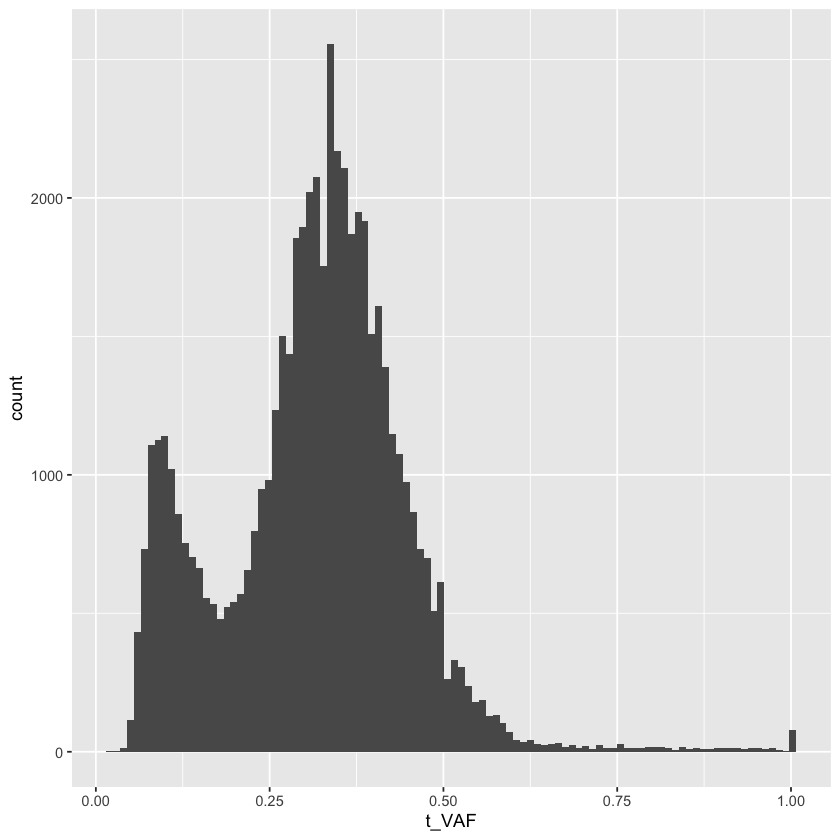

In [28]:
ggplot(data = overlap_sample) + geom_histogram(aes(x = t_VAF), bins = 100)

In [29]:
write.table(overlap_sample_VAF,
           file = paste0(datapath,"snv/CBTTC_maf_overlapped_3VAF.maf"),
           sep = "\t", quote = F, row.names = F)

## Add sample_id from clinical_df

In [30]:
mymaf <- read.maf(maf =  paste0(datapath,"snv/CBTTC_maf_overlapped_3VAF.maf"),
                      useAll = TRUE, 
                      verbose = T,
                      vc_nonSyn = c("Frame_Shift_Del", "Frame_Shift_Ins", 
                                    "Nonsense_Mutation","Nonstop_Mutation", 
                                    "In_Frame_Del","In_Frame_Ins", 
                                    "Missense_Mutation"))

-Reading
-Validating
-Summarizing
--Possible FLAGS among top ten genes:
  AHNAK
  TTN
-Processing clinical data
--Missing clinical data
-Finished in 6.302s elapsed (7.189s cpu) 


In [31]:
CBTTC_mut <- getSampleSummary(mymaf)

In [32]:
dim(CBTTC_mut)

[1] 842   9

In [33]:
head(CBTTC_mut)

Tumor_Sample_Barcode,Frame_Shift_Del,Frame_Shift_Ins,In_Frame_Del,In_Frame_Ins,Missense_Mutation,Nonsense_Mutation,Nonstop_Mutation,total
<fct>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>
BS_8AY2GM4G,21,21,0,1,9555,572,5,10175
BS_20TBZG09,17,31,0,1,9213,534,5,9801
BS_02YBZSBY,9,165,0,0,8170,470,1,8815
BS_D0T6V861,9,154,0,0,8018,457,1,8639
BS_VW4XN9Y7,3,111,0,1,5563,266,7,5951
BS_HM5GFJN8,43,13,3,1,1010,35,0,1105


In [35]:
IDlist <- read.table(paste0(manifestpath,"CBTTC_KidsFirstIDs.txt"),
                        sep = "\t", header = T,na.strings = "Not Applicable")

In [36]:
head(IDlist)

p_external_id,p_kf_id,clinical_event,normal_event1,normal_bs_1,normal_alq_1,normal_event2,normal_bs_2,normal_alq_2,normal_event3,⋯,cell_lines_rna_bs_1,cell_lines_rnaalq_1,cell_lines_rna_bs_2,cell_lines_rna_alq_2,cell_lines_rna_bs_3,cell_lines_rna_alq_3,other_bs_1,other_alq_1,X,X.1
<fct>,<fct>,<fct>,<fct>,<fct>,<int>,<fct>,<fct>,<int>,<fct>,⋯,<fct>,<int>,<fct>,<int>,<fct>,<int>,<fct>,<fct>,<lgl>,<lgl>
C100122,PT_98QMQZY7,7316-2724,7316-464,BS_382HZBG4,550061,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
C100122,PT_98QMQZY7,7316-464,7316-464,BS_382HZBG4,550061,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
C1002081,PT_8RB3EKNP,7316-4028,7316-4030,BS_6S7T92KS,717077,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
C100491,PT_SBHN5F68,7316-516,7316-1995,BS_NBM9CPE4,564269,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
C100860,PT_WP871F5S,7316-1766,7316-1766,BS_2TZNPK1V,612657,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
C100860,PT_WP871F5S,7316-3336,7316-1766,BS_2TZNPK1V,612657,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


In [37]:
CBTTC_mut$sample_id <- NA
CBTTC_mut$sample_id1 <- NA

In [38]:
CBTTC_mut$Tumor_Sample_Barcode <- as.character(CBTTC_mut$Tumor_Sample_Barcode)
IDlist$clinical_event <- as.character(IDlist$clinical_event)
IDlist$tumor_dna_bs_1 <- as.character(IDlist$tumor_dna_bs_1)
IDlist$tumor_dna_bs_2 <- as.character(IDlist$tumor_dna_bs_2)

finding sampleIds from biospecimen1 and 2 and putting them together

In [39]:
for(i in 1:nrow(CBTTC_mut)){
    CBTTC_mut$sample_id1[i] <- IDlist$clinical_event[match(CBTTC_mut$Tumor_Sample_Barcode[i],
                                                            IDlist$tumor_dna_bs_2)]
}

In [40]:
for(i in 1:nrow(CBTTC_mut)){
    CBTTC_mut$sample_id[i] <- IDlist$clinical_event[match(CBTTC_mut$Tumor_Sample_Barcode[i],
                                                            IDlist$tumor_dna_bs_1)]
}

In [41]:
dim(CBTTC_mut)

[1] 842  11

In [42]:
CBTTC_mut$sample_id[!is.na(CBTTC_mut$sample_id1)] <- CBTTC_mut$sample_id1[!is.na(CBTTC_mut$sample_id1)]

In [43]:
CBTTC_mut$sample_id1 <- NULL

In [44]:
dim(CBTTC_mut[!is.na(CBTTC_mut$sample_id)])

[1] 796  10

These are the cellline entries, other_aliquots and some samples that I do not have rna

In [45]:
CBTTC_mut[is.na(CBTTC_mut$sample_id)]

Tumor_Sample_Barcode,Frame_Shift_Del,Frame_Shift_Ins,In_Frame_Del,In_Frame_Ins,Missense_Mutation,Nonsense_Mutation,Nonstop_Mutation,total,sample_id
<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<chr>
BS_HM5GFJN8,43,13,3,1,1010,35,0,1105,NA
BS_QWM9BPDY,37,12,3,1,171,3,0,227,NA
BS_ERFMPQN3,1,7,0,0,163,1,0,172,NA
BS_AFBPM6CN,2,0,0,0,108,4,0,114,NA
BS_68TZMZH1,0,0,0,0,57,3,0,60,NA
BS_PKZ1HWNB,2,1,1,0,48,7,0,59,NA
BS_FJEZ3ASV,2,1,1,0,46,7,0,57,NA
BS_JGKRN7NA,1,2,1,0,40,0,0,44,NA
BS_X2G3JMM1,0,0,1,0,43,0,0,44,NA


In [47]:
write.table(CBTTC_mut[!is.na(CBTTC_mut$sample_id)],
           file = paste0(datapath,"snv/CBTTC_mafsummary_overlapped_3VAF.txt"),
           sep = "\t", quote = F, row.names = F)